#### Change the directory
Using the OS

In [2]:
import os
current_dir = os.getcwd()
os.chdir('C:\\Users\\ROG\\Downloads')


#### Load the sample data from amazon 2012-06-21
Using pandas

In [3]:
import pandas as pd
data = pd.read_csv("AMZN_2012-06-21_34200000_57600000_message_10.csv")
sample = pd.DataFrame(data)
print(sample)

               Time  Type   Order ID  Size    Price  Direction
0       34200.01746     5          0     1  2238200         -1
1       34200.18961     1   11885113    21  2238100          1
2       34200.18961     1    3911376    20  2239600         -1
3       34200.18961     1   11534792   100  2237500          1
4       34200.18961     1    1365373    13  2240000         -1
...             ...   ...        ...   ...      ...        ...
269743  57599.87274     3  286560364   100  2207600         -1
269744  57599.90399     3  287142900   100  2206200         -1
269745  57599.95524     3  286967592   170  2206900         -1
269746  57599.95824     1  287174077   100  2206300         -1
269747  57599.95936     3  287174077   100  2206300         -1

[269748 rows x 6 columns]


	    1.) Time: 		
				Seconds after midnight with decimal 
				precision of at least milliseconds 
				and up to nanoseconds depending on 
				the requested period
	    2.) Type:
				1: Submission of a new limit order
				2: Cancellation (Partial deletion 
				   of a limit order)
				3: Deletion (Total deletion of a limit order)
				4: Execution of a visible limit order			   	 
				5: Execution of a hidden limit order
				7: Trading halt indicator 				   
				   (Detailed information below)
	    3.) Order ID: 	
				Unique order reference number 
				(Assigned in order flow)
	    4.) Size: 		
				Number of shares
	    5.) Price: 		
				Dollar price times 10000 
				(i.e., A stock price of $91.14 is given 
				by 911400)
	    6.) Direction:
				-1: Sell limit order
				1: Buy limit order
				
				Note: 
				Execution of a sell (buy) limit
				order corresponds to a buyer (seller) 
				initiated trade, i.e. Buy (Sell) trade.

#### Differentiate each state into buy side and sell side
By using dataframe classfication.\
Buy side indicates: ( {'Type', 'Direction'} )
1. execution of sell limit order (Market buying) {4, -1}, {5, -1}
2. Submission of limit order buying  {1, 1}
3. Cancellation of limit order selling {2, -1}, {3, -1}

Sell side indicates: 
1. execution of buy limit order (Market selling) {4, 1}, {5, 1}
2. Submission of limit order selling  {1, -1}
3. Cancellation of limit order buying  {2, 1}, {3, 1}

In [4]:
# sample with Direction = 1, which means buy limit order
sampleD1 = sample[sample['Direction'] == 1]
print(sampleD1)

               Time  Type   Order ID  Size    Price  Direction
1       34200.18961     1   11885113    21  2238100          1
3       34200.18961     1   11534792   100  2237500          1
5       34200.18961     1   11474176     2  2236500          1
7       34200.18961     1    3920359    15  2236000          1
9       34200.18961     1    4632045   100  2235000          1
...             ...   ...        ...   ...      ...        ...
269736  57599.53944     1  287156634   900  2204300          1
269737  57599.53947     1  287156642   400  2204300          1
269739  57599.54583     4  282917222     9  2205100          1
269740  57599.54583     4  286916542    51  2205100          1
269741  57599.54693     1  287157483   100  2204100          1

[130344 rows x 6 columns]


In [5]:
# sample with Direction = -1, which means sell limit order.
sampleND1 = sample[sample['Direction'] == -1]
print(sampleND1)

               Time  Type   Order ID  Size    Price  Direction
0       34200.01746     5          0     1  2238200         -1
2       34200.18961     1    3911376    20  2239600         -1
4       34200.18961     1    1365373    13  2240000         -1
6       34200.18961     1    1847685   100  2240000         -1
8       34200.18961     1    3578212     4  2240000         -1
...             ...   ...        ...   ...      ...        ...
269743  57599.87274     3  286560364   100  2207600         -1
269744  57599.90399     3  287142900   100  2206200         -1
269745  57599.95524     3  286967592   170  2206900         -1
269746  57599.95824     1  287174077   100  2206300         -1
269747  57599.95936     3  287174077   100  2206300         -1

[139404 rows x 6 columns]


In [6]:
# classify deeply with T1 meaning Type = 1 and NT1 meaning Type != 1
# sampleD1_T1 refers to Direction = 1 and Type = 1
# sampleND1_NT1 refers to Direction = -1 and Type = 2,3,4,5,7
sampleD1_T1 = sampleD1[sampleD1['Type'] == 1]
sampleD1_NT1 = sampleD1[~(sampleD1['Type'] == 1)]
sampleND1_T1 = sampleND1[sampleND1['Type'] == 1]
sampleND1_NT1 = sampleND1[~(sampleND1['Type'] == 1)]

In [7]:
#buy side data contains sampleD1_T1 and sampleND1_NT1
#sell side data contains sampleND1_T1 and sampleD1_NT1
sample_buyside = pd.concat([sampleD1_T1, sampleND1_NT1])
sample_sellside = pd.concat([sampleND1_T1, sampleD1_NT1])

### In Homogeneous Poisson point process analysis
#### Start with buy side
For 3 different states: {1,2,3} \
State {1}. Submission of limit order buying  {1, 1}\
State {2}. Cancellation of limit order selling {2, -1}, {3, -1}\
State {3}. execution of sell limit order (Market buying) {4, -1}, {5, -1}

#### For sell side
For 3 different states: {4,5,6} \
State {4}. Submission of limit order selling  {1, -1}\
State {5}. Cancellation of limit order buying  {2, 1}, {3, 1}\
State {6}. execution of buy limit order (Market selling) {4, 1}, {5, 1}

In [8]:
# First, filter the DataFrame based on the 'type' column
sample_buyside_type1 = sample_buyside[sample_buyside['Type'] == 1]
sample_buyside_type23 = sample_buyside[sample_buyside['Type'].isin([2, 3])]
sample_buyside_type45 = sample_buyside[sample_buyside['Type'].isin([4, 5])]

# 'sample_buyside_type1' with type 1, considered as state {1}
# 'sample_buyside_type23' with type 2 and 3, considered as state {2}
# 'sample_buyside_type45' with type 4 and 5, considered as state {3}
print(sample_buyside_type1)


               Time  Type   Order ID  Size    Price  Direction
1       34200.18961     1   11885113    21  2238100          1
3       34200.18961     1   11534792   100  2237500          1
5       34200.18961     1   11474176     2  2236500          1
7       34200.18961     1    3920359    15  2236000          1
9       34200.18961     1    4632045   100  2235000          1
...             ...   ...        ...   ...      ...        ...
269731  57599.40308     1  287148338   100  2204800          1
269735  57599.53944     1  287156633   900  2204300          1
269736  57599.53944     1  287156634   900  2204300          1
269737  57599.53947     1  287156642   400  2204300          1
269741  57599.54693     1  287157483   100  2204100          1

[63403 rows x 6 columns]


In [9]:
# Sell side start building
sample_sellside_type1 = sample_sellside[sample_sellside['Type'] == 1]
sample_sellside_type23 = sample_sellside[sample_sellside['Type'].isin([2, 3])]
sample_sellside_type45 = sample_sellside[sample_sellside['Type'].isin([4, 5])]
print(sample_sellside_type23)

               Time  Type   Order ID  Size    Price  Direction
34      34200.19199     3   15836786   100  2230400          1
35      34200.19205     3   15837700   100  2231800          1
84      34200.51075     3   16206910   286  2236200          1
86      34200.51610     3   16229815   286  2236300          1
90      34200.54213     3   16230863   286  2236900          1
...             ...   ...        ...   ...      ...        ...
269704  57599.05361     3  286714275   100  2204600          1
269707  57599.06190     3  287123046   100  2204300          1
269710  57599.10303     3  287074627   100  2204900          1
269723  57599.28072     3  287126323   100  2204800          1
269734  57599.53768     3  286844366   100  2204700          1

[61426 rows x 6 columns]


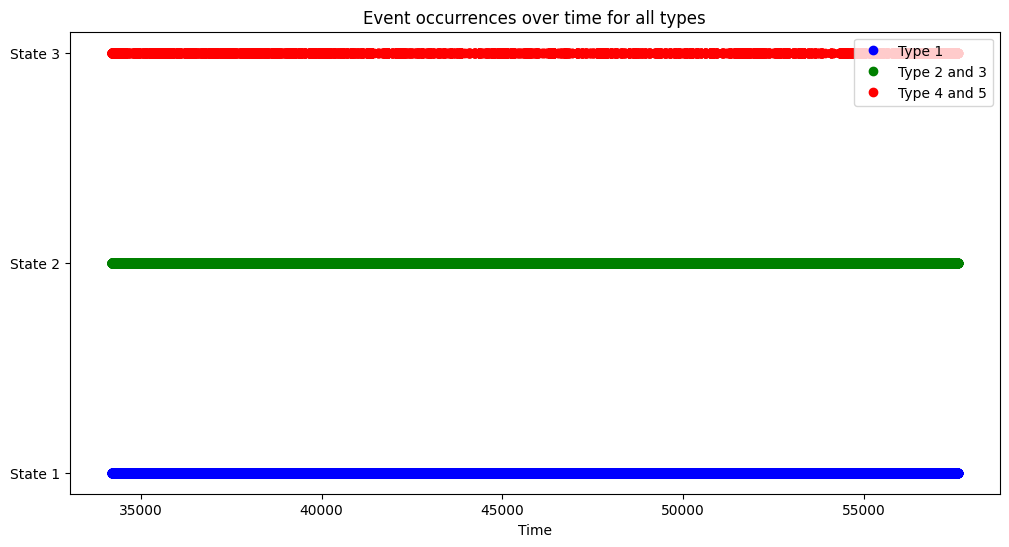

In [10]:
import matplotlib.pyplot as plt
# Create y-values for each point to differentiate them by type.
y1 = [1]*len(sample_buyside_type1)
y23 = [2]*len(sample_buyside_type23)
y45 = [3]*len(sample_buyside_type45)

plt.figure(figsize=(12,6))

# Plot the events over time for all types
plt.plot(sample_buyside_type1['Time'], y1, 'bo', label='Type 1')
plt.plot(sample_buyside_type23['Time'], y23, 'go', label='Type 2 and 3')
plt.plot(sample_buyside_type45['Time'], y45, 'ro', label='Type 4 and 5')

plt.xlabel('Time')
plt.yticks([1,2,3], ['State 1', 'State 2', 'State 3'])
plt.title('Event occurrences over time for all types')
plt.legend(loc = 'upper right')

plt.show()


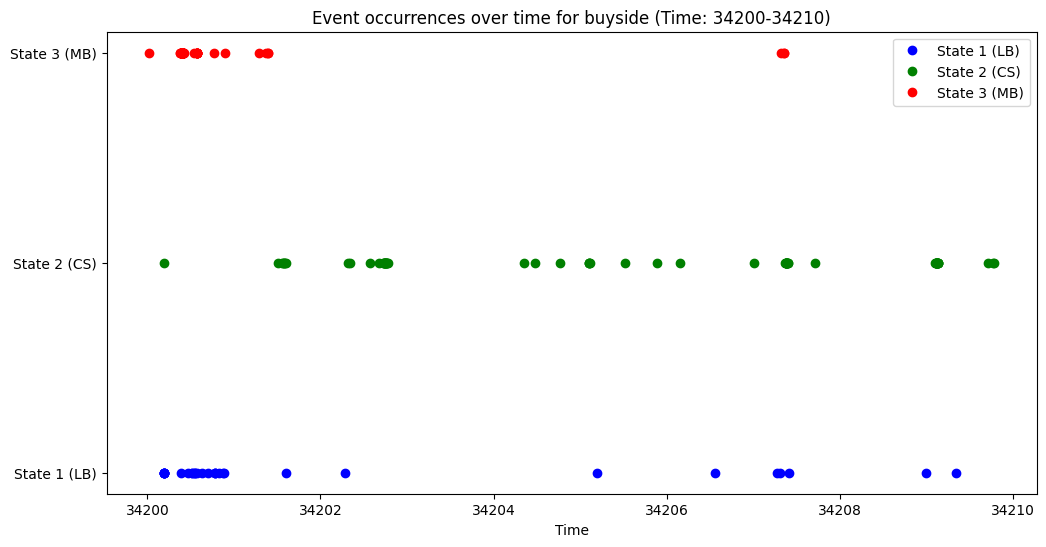

In [94]:
#Since the event happens clustering among all time so we have to limit its time interval to see the discretized data.Direction
# Filter the dataframes to only include events that occurred between time 35000 and 35100
sample_buyside_type1_filtered = sample_buyside_type1[(sample_buyside_type1['Time'] >= 34200) & (sample_buyside_type1['Time'] <= 34210)]
sample_buyside_type23_filtered = sample_buyside_type23[(sample_buyside_type23['Time'] >= 34200) & (sample_buyside_type23['Time'] <= 34210)]
sample_buyside_type45_filtered = sample_buyside_type45[(sample_buyside_type45['Time'] >= 34200) & (sample_buyside_type45['Time'] <= 34210)]

# Create y-values for each point to differentiate them by type.
y1_filtered = [1]*len(sample_buyside_type1_filtered)
y23_filtered = [2]*len(sample_buyside_type23_filtered)
y45_filtered = [3]*len(sample_buyside_type45_filtered)

plt.figure(figsize=(12,6))

# Plot the events over time for all types
plt.plot(sample_buyside_type1_filtered['Time'], y1_filtered, 'bo', label='State 1 (LB)')
plt.plot(sample_buyside_type23_filtered['Time'], y23_filtered, 'go', label='State 2 (CS)')
plt.plot(sample_buyside_type45_filtered['Time'], y45_filtered, 'ro', label='State 3 (MB)')

plt.xlabel('Time')
plt.yticks([1,2,3], ['State 1 (LB)', 'State 2 (CS)', 'State 3 (MB)'])
plt.title('Event occurrences over time for buyside (Time: 34200-34210)')
plt.legend(loc = 'upper right')

plt.show()



# Event arrival rate

In [12]:
start_time = 34200
end_time = 57600
interval_length = 60

state1_arrival = sample_buyside_type1.shape[0]/(end_time-start_time)
state2_arrival = sample_buyside_type23.shape[0]/(end_time-start_time)
state3_arrival = sample_buyside_type45.shape[0]/(end_time-start_time)
state4_arrival= sample_sellside_type1.shape[0]/(end_time-start_time)
state5_arrival = sample_buyside_type23.shape[0]/(end_time-start_time)
state6_arrival = sample_sellside_type45.shape[0]/(end_time-start_time)
print(state1_arrival, state2_arrival, state3_arrival, state4_arrival, state5_arrival, state6_arrival)


2.7095299145299143 2.7755982905982908 0.2523076923076923 2.9295299145299145 2.7755982905982908 0.23568376068376068


## Size parameter processing
#### Method
1. Descriptive Statistics: Begin by understanding the basic statistics of the Size column.
2. Outliers Detection: Identify potential outliers.
3. Data Filtering: Filter out the extreme values if needed.
#### Process
1. Removal of NaN values
2. box plot
3. Inter quantile range
4. Capping: Replace the outliers with a certain threshold value. For instance, anything above the 95th percentile can be replaced with the value at the 95th percentile.


In [13]:
# Descriptive statistics for the 'Size' column
size_descriptive_stats = sample['Size'].describe()
size_descriptive_stats

count    269748.000000
mean         96.870505
std         168.846801
min           1.000000
25%          21.000000
50%         100.000000
75%         100.000000
max       33570.000000
Name: Size, dtype: float64

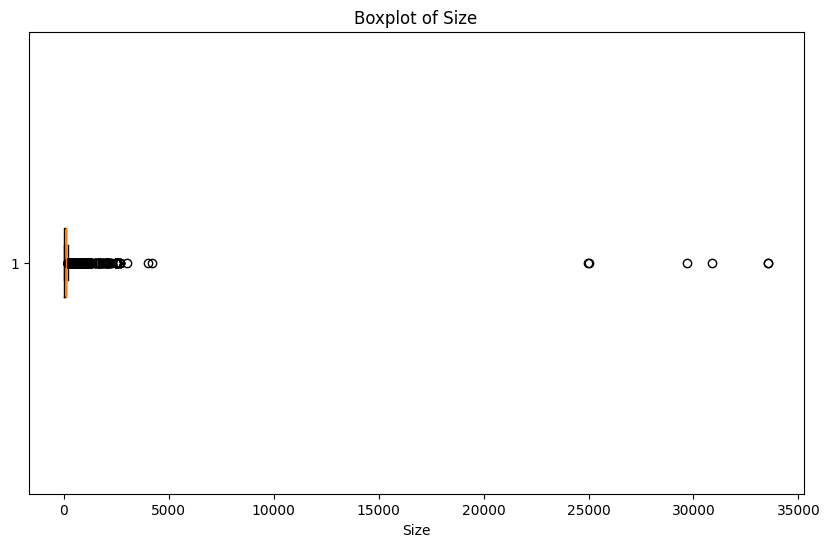

In [14]:
# Drop NaN values from the 'Size' column
sampless = sample.dropna(subset=['Size'])

# Plot a boxplot to visualize outliers in the 'Size' column
plt.figure(figsize=(10, 6))
plt.boxplot(sample['Size'], vert=False)
plt.xlabel('Size')
plt.title('Boxplot of Size')
plt.show()


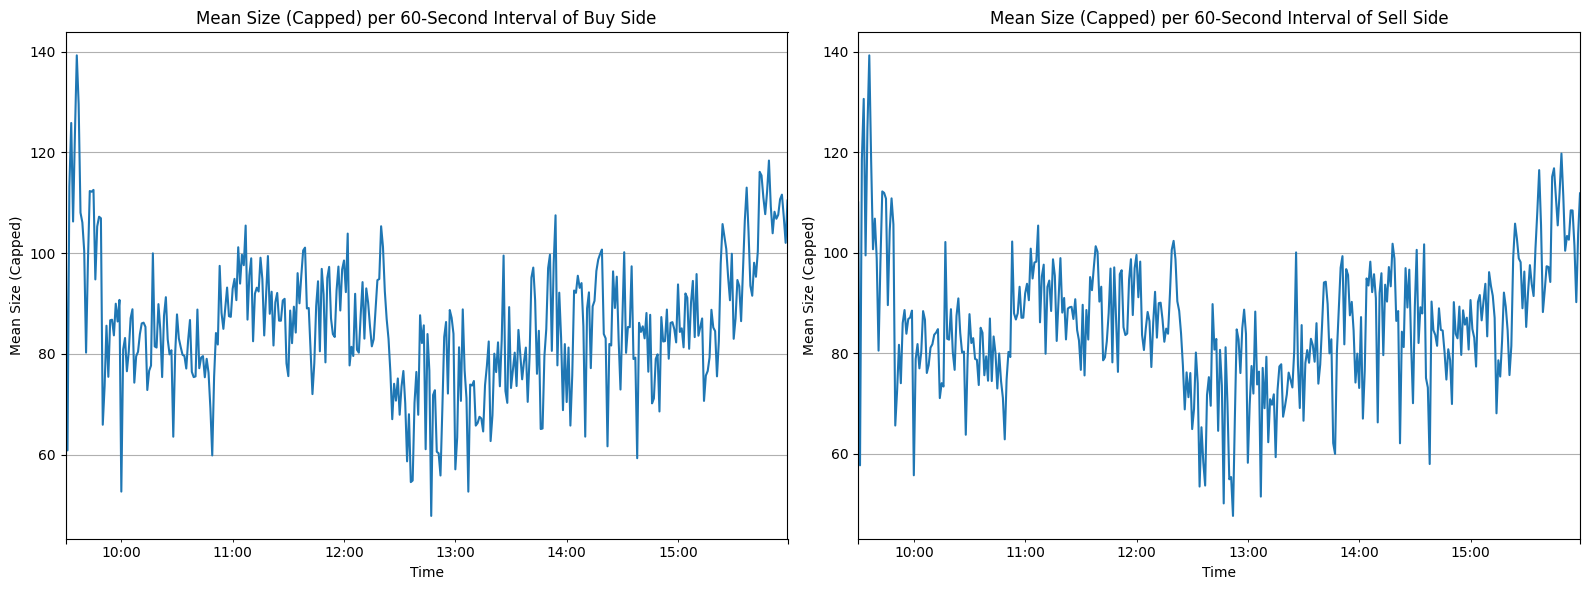

In [15]:
import numpy as np
cap_threshold = sampless['Size'].quantile(0.95)
sampless['Size_Capped'] = np.where(sampless['Size'] > cap_threshold, cap_threshold, sampless['Size'])
# Convert the 'Time' column to a datetime format (assuming it's in seconds since the start of the day)
sampless['DateTime'] = pd.to_datetime(sampless['Time'], unit='s', origin=pd.Timestamp('2012-06-21'))

# Set 'DateTime' as the index
sampless.set_index('DateTime', inplace=True)

#Sampless as buy side and sell side
samplessD1 = sampless[sampless['Direction'] == 1]
samplessND1 = sampless[sampless['Direction'] == -1]
samplessD1_T1 = samplessD1[samplessD1['Type'] == 1]
samplessD1_NT1 = samplessD1[~(samplessD1['Type'] == 1)]
samplessND1_T1 = samplessND1[samplessND1['Type'] == 1]
samplessND1_NT1 = samplessND1[~(samplessND1['Type'] == 1)]
sampless_buyside = pd.concat([samplessD1_T1, samplessND1_NT1])
sampless_sellside = pd.concat([samplessND1_T1, samplessD1_NT1])

# Resample the data into 60-second intervals and compute the mean size within each interval
buyside_size_60s_mean = sampless_buyside['Size_Capped'].resample('60S').mean()
sellside_size_60s_mean = sampless_sellside['Size_Capped'].resample('60S').mean()

# Plotting
plt.figure(figsize=(16, 6))

# Buy Side Plot
plt.subplot(1, 2, 1)
buyside_size_60s_mean.plot()
plt.title('Mean Size (Capped) per 60-Second Interval of Buy Side')
plt.xlabel('Time')
plt.ylabel('Mean Size (Capped)')
plt.grid(True)

# Sell Side Plot
plt.subplot(1, 2, 2)
sellside_size_60s_mean.plot()
plt.title('Mean Size (Capped) per 60-Second Interval of Sell Side')
plt.xlabel('Time')
plt.ylabel('Mean Size (Capped)')
plt.grid(True)

plt.tight_layout()
plt.show()

## Correlation Coefficient

## 10s

In [16]:
buyside_size_10s_mean = sampless_buyside['Size_Capped'].resample('10S').mean()
sellside_size_10s_mean = sampless_sellside['Size_Capped'].resample('10S').mean()
correlation_coefficient_10s = buyside_size_10s_mean.corr(sellside_size_10s_mean)

print(f"Correlation coefficient between buy and sell side time series: {correlation_coefficient_10s:.4f}")

Correlation coefficient between buy and sell side time series: 0.8322


0.8322 is also high

## 60s

In [17]:
correlation_coefficient_60s = buyside_size_60s_mean.corr(sellside_size_60s_mean)

print(f"Correlation coefficient between buy and sell side time series: {correlation_coefficient_60s:.4f}")

Correlation coefficient between buy and sell side time series: 0.9681


The result is 0.9681 which is nearly the same in 60s dimension. So it can be considered to be the same distribution.
positively correlated

## The relationship of correlation coefficient in respect to the time dimension from 1s to 120s for each 1s segments

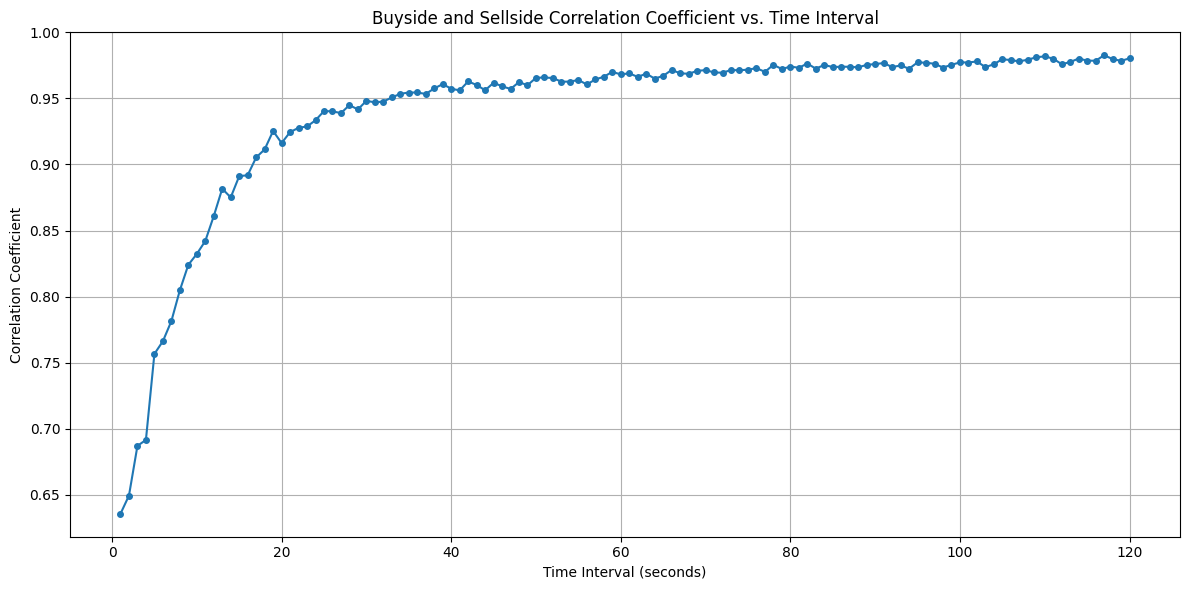

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120]


In [96]:
intervals = np.arange(1, 121)  # Time intervals from 1s to 120s
correlation_coeffs = []

for interval in intervals:
    # Resample the data into the current interval and compute the mean size
    buyside_resampled = sampless_buyside['Size_Capped'].resample(f'{interval}S').mean()
    sellside_resampled = sampless_sellside['Size_Capped'].resample(f'{interval}S').mean()
    
    # Calculate the correlation coefficient for the current interval
    coeff = buyside_resampled.corr(sellside_resampled)
    correlation_coeffs.append(coeff)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(intervals, correlation_coeffs, '-o', markersize=4)
plt.xlabel('Time Interval (seconds)')
plt.ylabel('Correlation Coefficient')
plt.title('Buyside and Sellside Correlation Coefficient vs. Time Interval')
plt.grid(True)
plt.tight_layout()
plt.show()
print(intervals)


### So start from the time interval from 10s to 120. The buy and sell side both shows similar trend which has correlation coefficient closer than 1 which is positively correlated. So the mean arrival of size would be considerably the same

## Homogeneous poisson point process
To proceed this model, we have to make some assumptions:
1. events occur independently and at a constant average rate over time or space.
2. Two or more events cannot occur at the exact same point in time or space.
3. At the first time t=0, there would be no events happen at this time.

##### State 1

记得解释为什么interval选择 60秒

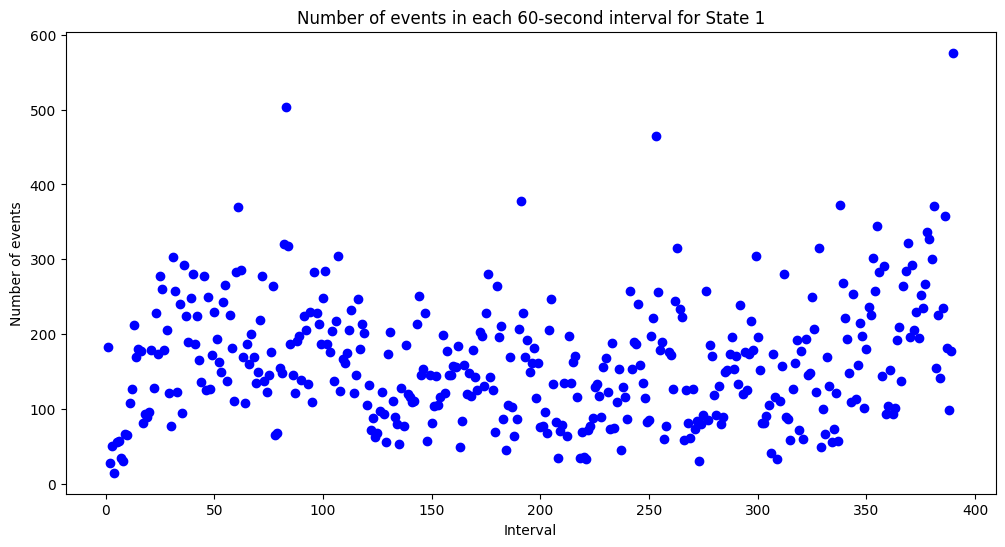

In [19]:
# Define the start and end times, and the interval length
start_time = 34200
end_time = 57600
interval_length = 60

# Divide the time period into intervals and estimate
lambdas1 = []
for i in np.arange(start_time, end_time, interval_length):
    # Count the number of events in this interval
    events_in_interval1 = sample_buyside_type1[(sample_buyside_type1['Time'] >= i) & (sample_buyside_type1['Time'] < i+interval_length)]
    event_count1 = len(events_in_interval1)
    
    # Estimate the rate parameter (lambda) for this interval
    lambda_state1 = event_count1 / interval_length
    
    # Add the estimate to the list
    lambdas1.append(lambda_state1)

    
# Create a list of intervals
intervals1 = np.arange(1, len(lambdas1) + 1)

# Convert the rate parameters back to the number of events in each interval
# by multiplying by the interval length
events_per_interval1 = np.array(lambdas1) * interval_length

plt.figure(figsize=(12,6))

# Plot the number of events in each interval
plt.plot(intervals1, events_per_interval1, 'bo')
plt.xlabel('Interval')
plt.ylabel('Number of events')
plt.title('Number of events in each 60-second interval for State 1')
plt.show()

##### State 2 & State 3

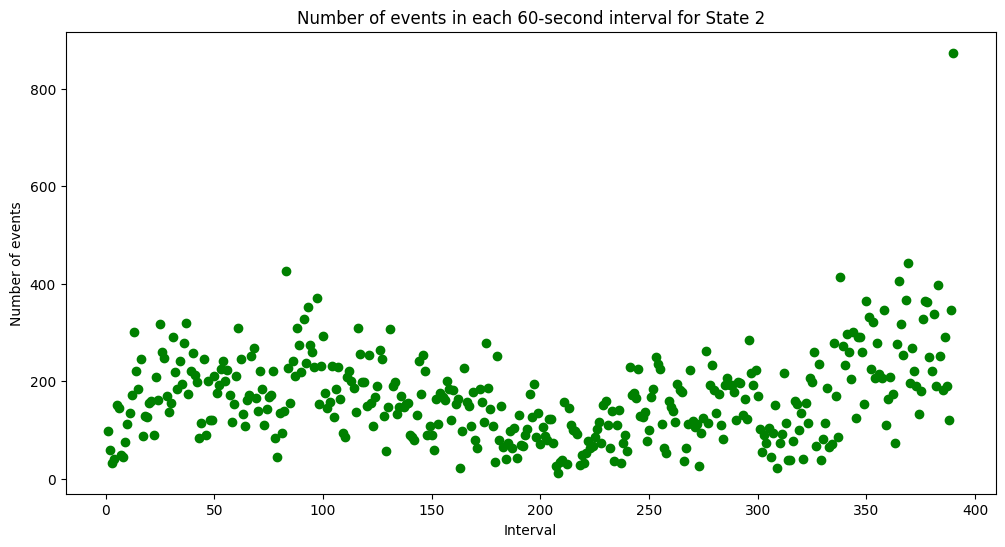

In [20]:
#Doing the same steps before for State 2
# Divide the time period into intervals and estimate
lambdas2 = []
for i in np.arange(start_time, end_time, interval_length):
    # Count the number of events in this interval
    events_in_interval2 = sample_buyside_type23[(sample_buyside_type23['Time'] >= i) & (sample_buyside_type23['Time'] < i+interval_length)]
    event_count2 = len(events_in_interval2)
    
    # Estimate the rate parameter (lambda) for this interval
    lambda_state2 = event_count2 / interval_length
    
    # Add the estimate to the list
    lambdas2.append(lambda_state2)

    
# Create a list of intervals
intervals2 = np.arange(1, len(lambdas2) + 1)

# Convert the rate parameters back to the number of events in each interval
# by multiplying by the interval length
events_per_interval2 = np.array(lambdas2) * interval_length

plt.figure(figsize=(12,6))

# Plot the number of events in each interval
plt.plot(intervals2, events_per_interval2, 'go')
plt.xlabel('Interval')
plt.ylabel('Number of events')
plt.title('Number of events in each 60-second interval for State 2')
plt.show()


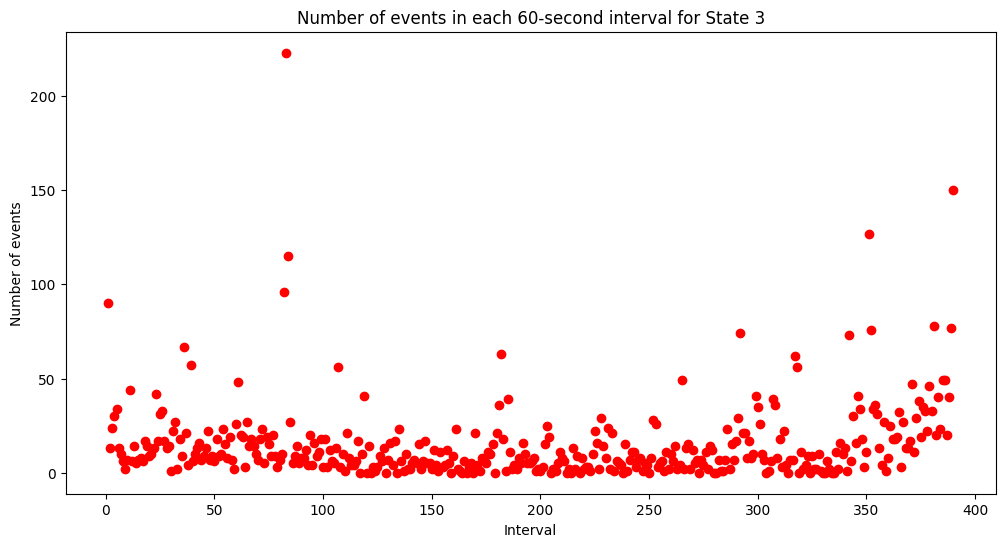

In [21]:
#Doing the same steps before for State 3
# Divide the time period into intervals and estimate
lambdas3 = []
for i in np.arange(start_time, end_time, interval_length):
    # Count the number of events in this interval
    events_in_interval3 = sample_buyside_type45[(sample_buyside_type45['Time'] >= i) & (sample_buyside_type45['Time'] < i+interval_length)]
    event_count3 = len(events_in_interval3)
    
    # Estimate the rate parameter (lambda) for this interval
    lambda_state3 = event_count3 / interval_length
    
    # Add the estimate to the list
    lambdas3.append(lambda_state3)

    
# Create a list of intervals
intervals3 = np.arange(1, len(lambdas3) + 1)

# Convert the rate parameters back to the number of events in each interval
# by multiplying by the interval length
events_per_interval3 = np.array(lambdas3) * interval_length

plt.figure(figsize=(12,6))

# Plot the number of events in each interval
plt.plot(intervals3, events_per_interval3, 'ro')
plt.xlabel('Interval')
plt.ylabel('Number of events')
plt.title('Number of events in each 60-second interval for State 3')
plt.show()


## The combined graph:


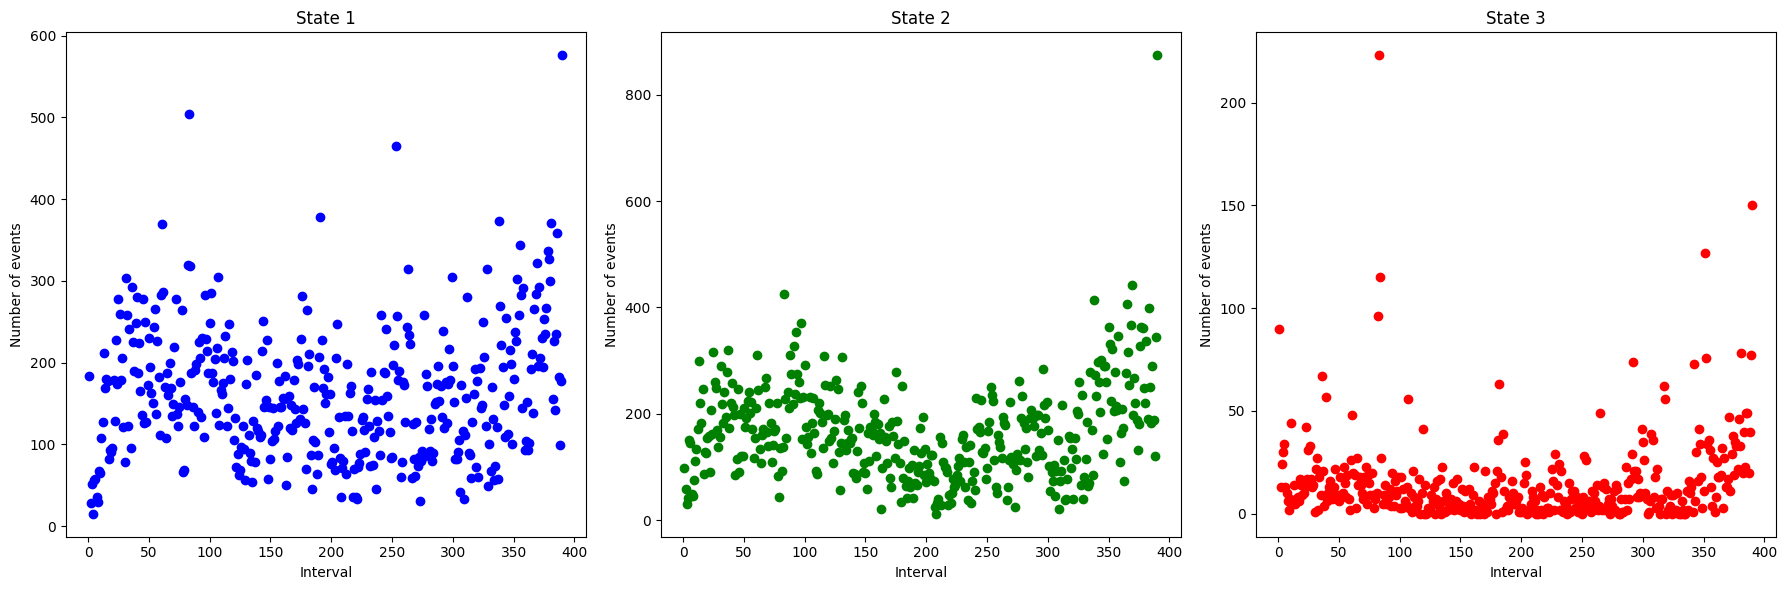

In [22]:
# Create plots
plt.figure(figsize=(18,6))

plt.subplot(1, 3, 1)
plt.plot(intervals1, events_per_interval1, 'bo')
plt.xlabel('Interval')
plt.ylabel('Number of events')
plt.title('State 1')

plt.subplot(1, 3, 2)
plt.plot(intervals2, events_per_interval2, 'go')
plt.xlabel('Interval')
plt.ylabel('Number of events')
plt.title('State 2')

plt.subplot(1, 3, 3)
plt.plot(intervals3, events_per_interval3, 'ro')
plt.xlabel('Interval')
plt.ylabel('Number of events')
plt.title('State 3')

plt.tight_layout()
plt.show()

#### For sell side
For 3 different states: {4,5,6} \
State {4}. Submission of limit order selling  {1, -1}\
State {5}. Cancellation of limit order buying  {2, 1}, {3, 1}\
State {6}. execution of buy limit order (Market selling) {4, 1}, {5, 1}

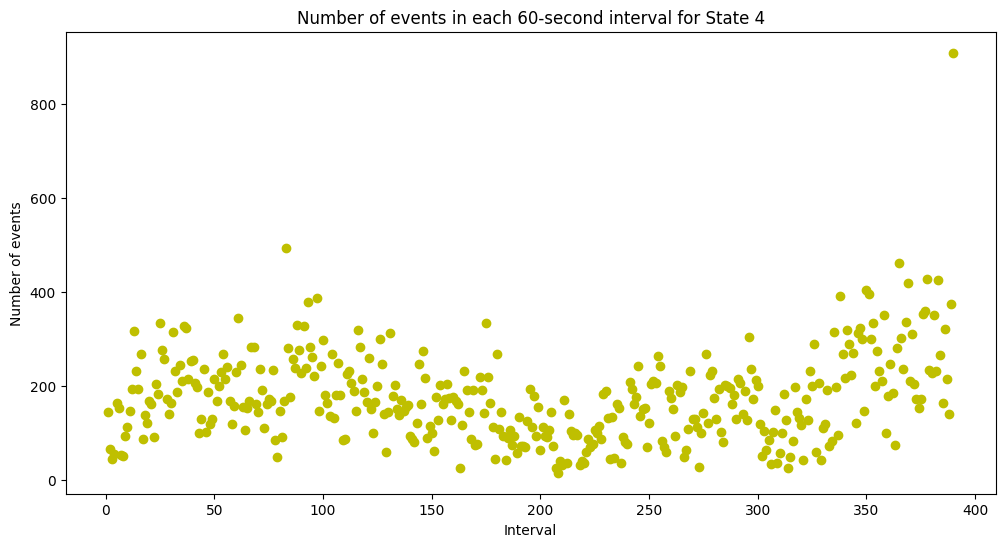

In [23]:
# Sell side start building
sample_sellside_type1 = sample_sellside[sample_sellside['Type'] == 1]
sample_sellside_type23 = sample_sellside[sample_sellside['Type'].isin([2, 3])]
sample_sellside_type45 = sample_sellside[sample_sellside['Type'].isin([4, 5])]

# 'sample_sellside_type1' with type 1, considered as state {4}
# 'sample_sellside_type23' with type 2 and 3, considered as state {5}
# 'sample_sellside_type45' with type 4 and 5, considered as state {6}
# Divide the time period into intervals and estimate
lambdas4 = []
for i in np.arange(start_time, end_time, interval_length):
    # Count the number of events in this interval
    events_in_interval4 = sample_sellside_type1[(sample_sellside_type1['Time'] >= i) & (sample_sellside_type1['Time'] < i+interval_length)]
    event_count4 = len(events_in_interval4)
    
    # Estimate the rate parameter (lambda) for this interval
    lambda_state4 = event_count4 / interval_length
    
    # Add the estimate to the list
    lambdas4.append(lambda_state4)

    
# Create a list of intervals
intervals4 = np.arange(1, len(lambdas4) + 1)

# Convert the rate parameters back to the number of events in each interval
# by multiplying by the interval length
events_per_interval4 = np.array(lambdas4) * interval_length

plt.figure(figsize=(12,6))

# Plot the number of events in each interval
plt.plot(intervals4, events_per_interval4, 'yo')
plt.xlabel('Interval')
plt.ylabel('Number of events')
plt.title('Number of events in each 60-second interval for State 4')
plt.show()

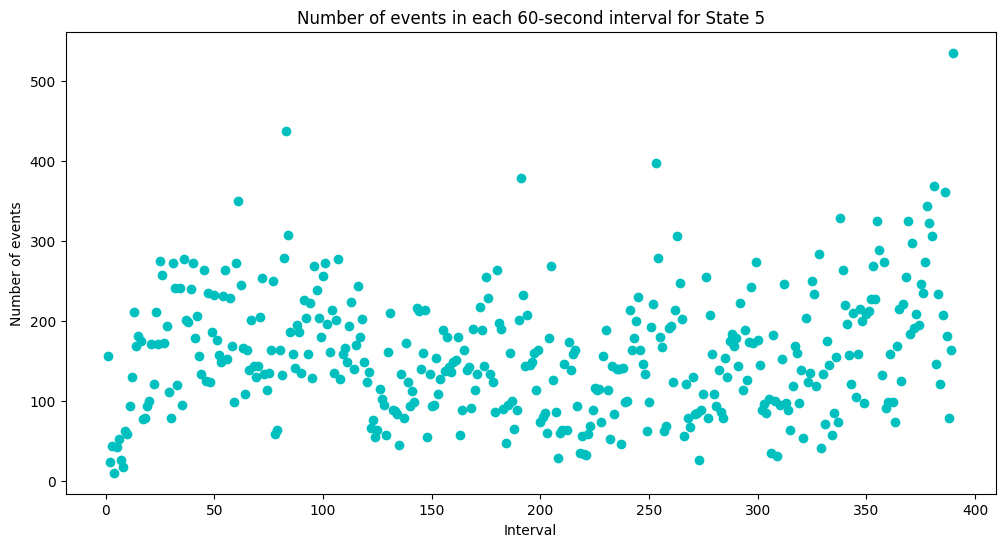

In [24]:
lambdas5 = []
for i in np.arange(start_time, end_time, interval_length):
    # Count the number of events in this interval
    events_in_interval5 = sample_sellside_type23[(sample_sellside_type23['Time'] >= i) & (sample_sellside_type23['Time'] < i+interval_length)]
    event_count5 = len(events_in_interval5)
    5
    # Estimate the rate parameter (lambda) for this interval
    lambda_state5 = event_count5 / interval_length
    
    # Add the estimate to the list
    lambdas5.append(lambda_state5)

    
# Create a list of intervals
intervals5 = np.arange(1, len(lambdas5) + 1)

# Convert the rate parameters back to the number of events in each interval
# by multiplying by the interval length
events_per_interval5 = np.array(lambdas5) * interval_length

plt.figure(figsize=(12,6))

# Plot the number of events in each interval
plt.plot(intervals5, events_per_interval5, 'co')
plt.xlabel('Interval')
plt.ylabel('Number of events')
plt.title('Number of events in each 60-second interval for State 5')
plt.show()


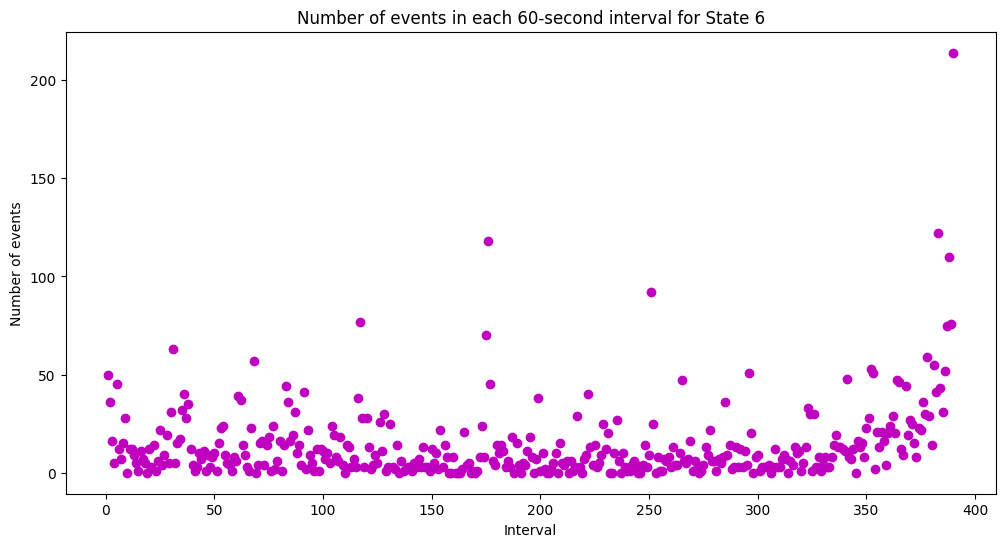

In [25]:
lambdas6 = []
for i in np.arange(start_time, end_time, interval_length):
    # Count the number of events in this interval
    events_in_interval6 = sample_sellside_type45[(sample_sellside_type45['Time'] >= i) & (sample_sellside_type45['Time'] < i+interval_length)]
    event_count6 = len(events_in_interval6)
    
    # Estimate the rate parameter (lambda) for this interval
    lambda_state6 = event_count6 / interval_length
    
    # Add the estimate to the list
    lambdas6.append(lambda_state6)

    
# Create a list of intervals
intervals6 = np.arange(1, len(lambdas6) + 1)

# Convert the rate parameters back to the number of events in each interval
# by multiplying by the interval length
events_per_interval6 = np.array(lambdas6) * interval_length

plt.figure(figsize=(12,6))

# Plot the number of events in each interval
plt.plot(intervals6, events_per_interval6, 'mo')
plt.xlabel('Interval')
plt.ylabel('Number of events')
plt.title('Number of events in each 60-second interval for State 6')
plt.show()


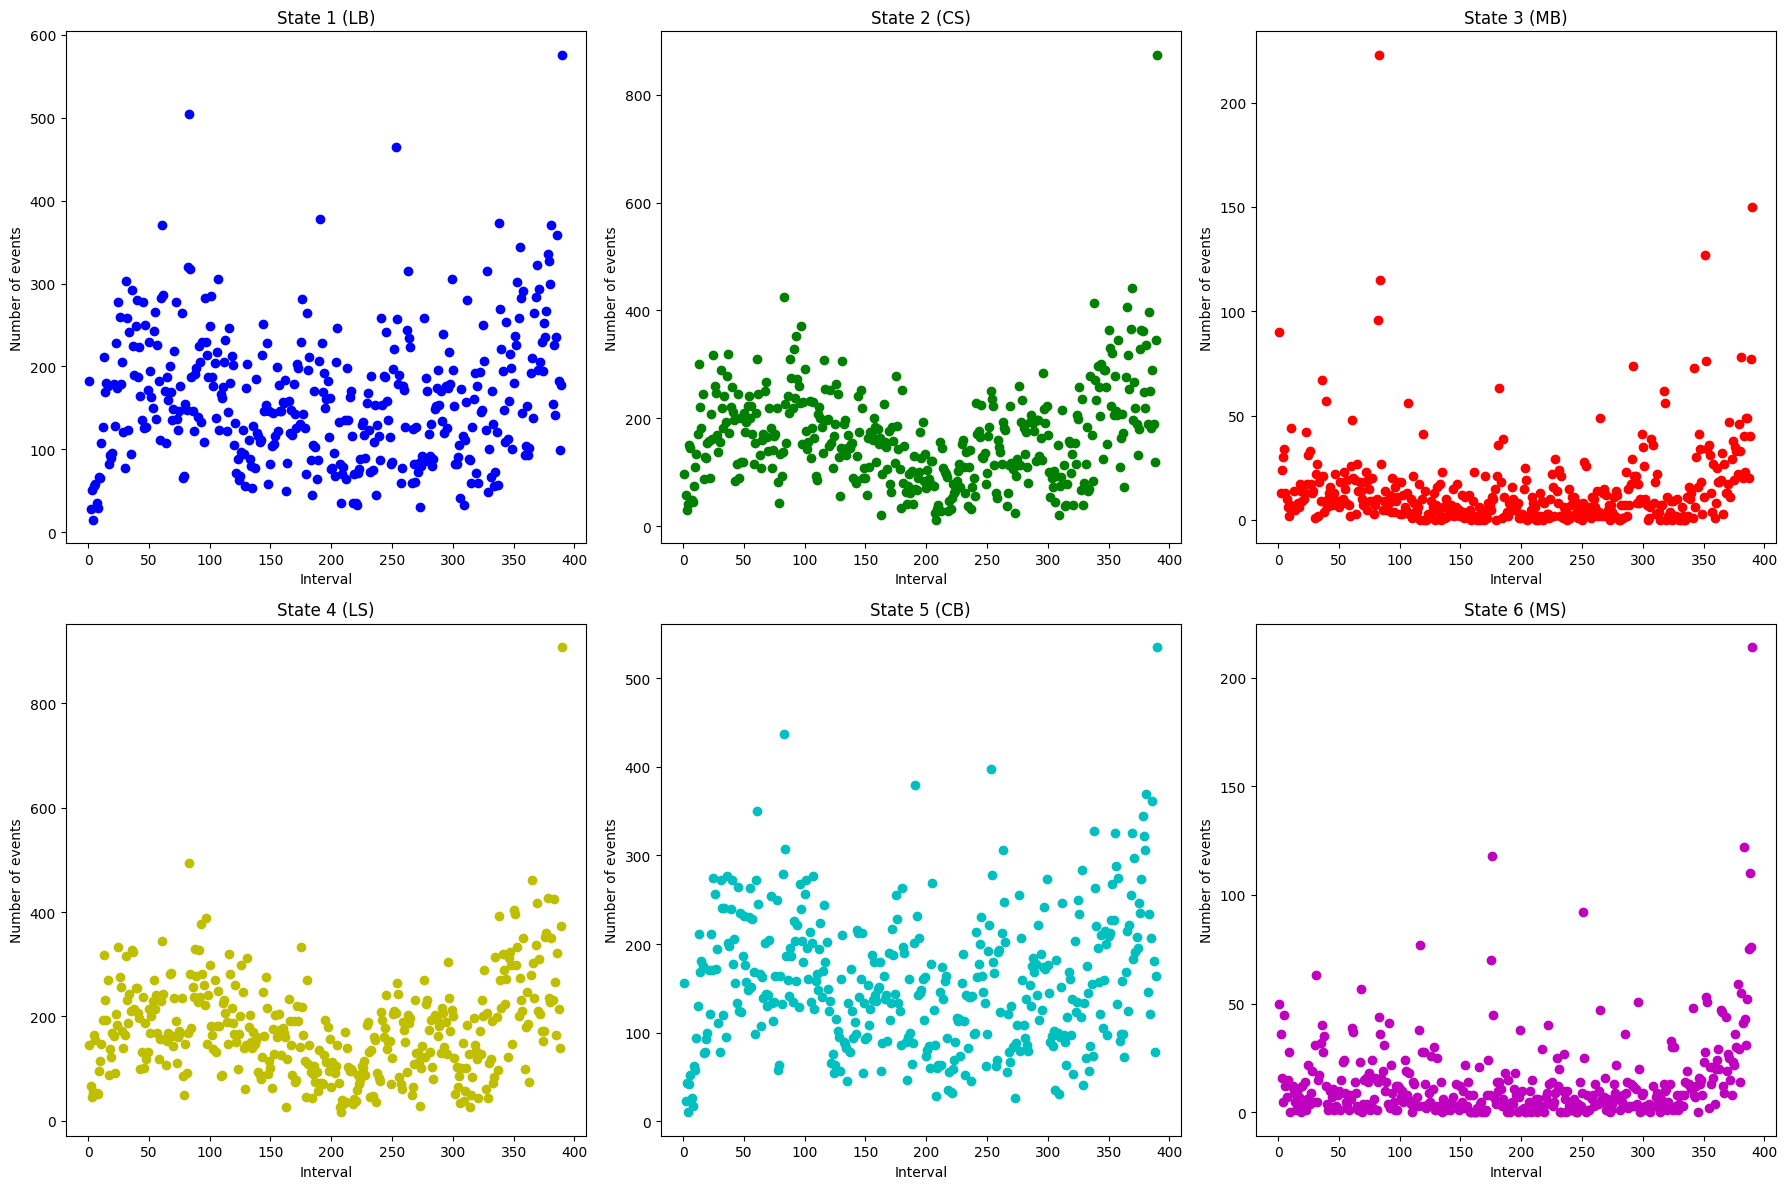

In [98]:
# Create plots

plt.figure(figsize=(18,12))

plt.subplot(2, 3, 1)
plt.plot(intervals1, events_per_interval1, 'bo')
plt.xlabel('Interval')
plt.ylabel('Number of events')
plt.title('State 1 (LB)')

plt.subplot(2, 3, 2)
plt.plot(intervals2, events_per_interval2, 'go')
plt.xlabel('Interval')
plt.ylabel('Number of events')
plt.title('State 2 (CS)')

plt.subplot(2, 3, 3)
plt.plot(intervals3, events_per_interval3, 'ro')
plt.xlabel('Interval')
plt.ylabel('Number of events')
plt.title('State 3 (MB)')

plt.subplot(2, 3, 4)
plt.plot(intervals4, events_per_interval4, 'yo')
plt.xlabel('Interval')
plt.ylabel('Number of events')
plt.title('State 4 (LS)')

plt.subplot(2, 3, 5)
plt.plot(intervals5, events_per_interval5, 'co')
plt.xlabel('Interval')
plt.ylabel('Number of events')
plt.title('State 5 (CB)')

plt.subplot(2, 3, 6)
plt.plot(intervals6, events_per_interval6, 'mo')
plt.xlabel('Interval')
plt.ylabel('Number of events')
plt.title('State 6 (MS)')

plt.tight_layout()
plt.show()

## Reason why cannot choose Homogeneous poisson point process

## For the buyside as an example

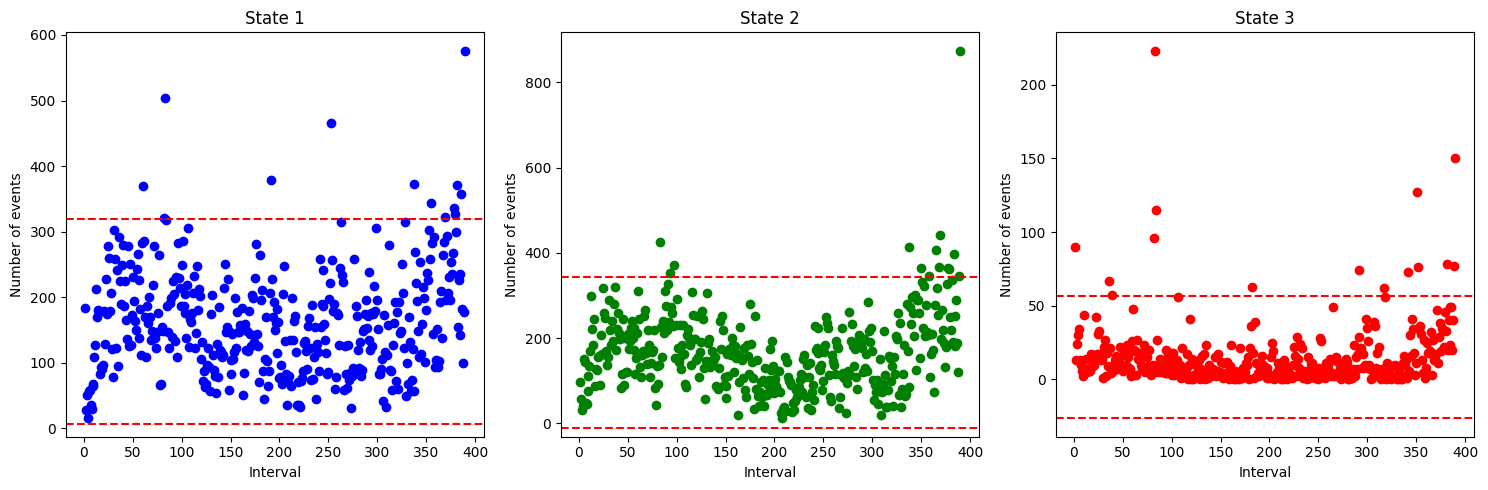

([6.078549419139449, 319.0650403244503],
 [-10.278371031659447, 343.35016590345435],
 [-26.429053781529767, 56.70597685845285])

In [ ]:
import math
# Calculate confidence intervals for each state 95%
mean_lambda1 = np.mean(lambdas1) * interval_length
std_lambda1 = np.std(lambdas1) * interval_length
confidence_interval1 = [mean_lambda1 - 1.96*std_lambda1, mean_lambda1 + 1.96*std_lambda1]

mean_lambda2 = np.mean(lambdas2) * interval_length
std_lambda2 = np.std(lambdas2) * interval_length
confidence_interval2 = [mean_lambda2 - 1.96*std_lambda2, mean_lambda2 + 1.96*std_lambda2]

mean_lambda3 = np.mean(lambdas3) * interval_length
std_lambda3 = np.std(lambdas3) * interval_length
confidence_interval3 = [mean_lambda3 - 1.96*std_lambda3, mean_lambda3 + 1.96*std_lambda3]

# Create plots
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.plot(intervals1, events_per_interval1, 'bo')
plt.axhline(y=confidence_interval1[0], color='r', linestyle='--')
plt.axhline(y=confidence_interval1[1], color='r', linestyle='--')
plt.xlabel('Interval')
plt.ylabel('Number of events')
plt.title('State 1')

plt.subplot(1, 3, 2)
plt.plot(intervals2, events_per_interval2, 'go')
plt.axhline(y=confidence_interval2[0], color='r', linestyle='--')
plt.axhline(y=confidence_interval2[1], color='r', linestyle='--')
plt.xlabel('Interval')
plt.ylabel('Number of events')
plt.title('State 2')

plt.subplot(1, 3, 3)
plt.plot(intervals3, events_per_interval3, 'ro')
plt.axhline(y=confidence_interval3[0], color='r', linestyle='--')
plt.axhline(y=confidence_interval3[1], color='r', linestyle='--')
plt.xlabel('Interval')
plt.ylabel('Number of events')
plt.title('State 3')

plt.tight_layout()
plt.show()
confidence_interval1, confidence_interval2, confidence_interval3

When calculating confidence intervals for a sample mean, we typically divide by the square root of the sample size (i.e., we divide by the standard error). This is because we assume that the sample mean will approach the population mean as the sample size increases.

However, in this analysis, we're not calculating confidence intervals for a mean. We're calculating confidence intervals for the number of events in a fixed time interval (e.g., every 10 seconds). In this case, our "sample" is the number of events in each 10-second interval. So, we use the mean and standard deviation of the number of events in each time interval to calculate the confidence intervals, rather than the sample mean and sample standard error.

In this condition, our "samples" are the numbers of events in all 10-second intervals, which are independent draws from the same distribution. Therefore, we can directly use the standard deviation of these samples to estimate the population standard deviation, without dividing by the square root of the sample size.

However, we need to note that the lower bounds of the confidence interval for state 2 and state 3 are negative, which do not make sense in our case, as the number of events cannot be negative. This may be due to the high heterogeneity of our data, causing the standard deviation to be very large relative to the mean. In this situation, using a Homogeneous Poisson Point process may not be the best modeling choice, as it assumes that events are evenly distributed across all time periods, which may not correspond to our data.

Furthermore, it shows that the number of events in many intervals far exceeds the confidence interval. This again suggests that data may not be suitable for modeling using a Homogeneous Poisson Point process.

In [ ]:
# Descriptive statistics for each state
descriptive_stats1 = pd.Series(events_per_interval1).describe()
descriptive_stats2 = pd.Series(events_per_interval2).describe()
descriptive_stats3 = pd.Series(events_per_interval3).describe()

descriptive_stats1, descriptive_stats2, descriptive_stats3


(count    390.000000
 mean     162.571795
 std       79.946053
 min       15.000000
 25%      104.250000
 50%      154.000000
 75%      206.000000
 max      576.000000
 dtype: float64,
 count    390.000000
 mean     166.535897
 std       90.327240
 min       12.000000
 25%      102.250000
 50%      158.500000
 75%      219.750000
 max      874.000000
 dtype: float64,
 count    390.000000
 mean      15.138462
 std       21.235158
 min        0.000000
 25%        4.000000
 50%        9.000000
 75%       18.000000
 max      223.000000
 dtype: float64)

From these statistics, we can see that States 1 and 2 have a higher number of events, with averages of 162.57 and 166.54, respectively, while State 3 has a lower number of events, with an average of 15.14. Additionally, the standard deviations of the number of events for States 1 and 2 are high, at 79.95 and 90.33 respectively, indicating that the number of events for these two states varies greatly across different time intervals. In contrast, the standard deviation for State 3 is low at 21.24, indicating that the number of events for this state varies less across different time intervals.

Homogeneous Poisson point process assumes that events are uniformly distributed across all time periods. However, our data show significant differences in the number of events across different time intervals, which contradicts the assumption of a homogeneous Poisson point process. Furthermore, a homogeneous Poisson point process also assumes that events occur independently, but in many practical cases, especially in limit order book data, the occurrence of events may be influenced by past events, which also contradicts the assumption of a homogeneous Poisson point process. Therefore, we may need to look for other modeling methods that are more suitable for our data, such as non-homogeneous Poisson processes or autoregressive models.

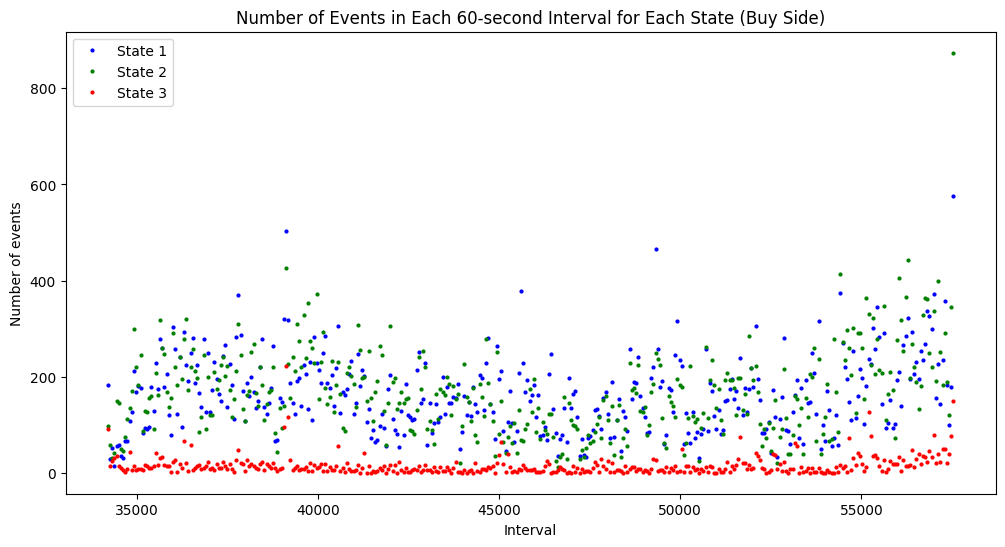

In [ ]:
# Create dot plot
plt.figure(figsize=(12,6))

plt.plot(np.arange(start_time, end_time, interval_length), events_per_interval1, 'bo', markersize=2, label='State 1')
plt.plot(np.arange(start_time, end_time, interval_length), events_per_interval2, 'go', markersize=2, label='State 2')
plt.plot(np.arange(start_time, end_time, interval_length), events_per_interval3, 'ro', markersize=2, label='State 3')

plt.xlabel('Interval')
plt.ylabel('Number of events')
plt.title('Number of Events in Each 60-second Interval for Each State (Buy Side)')
plt.legend()

plt.show()


### Since the plot is too noisy, we decide to split the graph into 3 state to make it clear and easy to interpret

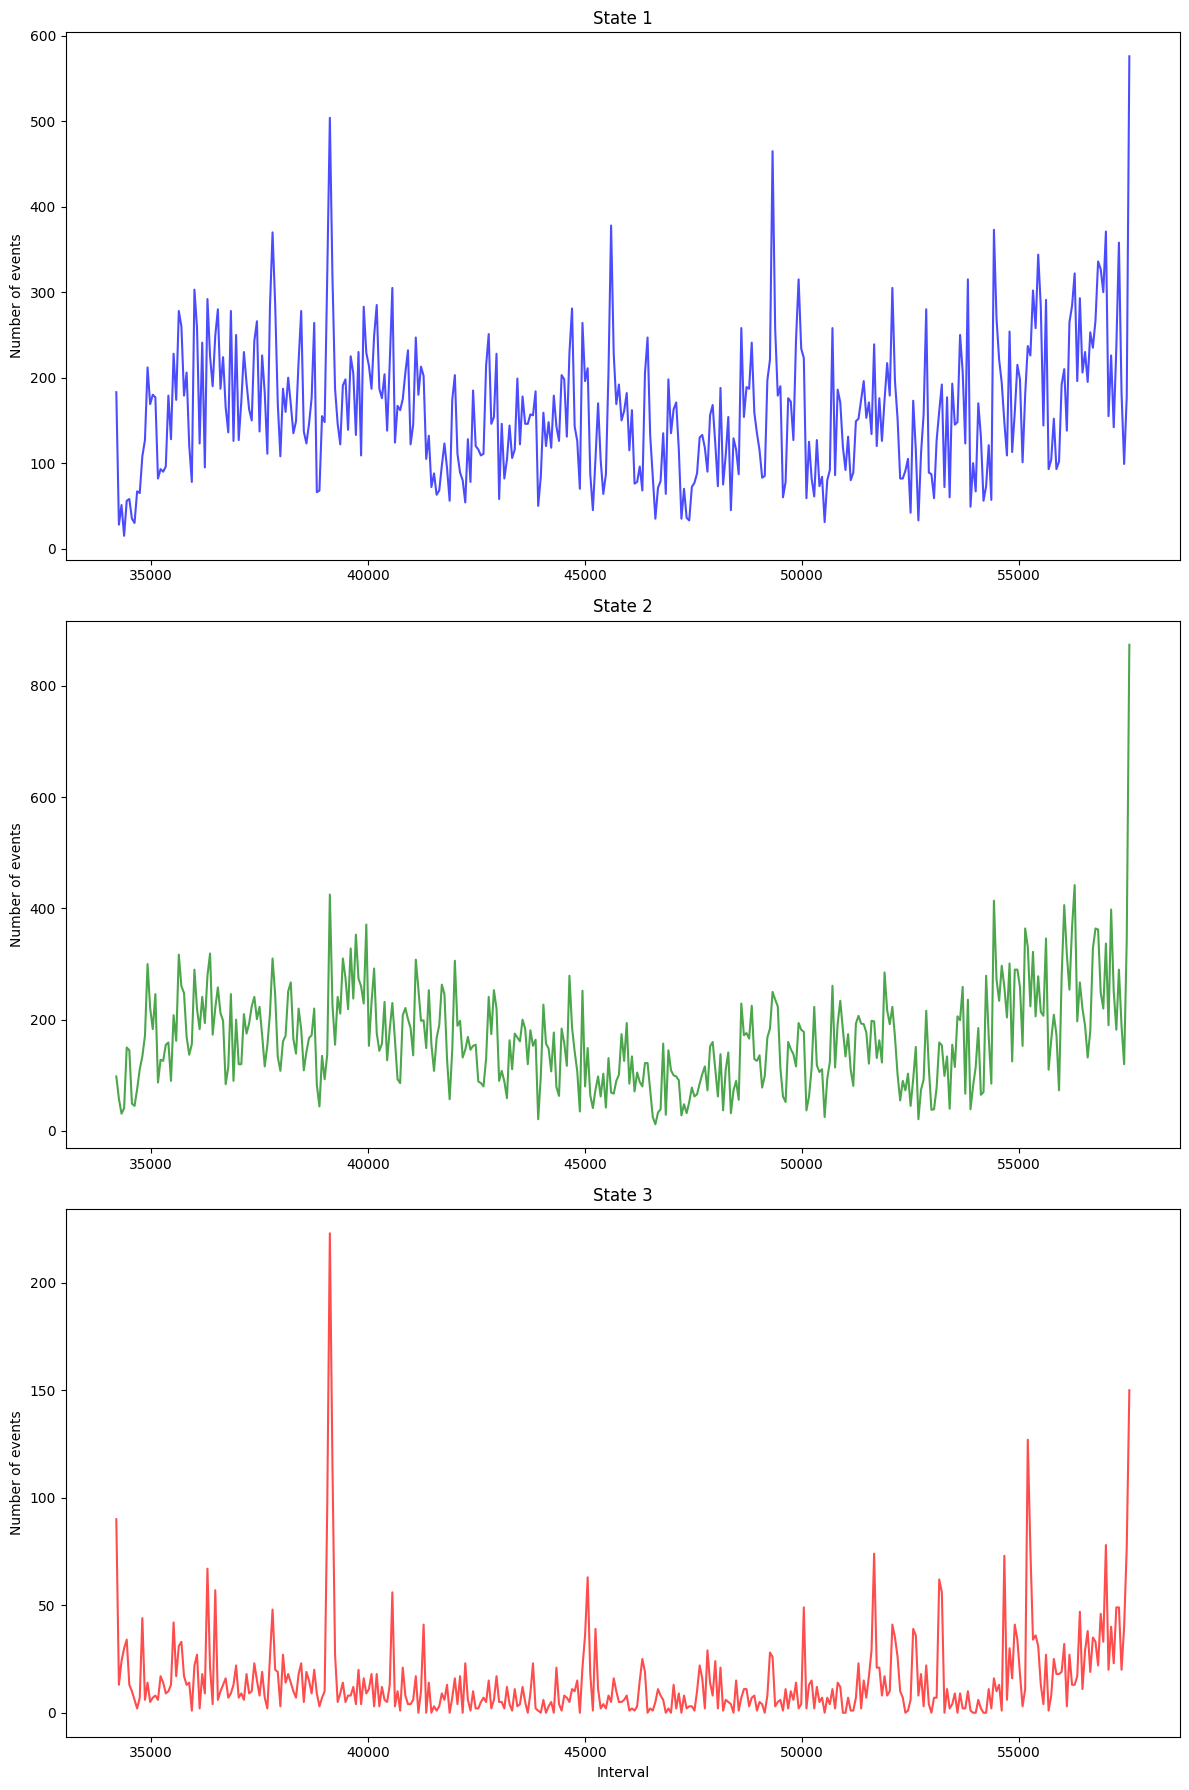

In [ ]:
# Create subplot
fig, axs = plt.subplots(3, 1, figsize=(12,18))

# Plot for each state in a different subplot with semi-transparent lines
axs[0].plot(np.arange(start_time, end_time, interval_length), events_per_interval1, 'b-', markersize=2, alpha=0.7)
axs[0].set_title('State 1')
axs[0].set_ylabel('Number of events')

axs[1].plot(np.arange(start_time, end_time, interval_length), events_per_interval2, 'g-', markersize=2, alpha=0.7)
axs[1].set_title('State 2')
axs[1].set_ylabel('Number of events')

axs[2].plot(np.arange(start_time, end_time, interval_length), events_per_interval3, 'r-', markersize=2, alpha=0.7)
axs[2].set_title('State 3')
axs[2].set_xlabel('Interval')
axs[2].set_ylabel('Number of events')

# Display the plot
plt.tight_layout()
plt.show()


#### As shown by the graph, the number of events varies significantly from interval to interval. So the intensity or the frequency is highly dependent on the time and varied by the time changing. So the assumptions of 'constant average rate'are not made since the obvious non-average events happened in the time range. The homogeneous poisson point process may mislead.

## Inhomogeneous poisson point process

So that to adapt the conditions which number of events happens non-uniformly. The varying intensity function is used.

Inhomogeneous Poisson Point Process (often called the Non-homogeneous Poisson Point Process) is a model used to describe random events that happen at a rate that might change over time or space.

It has some primary assumptions and conditions for modeling using an Inhomogeneous Poisson Point Process:
1. **Intensity Function**:
    - The key feature that differentiates an inhomogeneous process from a homogeneous one is the time-varying intensity function, \( $\lambda(t)$ \). This function gives the rate at which events are expected to occur at time \( t \).
    - \( $\lambda(t)$ \) must be non-negative for all \( t \), and it's often required to be integrable over the domain of interest.

2. **Independence**:
    - The number of events in non-overlapping intervals are independent. For instance, the number of events happening in the time interval [a, b] is independent of the number of events in [c, d] as long as [a, b] and [c, d] don't overlap.

3. **No Simultaneous Events**:
    - The probability of two or more events happening at the exact same time is zero. This is a natural assumption in many settings.

4. **Predictability**:
    - While the intensity function can change over time, it should be deterministic. That is, for a given point in time or space, the intensity function should provide a specific value. Random or stochastic intensity functions would lead to a different class of models.

5. **Integration Condition**:
    - The integral of the intensity function over the entire domain should be finite, i.e., \( $\int$ $\lambda(t)$ \, dt < $\infty$ \) over the domain of interest. This ensures that the expected number of events is finite.

6. **Memorylessness**:
    - The occurrence of an event does not influence the probability of future events. This is a fundamental property of the Poisson process. It means, for example, that if you're modeling the arrival of customers to a store, the arrival of one customer doesn't impact the probability of the next customer's arrival.


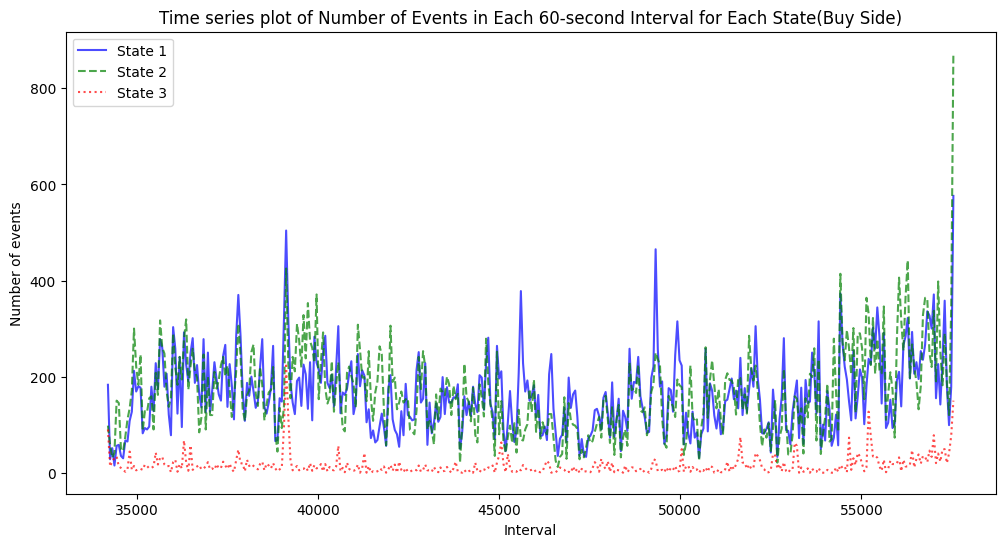

In [ ]:
# Create plot with all state lines in same graph
plt.figure(figsize=(12,6))

plt.plot(np.arange(start_time, end_time, interval_length), events_per_interval1, 'b-', markersize=2, alpha=0.7, label='State 1')
plt.plot(np.arange(start_time, end_time, interval_length), events_per_interval2, 'g--', markersize=2, alpha=0.7, label='State 2')
plt.plot(np.arange(start_time, end_time, interval_length), events_per_interval3, 'r:', markersize=2, alpha=0.7, label='State 3')

plt.xlabel('Interval')
plt.ylabel('Number of events')
plt.title('Time series plot of Number of Events in Each 60-second Interval for Each State(Buy Side)')
plt.legend()

plt.show()


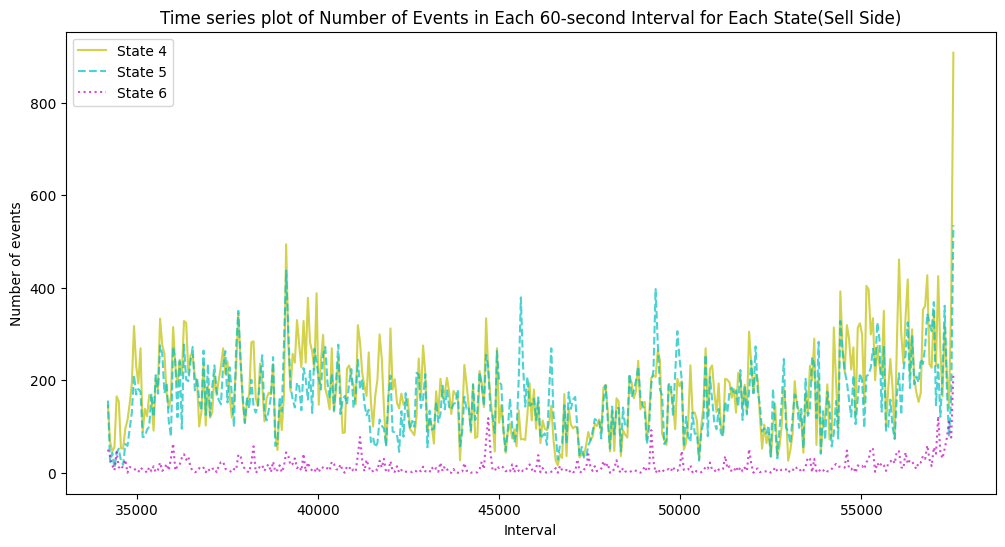

In [ ]:
# Create plot with all state lines in same graph
plt.figure(figsize=(12,6))

plt.plot(np.arange(start_time, end_time, interval_length), events_per_interval4, 'y-', markersize=2, alpha=0.7, label='State 4')
plt.plot(np.arange(start_time, end_time, interval_length), events_per_interval5, 'c--', markersize=2, alpha=0.7, label='State 5')
plt.plot(np.arange(start_time, end_time, interval_length), events_per_interval6, 'm:', markersize=2, alpha=0.7, label='State 6')

plt.xlabel('Interval')
plt.ylabel('Number of events')
plt.title('Time series plot of Number of Events in Each 60-second Interval for Each State(Sell Side)')
plt.legend()

plt.show()


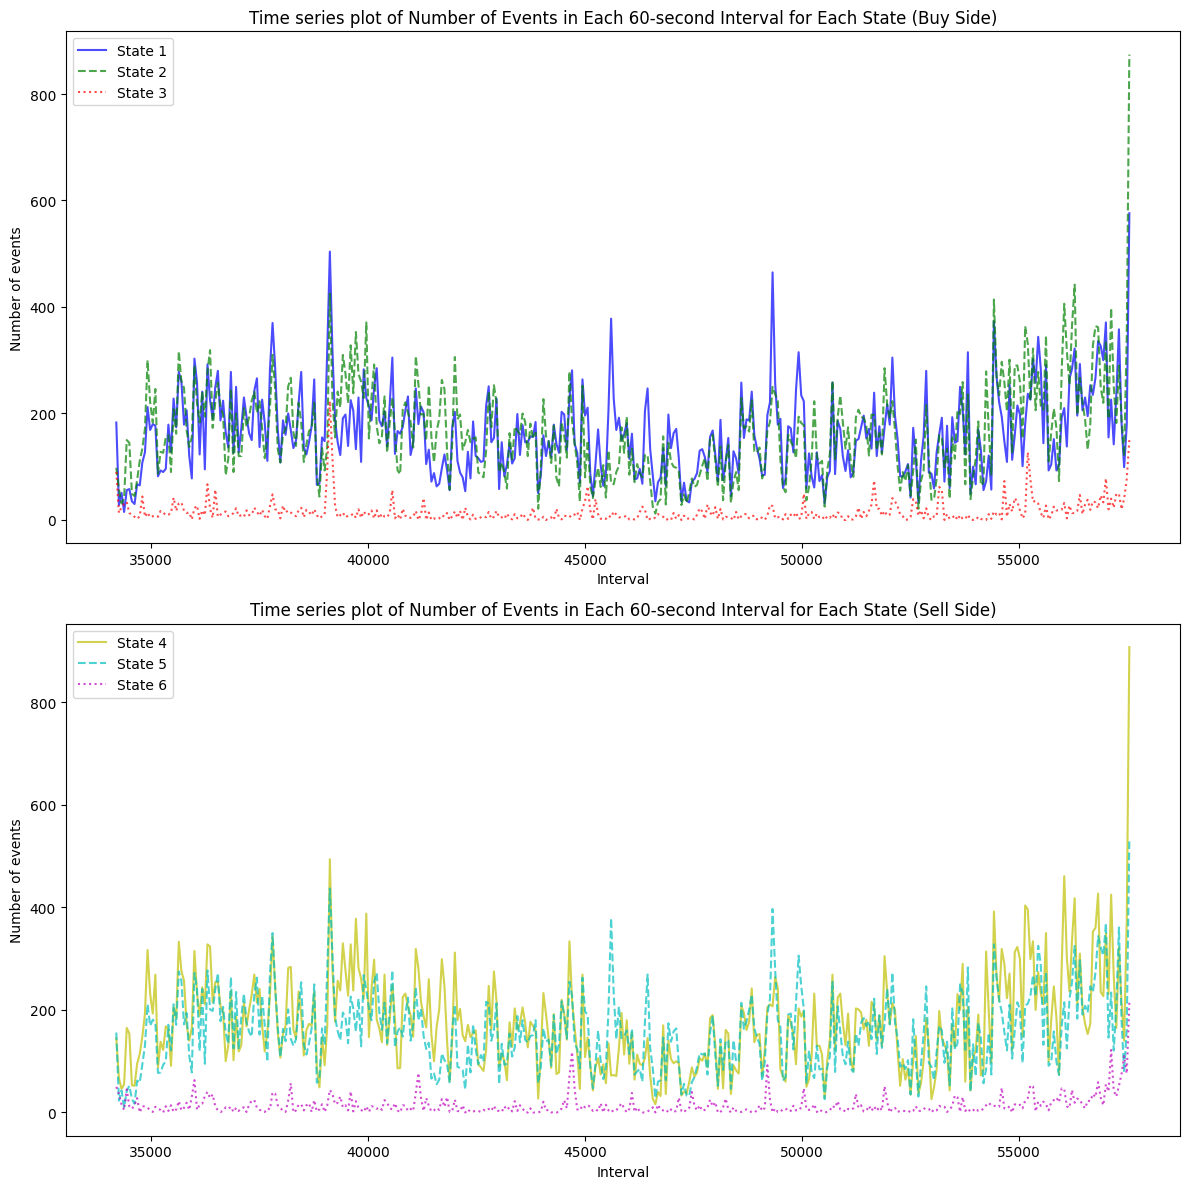

In [99]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Plot for Buy Side
axs[0].plot(np.arange(start_time, end_time, interval_length), events_per_interval1, 'b-', markersize=2, alpha=0.7, label='State 1')
axs[0].plot(np.arange(start_time, end_time, interval_length), events_per_interval2, 'g--', markersize=2, alpha=0.7, label='State 2')
axs[0].plot(np.arange(start_time, end_time, interval_length), events_per_interval3, 'r:', markersize=2, alpha=0.7, label='State 3')
axs[0].set_xlabel('Interval')
axs[0].set_ylabel('Number of events')
axs[0].set_title('Time series plot of Number of Events in Each 60-second Interval for Each State (Buy Side)')
axs[0].legend()

# Plot for Sell Side
axs[1].plot(np.arange(start_time, end_time, interval_length), events_per_interval4, 'y-', markersize=2, alpha=0.7, label='State 4')
axs[1].plot(np.arange(start_time, end_time, interval_length), events_per_interval5, 'c--', markersize=2, alpha=0.7, label='State 5')
axs[1].plot(np.arange(start_time, end_time, interval_length), events_per_interval6, 'm:', markersize=2, alpha=0.7, label='State 6')
axs[1].set_xlabel('Interval')
axs[1].set_ylabel('Number of events')
axs[1].set_title('Time series plot of Number of Events in Each 60-second Interval for Each State (Sell Side)')
axs[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


# MA Moving Average

#### Take the window size as 10, so 60*10=600 seconds = 10 minutes as the lagging. So predict the next state changed based on the previous 10 mintues interval in time series ploting

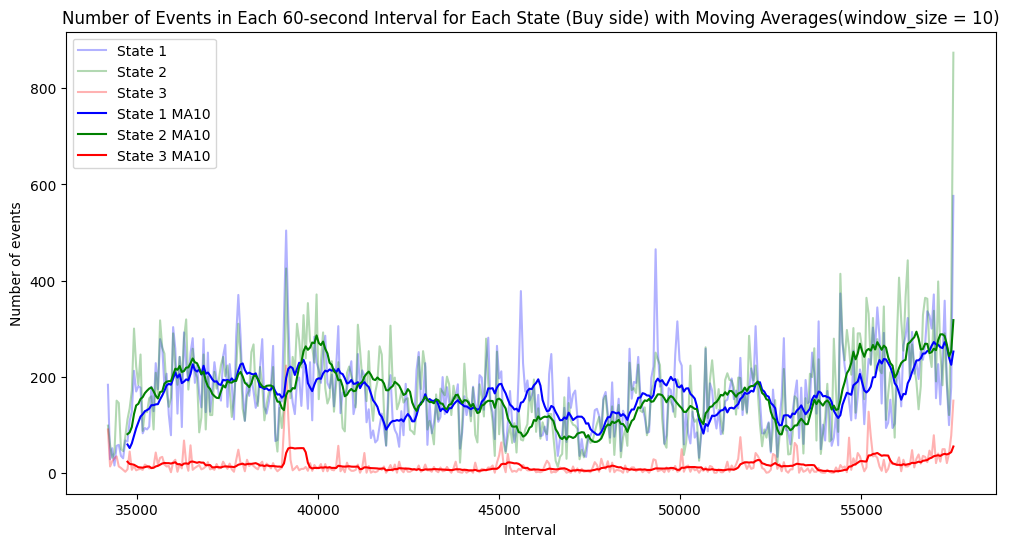

In [ ]:
# Define the window size for the moving average
window_size = 10

# Calculate moving averages for each state
events_per_interval1_ma = pd.Series(events_per_interval1).rolling(window=window_size).mean()
events_per_interval2_ma = pd.Series(events_per_interval2).rolling(window=window_size).mean()
events_per_interval3_ma = pd.Series(events_per_interval3).rolling(window=window_size).mean()

# Create plot with lines of different styles, colors and transparency, and moving averages
plt.figure(figsize=(12,6))

plt.plot(np.arange(start_time, end_time, interval_length), events_per_interval1, 'b-', markersize=2, alpha=0.3, label='State 1')
plt.plot(np.arange(start_time, end_time, interval_length), events_per_interval2, 'g-', markersize=2, alpha=0.3, label='State 2')
plt.plot(np.arange(start_time, end_time, interval_length), events_per_interval3, 'r-', markersize=2, alpha=0.3, label='State 3')

plt.plot(np.arange(start_time, end_time, interval_length), events_per_interval1_ma, 'b-', markersize=2, label='State 1 MA10')
plt.plot(np.arange(start_time, end_time, interval_length), events_per_interval2_ma, 'g-', markersize=2, label='State 2 MA10')
plt.plot(np.arange(start_time, end_time, interval_length), events_per_interval3_ma, 'r-', markersize=2, label='State 3 MA10')

plt.xlabel('Interval')
plt.ylabel('Number of events')
plt.title('Number of Events in Each 60-second Interval for Each State (Buy side) with Moving Averages(window_size = 10)')
plt.legend()

plt.show()


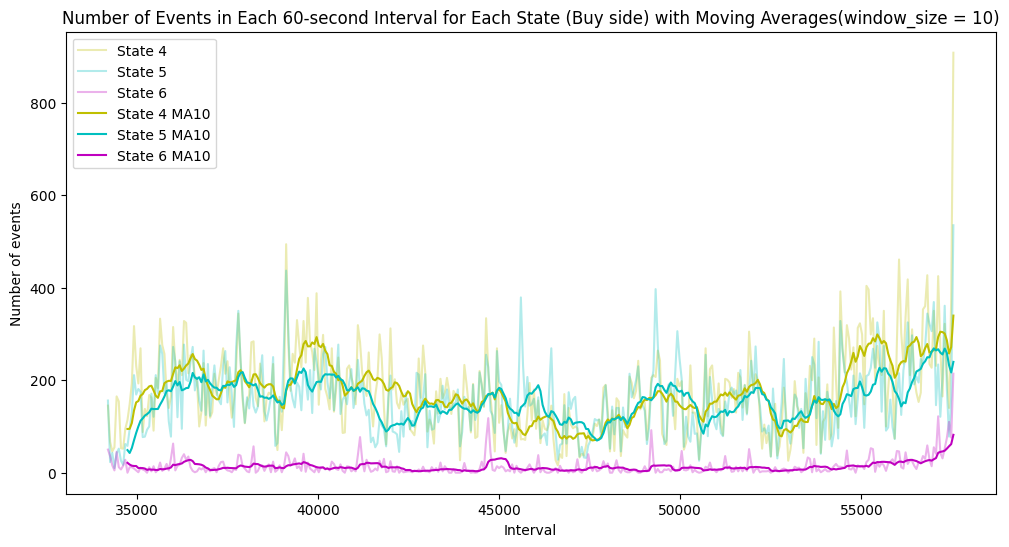

In [ ]:
# Define the window size for the moving average
window_size = 10

# Calculate moving averages for each state
events_per_interval4_ma = pd.Series(events_per_interval4).rolling(window=window_size).mean()
events_per_interval5_ma = pd.Series(events_per_interval5).rolling(window=window_size).mean()
events_per_interval6_ma = pd.Series(events_per_interval6).rolling(window=window_size).mean()

# Create plot with lines of different styles, colors and transparency, and moving averages
plt.figure(figsize=(12,6))

plt.plot(np.arange(start_time, end_time, interval_length), events_per_interval4, 'y-', markersize=2, alpha=0.3, label='State 4')
plt.plot(np.arange(start_time, end_time, interval_length), events_per_interval5, 'c-', markersize=2, alpha=0.3, label='State 5')
plt.plot(np.arange(start_time, end_time, interval_length), events_per_interval6, 'm-', markersize=2, alpha=0.3, label='State 6')

plt.plot(np.arange(start_time, end_time, interval_length), events_per_interval4_ma, 'y-', markersize=2, label='State 4 MA10')
plt.plot(np.arange(start_time, end_time, interval_length), events_per_interval5_ma, 'c-', markersize=2, label='State 5 MA10')
plt.plot(np.arange(start_time, end_time, interval_length), events_per_interval6_ma, 'm-', markersize=2, label='State 6 MA10')

plt.xlabel('Interval')
plt.ylabel('Number of events')
plt.title('Number of Events in Each 60-second Interval for Each State (Buy side) with Moving Averages(window_size = 10)')
plt.legend()

plt.show()


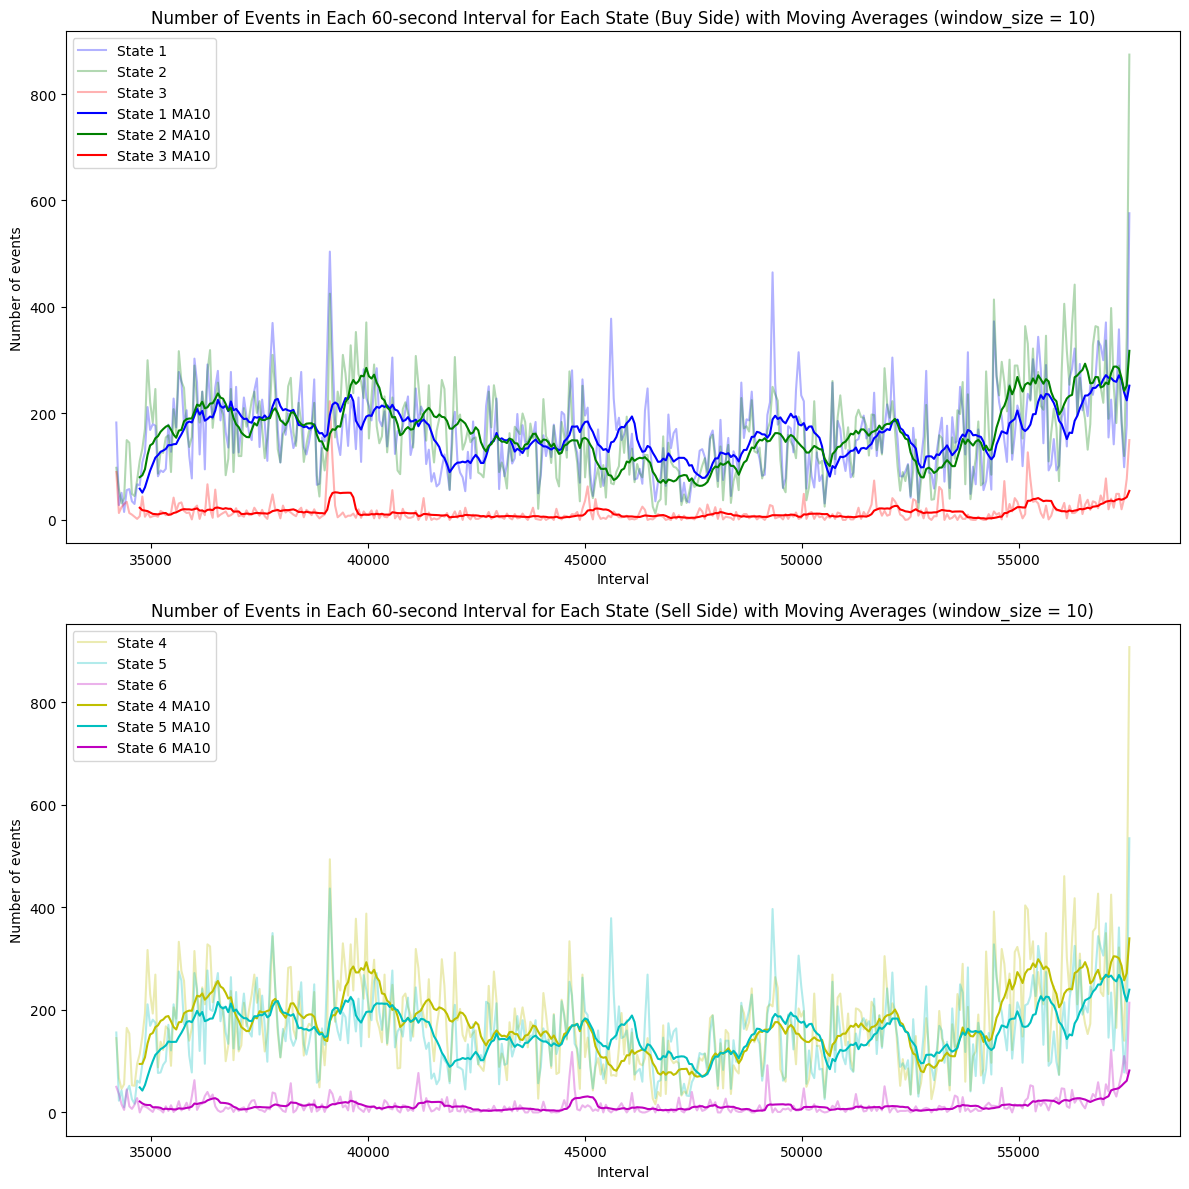

In [102]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the window size for the moving average
window_size = 10

# Calculate moving averages for each state
events_per_interval1_ma = pd.Series(events_per_interval1).rolling(window=window_size).mean()
events_per_interval2_ma = pd.Series(events_per_interval2).rolling(window=window_size).mean()
events_per_interval3_ma = pd.Series(events_per_interval3).rolling(window=window_size).mean()

events_per_interval4_ma = pd.Series(events_per_interval4).rolling(window=window_size).mean()
events_per_interval5_ma = pd.Series(events_per_interval5).rolling(window=window_size).mean()
events_per_interval6_ma = pd.Series(events_per_interval6).rolling(window=window_size).mean()

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Plot for Buy Side
axs[0].plot(np.arange(start_time, end_time, interval_length), events_per_interval1, 'b-', markersize=2, alpha=0.3, label='State 1')
axs[0].plot(np.arange(start_time, end_time, interval_length), events_per_interval2, 'g-', markersize=2, alpha=0.3, label='State 2')
axs[0].plot(np.arange(start_time, end_time, interval_length), events_per_interval3, 'r-', markersize=2, alpha=0.3, label='State 3')
axs[0].plot(np.arange(start_time, end_time, interval_length), events_per_interval1_ma, 'b-', markersize=2, label='State 1 MA10')
axs[0].plot(np.arange(start_time, end_time, interval_length), events_per_interval2_ma, 'g-', markersize=2, label='State 2 MA10')
axs[0].plot(np.arange(start_time, end_time, interval_length), events_per_interval3_ma, 'r-', markersize=2, label='State 3 MA10')
axs[0].set_xlabel('Interval')
axs[0].set_ylabel('Number of events')
axs[0].set_title('Number of Events in Each 60-second Interval for Each State (Buy Side) with Moving Averages (window_size = 10)')
axs[0].legend()

# Plot for Sell Side
axs[1].plot(np.arange(start_time, end_time, interval_length), events_per_interval4, 'y-', markersize=2, alpha=0.3, label='State 4')
axs[1].plot(np.arange(start_time, end_time, interval_length), events_per_interval5, 'c-', markersize=2, alpha=0.3, label='State 5')
axs[1].plot(np.arange(start_time, end_time, interval_length), events_per_interval6, 'm-', markersize=2, alpha=0.3, label='State 6')
axs[1].plot(np.arange(start_time, end_time, interval_length), events_per_interval4_ma, 'y-', markersize=2, label='State 4 MA10')
axs[1].plot(np.arange(start_time, end_time, interval_length), events_per_interval5_ma, 'c-', markersize=2, label='State 5 MA10')
axs[1].plot(np.arange(start_time, end_time, interval_length), events_per_interval6_ma, 'm-', markersize=2, label='State 6 MA10')
axs[1].set_xlabel('Interval')
axs[1].set_ylabel('Number of events')
axs[1].set_title('Number of Events in Each 60-second Interval for Each State (Sell Side) with Moving Averages (window_size = 10)')
axs[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In this chart, the raw time series for each state is represented by semi-transparent lines, while the moving average is shown by opaque lines. You can see that the moving average line is smoother than the raw data line, revealing the long-term trend of event counts for each state more effectively. This allows us to see changes in event counts over time without being distracted by short-term fluctuations.

The window size of the moving average (10 in this example) is an adjustable parameter. Increasing the window size will produce smoother results but might hide some minor fluctuations. Decreasing it will make the results closer to the raw data but might introduce more noise.

# EMA Exponential Moving Average

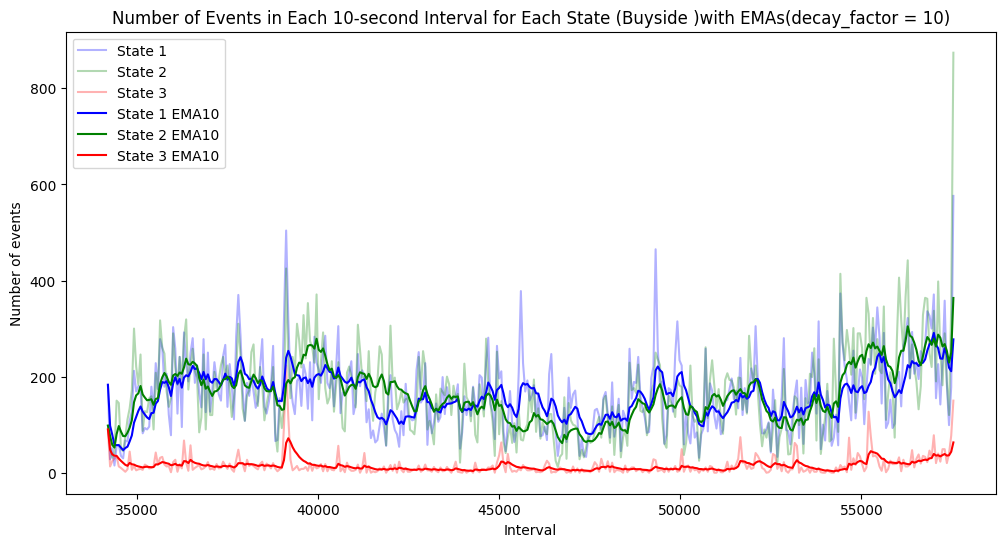

In [ ]:
# Define the decay factor for the EMA
decay_factor = window_size

# Calculate EMAs for each state
events_per_interval1_ema = pd.Series(events_per_interval1).ewm(span=decay_factor).mean()
events_per_interval2_ema = pd.Series(events_per_interval2).ewm(span=decay_factor).mean()
events_per_interval3_ema = pd.Series(events_per_interval3).ewm(span=decay_factor).mean()

# Create plot with lines of different styles, colors and transparency, and EMAs
plt.figure(figsize=(12,6))

plt.plot(np.arange(start_time, end_time, interval_length), events_per_interval1, 'b-', markersize=2, alpha=0.3, label='State 1')
plt.plot(np.arange(start_time, end_time, interval_length), events_per_interval2, 'g-', markersize=2, alpha=0.3, label='State 2')
plt.plot(np.arange(start_time, end_time, interval_length), events_per_interval3, 'r-', markersize=2, alpha=0.3, label='State 3')

plt.plot(np.arange(start_time, end_time, interval_length), events_per_interval1_ema, 'b-', markersize=2, label='State 1 EMA10')
plt.plot(np.arange(start_time, end_time, interval_length), events_per_interval2_ema, 'g-', markersize=2, label='State 2 EMA10')
plt.plot(np.arange(start_time, end_time, interval_length), events_per_interval3_ema, 'r-', markersize=2, label='State 3 EMA10')

plt.xlabel('Interval')
plt.ylabel('Number of events')
plt.title('Number of Events in Each 10-second Interval for Each State (Buyside )with EMAs(decay_factor = 10)')
plt.legend()

plt.show()


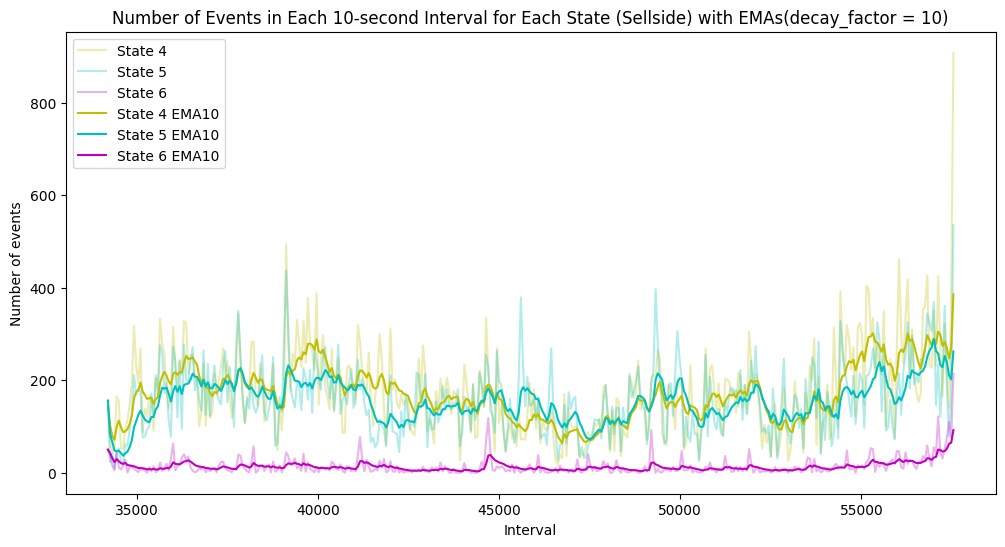

In [ ]:
# Define the decay factor for the EMA
decay_factor = window_size
# Calculate moving averages for each state
events_per_interval4_ema = pd.Series(events_per_interval4).ewm(span=decay_factor).mean()
events_per_interval5_ema = pd.Series(events_per_interval5).ewm(span=decay_factor).mean()
events_per_interval6_ema = pd.Series(events_per_interval6).ewm(span=decay_factor).mean()

# Create plot with lines of different styles, colors and transparency, and moving averages
plt.figure(figsize=(12,6))

plt.plot(np.arange(start_time, end_time, interval_length), events_per_interval4, 'y-', markersize=2, alpha=0.3, label='State 4')
plt.plot(np.arange(start_time, end_time, interval_length), events_per_interval5, 'c-', markersize=2, alpha=0.3, label='State 5')
plt.plot(np.arange(start_time, end_time, interval_length), events_per_interval6, 'm-', markersize=2, alpha=0.3, label='State 6')

plt.plot(np.arange(start_time, end_time, interval_length), events_per_interval4_ema, 'y-', markersize=2, label='State 4 EMA10')
plt.plot(np.arange(start_time, end_time, interval_length), events_per_interval5_ema, 'c-', markersize=2, label='State 5 EMA10')
plt.plot(np.arange(start_time, end_time, interval_length), events_per_interval6_ema, 'm-', markersize=2, label='State 6 EMA10')

plt.xlabel('Interval')
plt.ylabel('Number of events')
plt.title('Number of Events in Each 10-second Interval for Each State (Sellside) with EMAs(decay_factor = 10)')
plt.legend()

plt.show()


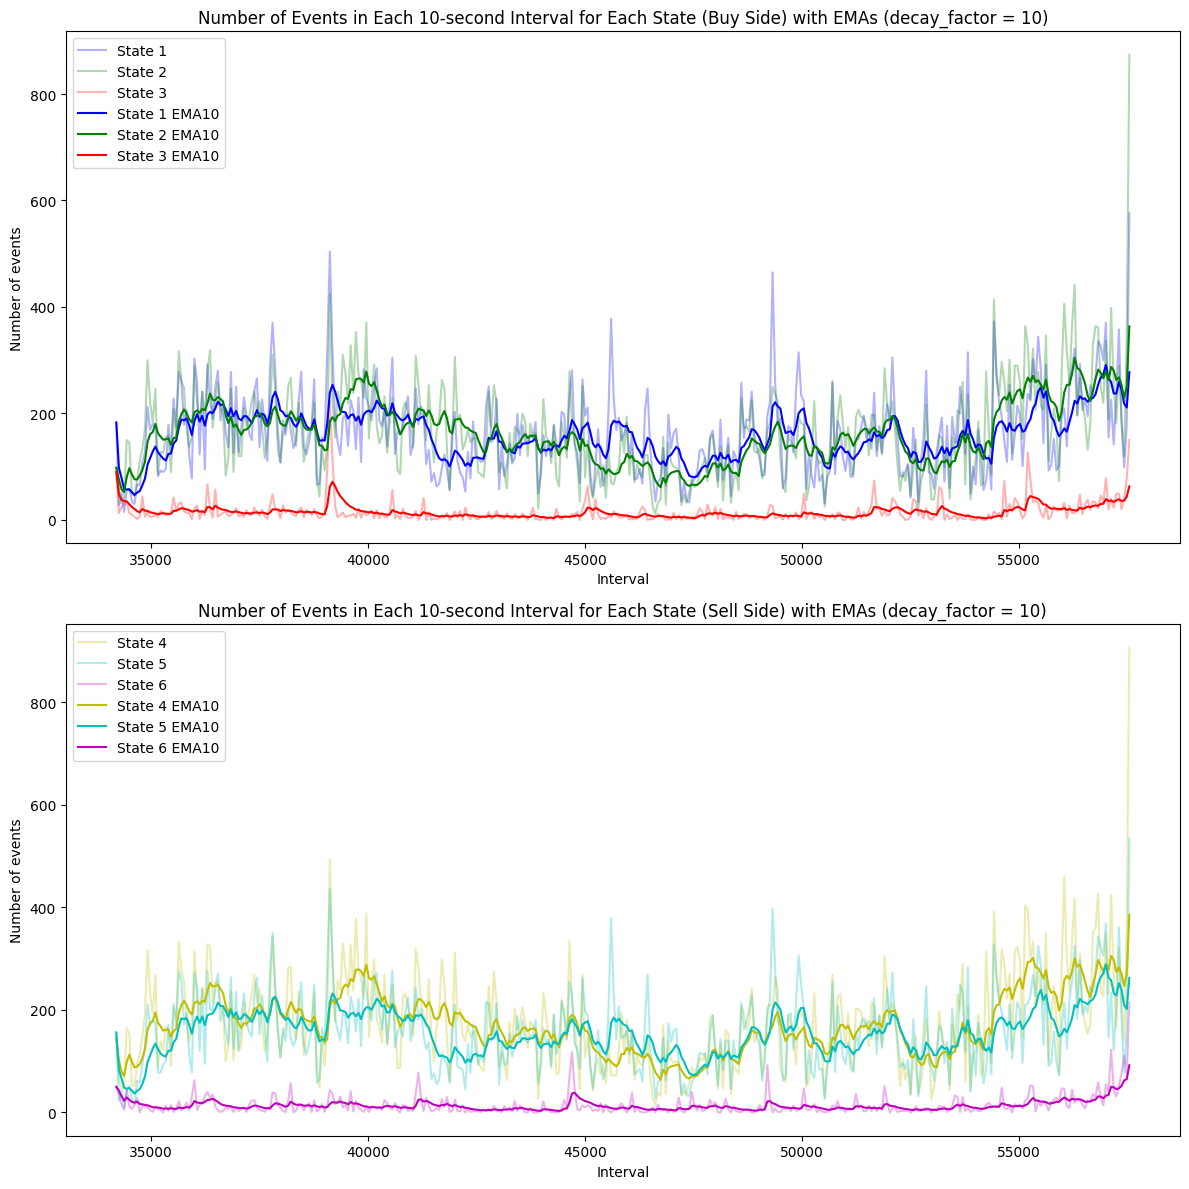

In [103]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the decay factor for the EMA
decay_factor = window_size

# Calculate EMAs for each state
events_per_interval1_ema = pd.Series(events_per_interval1).ewm(span=decay_factor).mean()
events_per_interval2_ema = pd.Series(events_per_interval2).ewm(span=decay_factor).mean()
events_per_interval3_ema = pd.Series(events_per_interval3).ewm(span=decay_factor).mean()

events_per_interval4_ema = pd.Series(events_per_interval4).ewm(span=decay_factor).mean()
events_per_interval5_ema = pd.Series(events_per_interval5).ewm(span=decay_factor).mean()
events_per_interval6_ema = pd.Series(events_per_interval6).ewm(span=decay_factor).mean()

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Plot for Buy Side
axs[0].plot(np.arange(start_time, end_time, interval_length), events_per_interval1, 'b-', markersize=2, alpha=0.3, label='State 1')
axs[0].plot(np.arange(start_time, end_time, interval_length), events_per_interval2, 'g-', markersize=2, alpha=0.3, label='State 2')
axs[0].plot(np.arange(start_time, end_time, interval_length), events_per_interval3, 'r-', markersize=2, alpha=0.3, label='State 3')
axs[0].plot(np.arange(start_time, end_time, interval_length), events_per_interval1_ema, 'b-', markersize=2, label='State 1 EMA10')
axs[0].plot(np.arange(start_time, end_time, interval_length), events_per_interval2_ema, 'g-', markersize=2, label='State 2 EMA10')
axs[0].plot(np.arange(start_time, end_time, interval_length), events_per_interval3_ema, 'r-', markersize=2, label='State 3 EMA10')
axs[0].set_xlabel('Interval')
axs[0].set_ylabel('Number of events')
axs[0].set_title('Number of Events in Each 10-second Interval for Each State (Buy Side) with EMAs (decay_factor = 10)')
axs[0].legend()

# Plot for Sell Side
axs[1].plot(np.arange(start_time, end_time, interval_length), events_per_interval4, 'y-', markersize=2, alpha=0.3, label='State 4')
axs[1].plot(np.arange(start_time, end_time, interval_length), events_per_interval5, 'c-', markersize=2, alpha=0.3, label='State 5')
axs[1].plot(np.arange(start_time, end_time, interval_length), events_per_interval6, 'm-', markersize=2, alpha=0.3, label='State 6')
axs[1].plot(np.arange(start_time, end_time, interval_length), events_per_interval4_ema, 'y-', markersize=2, label='State 4 EMA10')
axs[1].plot(np.arange(start_time, end_time, interval_length), events_per_interval5_ema, 'c-', markersize=2, label='State 5 EMA10')
axs[1].plot(np.arange(start_time, end_time, interval_length), events_per_interval6_ema, 'm-', markersize=2, label='State 6 EMA10')
axs[1].set_xlabel('Interval')
axs[1].set_ylabel('Number of events')
axs[1].set_title('Number of Events in Each 10-second Interval for Each State (Sell Side) with EMAs (decay_factor = 10)')
axs[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In this chart, the raw time series for each state is represented by semi-transparent lines, while the Exponential Moving Average (EMA) is depicted by opaque lines. You can observe that the EMA line is smoother than the raw data line, better highlighting the long-term trend of event counts for each state. This allows for a clearer view of changes in event counts over time without the interference of short-term fluctuations.

It's worth noting that since EMA assigns more weight to recent data, the EMA line responds quicker and is more sensitive to changes in event counts. This can be useful in certain scenarios, such as recent shifts, or data has sudden spikes or drops.

Similarly, the decay factor of the EMA (10 in this example) is an adjustable parameter. Increasing the decay factor will yield smoother results but may react slower to new changes. Decreasing it will make results more in line with raw data but might introduce more noise. 

### The MA and EMA clearly shows the extreme varing under the condition of the 1 minute windows for 3 states. The fluctuations of number of events arrival are significant and the spikes often appear for 3 states, expecially for time around 39000 seconds. 
### Event flow shows similarities and also the emerging of simultaneous spikes in the 3 different states of time series indicate inter-dependence. Meanwhile, large amount of events arrival is commonly  followed by another large event arrival, which suggests volatility clustering.

## Volatility Clustering

#### Use volatility clustering to prove the assumption of independence in the non-homogeneous Poisson point process model is not satisfied so need a more sophisticated model.
#### In this time, use acf and pacf to give a prove.

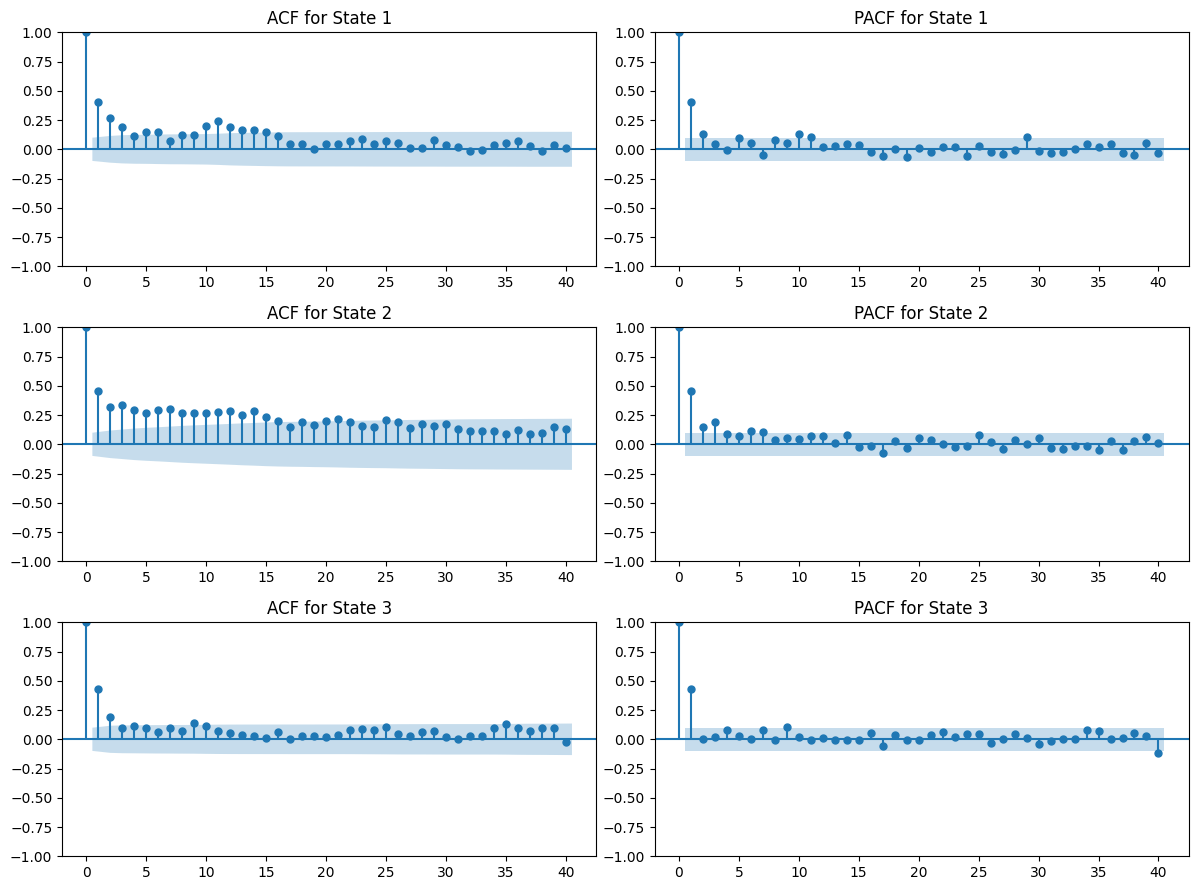

In [106]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Compute the inter-arrival times (time differences between consecutive events)
fig, ax = plt.subplots(3, 2, figsize=(12, 9))

# ACF and PACF for State 1
plot_acf(events_per_interval1, lags=40, ax=ax[0, 0], title="ACF for State 1")
plot_pacf(events_per_interval1, lags=40, ax=ax[0, 1], title="PACF for State 1")

# ACF and PACF for State 2
plot_acf(events_per_interval2, lags=40, ax=ax[1, 0], title="ACF for State 2")
plot_pacf(events_per_interval2, lags=40, ax=ax[1, 1], title="PACF for State 2")

# ACF and PACF for State 3
plot_acf(events_per_interval3, lags=40, ax=ax[2, 0], title="ACF for State 3")
plot_pacf(events_per_interval3, lags=40, ax=ax[2, 1], title="PACF for State 3")

plt.tight_layout()
plt.show()


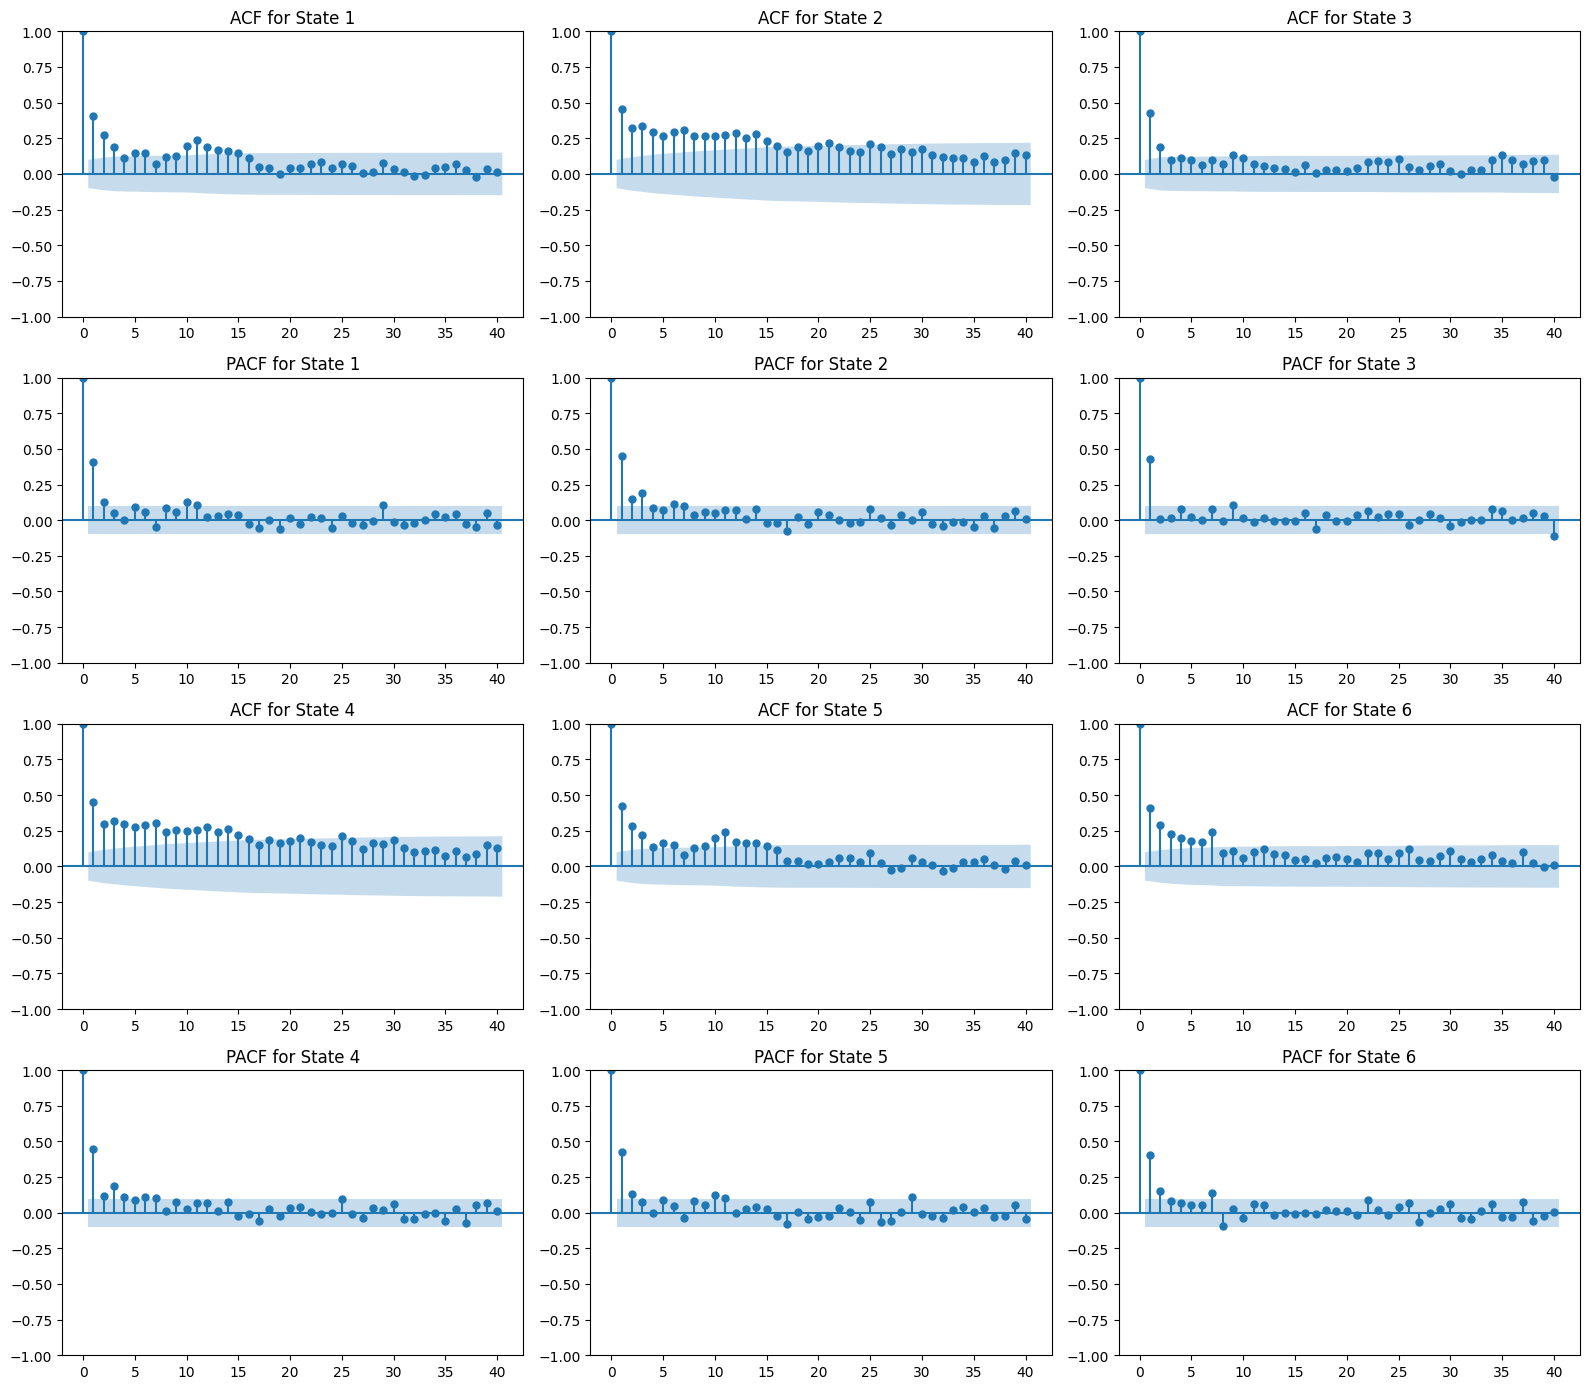

In [110]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Compute the inter-arrival times (time differences between consecutive events)
fig, ax = plt.subplots(4, 3, figsize=(16, 14))

# ACF and PACF for State 1
plot_acf(events_per_interval1, lags=40, ax=ax[0, 0], title="ACF for State 1")
plot_pacf(events_per_interval1, lags=40, ax=ax[1, 0], title="PACF for State 1")

# ACF and PACF for State 2
plot_acf(events_per_interval2, lags=40, ax=ax[0, 1], title="ACF for State 2")
plot_pacf(events_per_interval2, lags=40, ax=ax[1, 1], title="PACF for State 2")

# ACF and PACF for State 3
plot_acf(events_per_interval3, lags=40, ax=ax[0, 2], title="ACF for State 3")
plot_pacf(events_per_interval3, lags=40, ax=ax[1, 2], title="PACF for State 3")

# ACF and PACF for State 1
plot_acf(events_per_interval4, lags=40, ax=ax[2, 0], title="ACF for State 4")
plot_pacf(events_per_interval4, lags=40, ax=ax[3, 0], title="PACF for State 4")

# ACF and PACF for State 2
plot_acf(events_per_interval5, lags=40, ax=ax[2, 1], title="ACF for State 5")
plot_pacf(events_per_interval5, lags=40, ax=ax[3, 1], title="PACF for State 5")

# ACF and PACF for State 3
plot_acf(events_per_interval6, lags=40, ax=ax[2, 2], title="ACF for State 6")
plot_pacf(events_per_interval6, lags=40, ax=ax[3, 2], title="PACF for State 6")
plt.tight_layout()
plt.show()


The blue segment represents the 95 % confidence bands.

The ACF and PACF remains significant for the first 10 to 15 lags for value of 0.2 and 0.1 respectively. Which shows a great clustering for suggesting that large changes are followed by large changes 

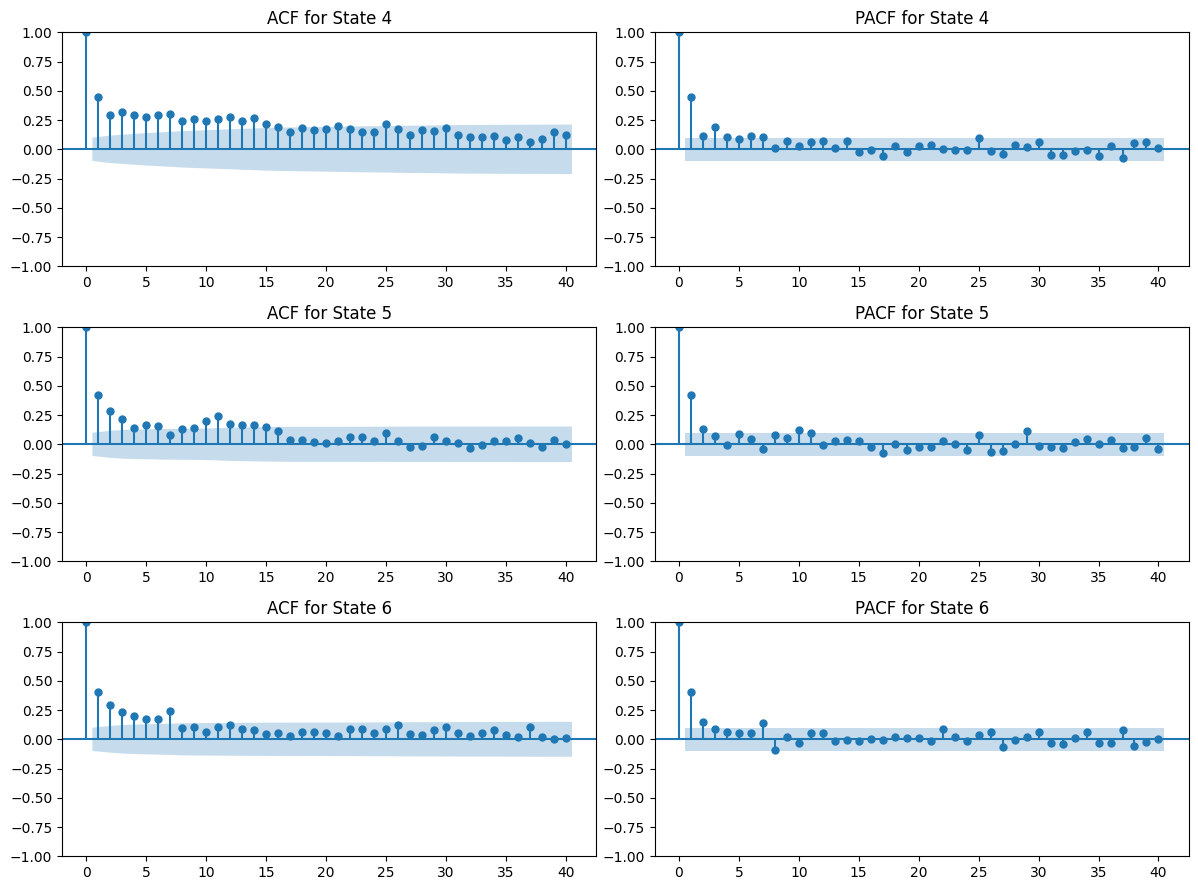

In [107]:
# Compute the inter-arrival times (time differences between consecutive events)
fig, ax = plt.subplots(3, 2, figsize=(12, 9))

# ACF and PACF for State 1
plot_acf(events_per_interval4, lags=40, ax=ax[0, 0], title="ACF for State 4")
plot_pacf(events_per_interval4, lags=40, ax=ax[0, 1], title="PACF for State 4")

# ACF and PACF for State 2
plot_acf(events_per_interval5, lags=40, ax=ax[1, 0], title="ACF for State 5")
plot_pacf(events_per_interval5, lags=40, ax=ax[1, 1], title="PACF for State 5")

# ACF and PACF for State 3
plot_acf(events_per_interval6, lags=40, ax=ax[2, 0], title="ACF for State 6")
plot_pacf(events_per_interval6, lags=40, ax=ax[2, 1], title="PACF for State 6")

plt.tight_layout()
plt.show()

## dependency

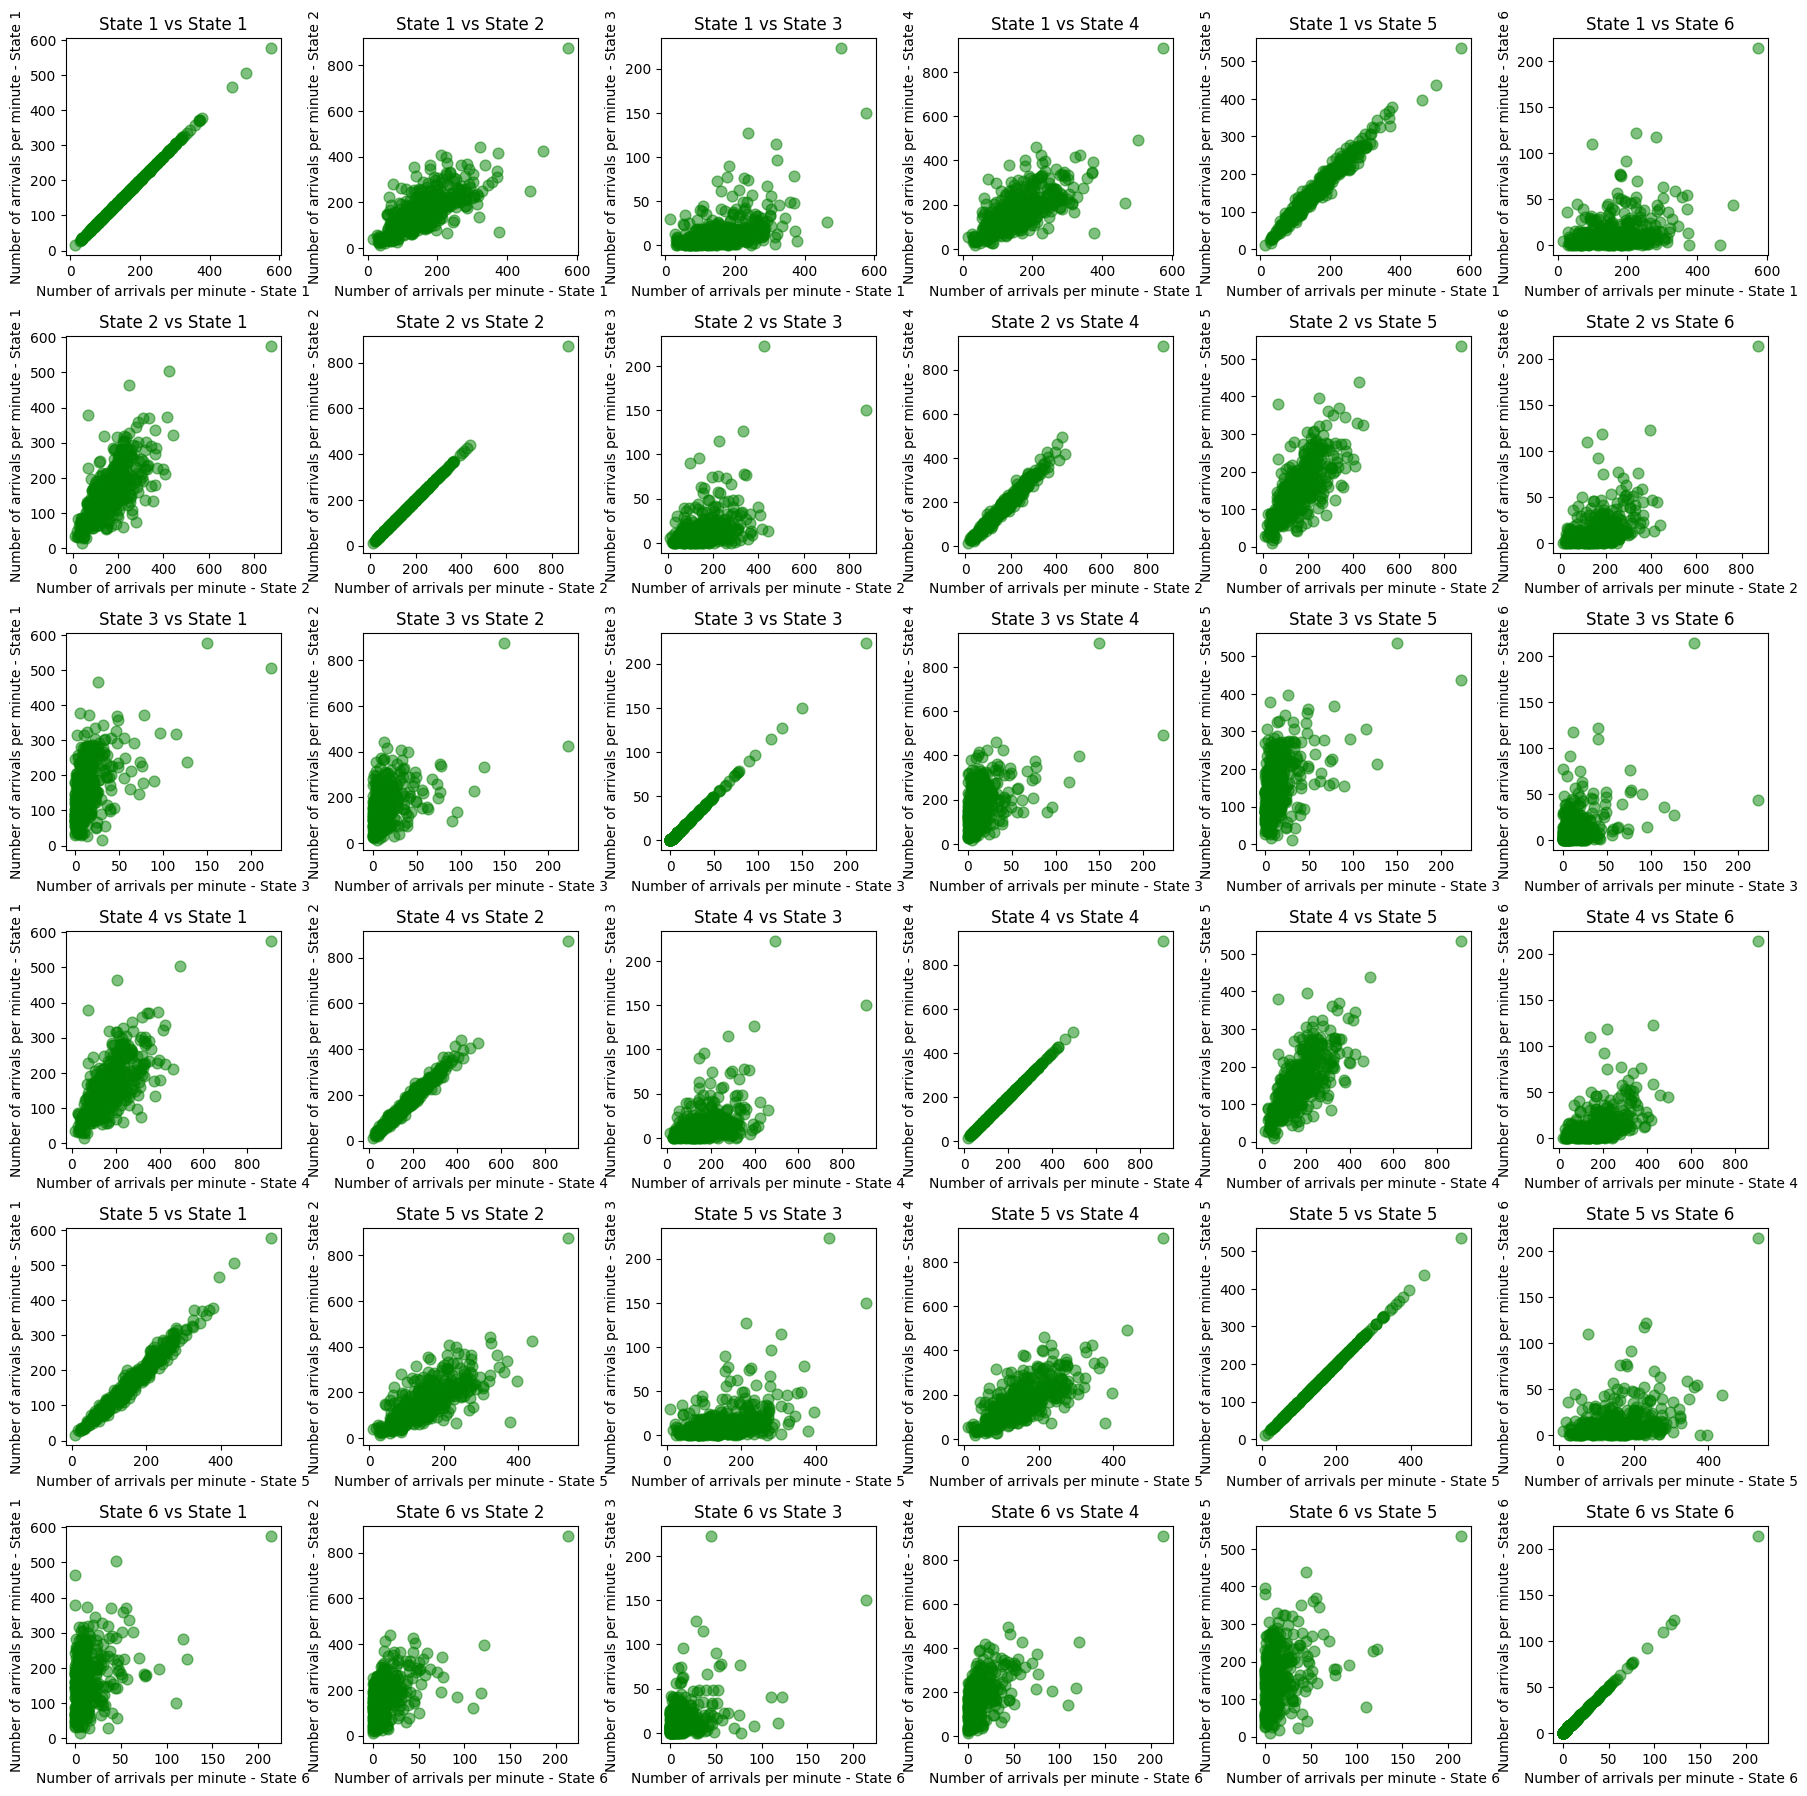

In [ ]:
# Combine the event data into a dictionary for easier iteration
states = {
    'State 1': events_per_interval1,
    'State 2': events_per_interval2,
    'State 3': events_per_interval3,
    'State 4': events_per_interval4,
    'State 5': events_per_interval5,
    'State 6': events_per_interval6,
}

# Create the 3x3 scatter plot diagram
fig, axs = plt.subplots(6, 6, figsize=(18, 18))

# Iterate over each combination of states
for i, (state_i, data_i) in enumerate(states.items()):
    for j, (state_j, data_j) in enumerate(states.items()):
        # Create the scatter plot for this combination of states
        axs[i, j].scatter(data_i, data_j,alpha=0.5, s=60, color='green')
        axs[i, j].set_title(f'{state_i} vs {state_j}')
        axs[i, j].set_xlabel(f'Number of arrivals per minute - {state_i}')
        axs[i, j].set_ylabel(f'Number of arrivals per minute - {state_j}')

plt.tight_layout()
plt.show()

## The correlation coefficient

## Pearson's:

In [ ]:
# Calculating the correlation coefficients
corr_pearson_12 = np.corrcoef(events_per_interval1, events_per_interval2)[0, 1]
corr_pearson_13 = np.corrcoef(events_per_interval1, events_per_interval3)[0, 1]
corr_pearson_23 = np.corrcoef(events_per_interval2, events_per_interval3)[0, 1]
corr_pearson_12 = np.corrcoef(events_per_interval1, events_per_interval2)[0, 1]
corr_pearson_13 = np.corrcoef(events_per_interval1, events_per_interval3)[0, 1]
corr_pearson_23 = np.corrcoef(events_per_interval2, events_per_interval3)[0, 1]
corr_pearson_12, corr_pearson_13, corr_pearson_23


(0.7198722059690739, 0.530122809247613, 0.4457546428130493)

## Spearman's

In [ ]:
from scipy.stats import spearmanr, kendalltau

# Spearman's
rho_12, _ = spearmanr(events_per_interval1, events_per_interval2)
rho_13, _ = spearmanr(events_per_interval1, events_per_interval3)
rho_23, _ = spearmanr(events_per_interval2, events_per_interval3)

## Kendall's Tau

In [ ]:
# Kendall's Tau
tau_12, _ = kendalltau(events_per_interval1, events_per_interval2)
tau_13, _ = kendalltau(events_per_interval1, events_per_interval3)
tau_23, _ = kendalltau(events_per_interval2, events_per_interval3)

## Mutual Information:

In [ ]:
from sklearn.feature_selection import mutual_info_regression

# Mutual Information
mi_12 = mutual_info_regression(events_per_interval1.reshape(-1, 1), events_per_interval2)
mi_13 = mutual_info_regression(events_per_interval1.reshape(-1, 1), events_per_interval3)
mi_23 = mutual_info_regression(events_per_interval2.reshape(-1, 1), events_per_interval3)


In [ ]:
from itertools import combinations
states = [events_per_interval1, events_per_interval2, events_per_interval3, 
          events_per_interval4, events_per_interval5, events_per_interval6]

results = []

for i, j in combinations(range(6), 2):  # for all unique pairs of states
    state_i = states[i]
    state_j = states[j]
    
    corr_pearson = np.corrcoef(state_i, state_j)[0, 1]
    rho, _ = spearmanr(state_i, state_j)
    tau, _ = kendalltau(state_i, state_j)
    mi = mutual_info_regression(state_i.reshape(-1, 1), state_j)[0]
    
    results.append((f"State {i+1} vs State {j+1}", corr_pearson, rho, tau, mi))

In [ ]:
df_CorrelationCoe = pd.DataFrame(results, columns=["States", "Pearson's", "Spearman's", "Kendall's Tau", "Mutual Information"])
df_CorrelationCoe.set_index("States", inplace=True)
print(df_CorrelationCoe)

                    Pearson's  Spearman's  Kendall's Tau  Mutual Information
States                                                                      
State 1 vs State 2   0.719872    0.718548       0.535879            0.390548
State 1 vs State 3   0.530123    0.514776       0.370502            0.125855
State 1 vs State 4   0.697035    0.697226       0.512672            0.352227
State 1 vs State 5   0.982788    0.981099       0.888004            1.748404
State 1 vs State 6   0.357557    0.268831       0.183275            0.072707
State 2 vs State 3   0.445755    0.407970       0.287836            0.098371
State 2 vs State 4   0.985344    0.983211       0.893550            1.767607
State 2 vs State 5   0.730766    0.729823       0.546576            0.447874
State 2 vs State 6   0.540237    0.448182       0.311106            0.111488
State 3 vs State 4   0.483219    0.407109       0.285128            0.125641
State 3 vs State 5   0.479991    0.457546       0.326401            0.121138

Pearson's gives you an idea of the linear relationship between the states.
Spearman's and Kendall's Tau can capture non-linear relationships and are less sensitive to outliers.
Mutual Information provides a measure of the dependency between variables, capturing any kind of relationship.

## An inhomogeneous Poisson point process model using a non-parametric estimator of the intensity function

## 1. using the kernel density estimation (KDE).
It is the most common method - 'kernel density estimator'. This method places a kernel (usually a Gaussian) on each observed event and sums up the contribution from all events to estimate the intensity function at any given point.

https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html

https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/

https://stackabuse.com/kernel-density-estimation-in-python-using-scikit-learn/

https://en.wikipedia.org/wiki/Kernel_density_estimation

zhihu.com/question/27301358

https://zhuanlan.zhihu.com/p/75162059

For each data point, a kernel (often Gaussian) is centered at that point. The KDE at any given point is the sum of all the kernels' values at that point, normalized so that the area under the curve is 1.

写公式，写推导

1. Gaussian
2. Tophat
3. Epanechnikov
4. Exponential
5. Cosine

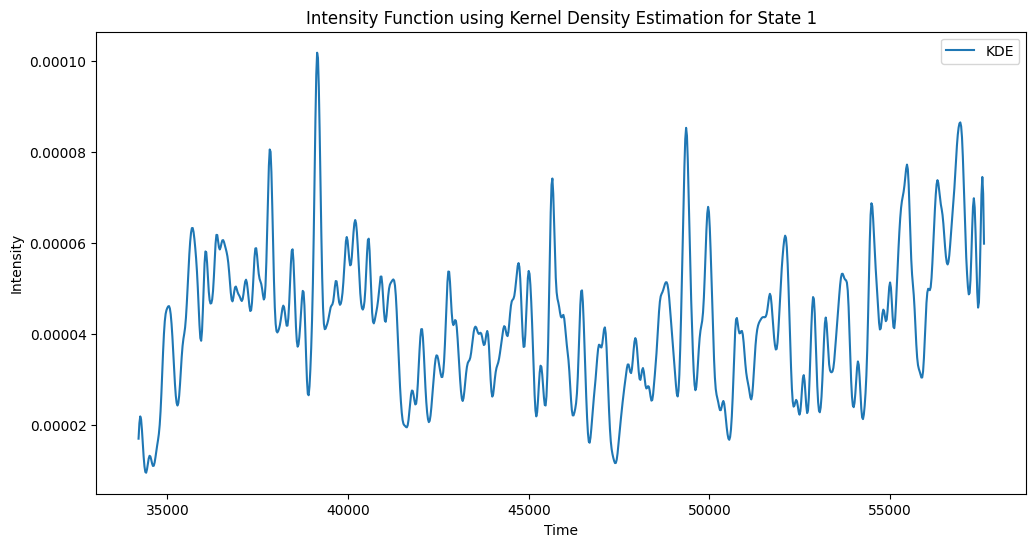

In [ ]:
import numpy as np
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

# Data preparation
time_points = np.linspace(sample_buyside_type1['Time'].min(), sample_buyside_type1['Time'].max(), 1000)[:, np.newaxis]
events = sample_buyside_type1['Time'].values[:, np.newaxis]

# Kernel Density Estimation
kde1 = KernelDensity(kernel='gaussian', bandwidth=60).fit(events)
log_dens1 = kde1.score_samples(time_points)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(time_points, np.exp(log_dens1), label='KDE')
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('Intensity Function using Kernel Density Estimation for State 1')
plt.legend()
plt.show()


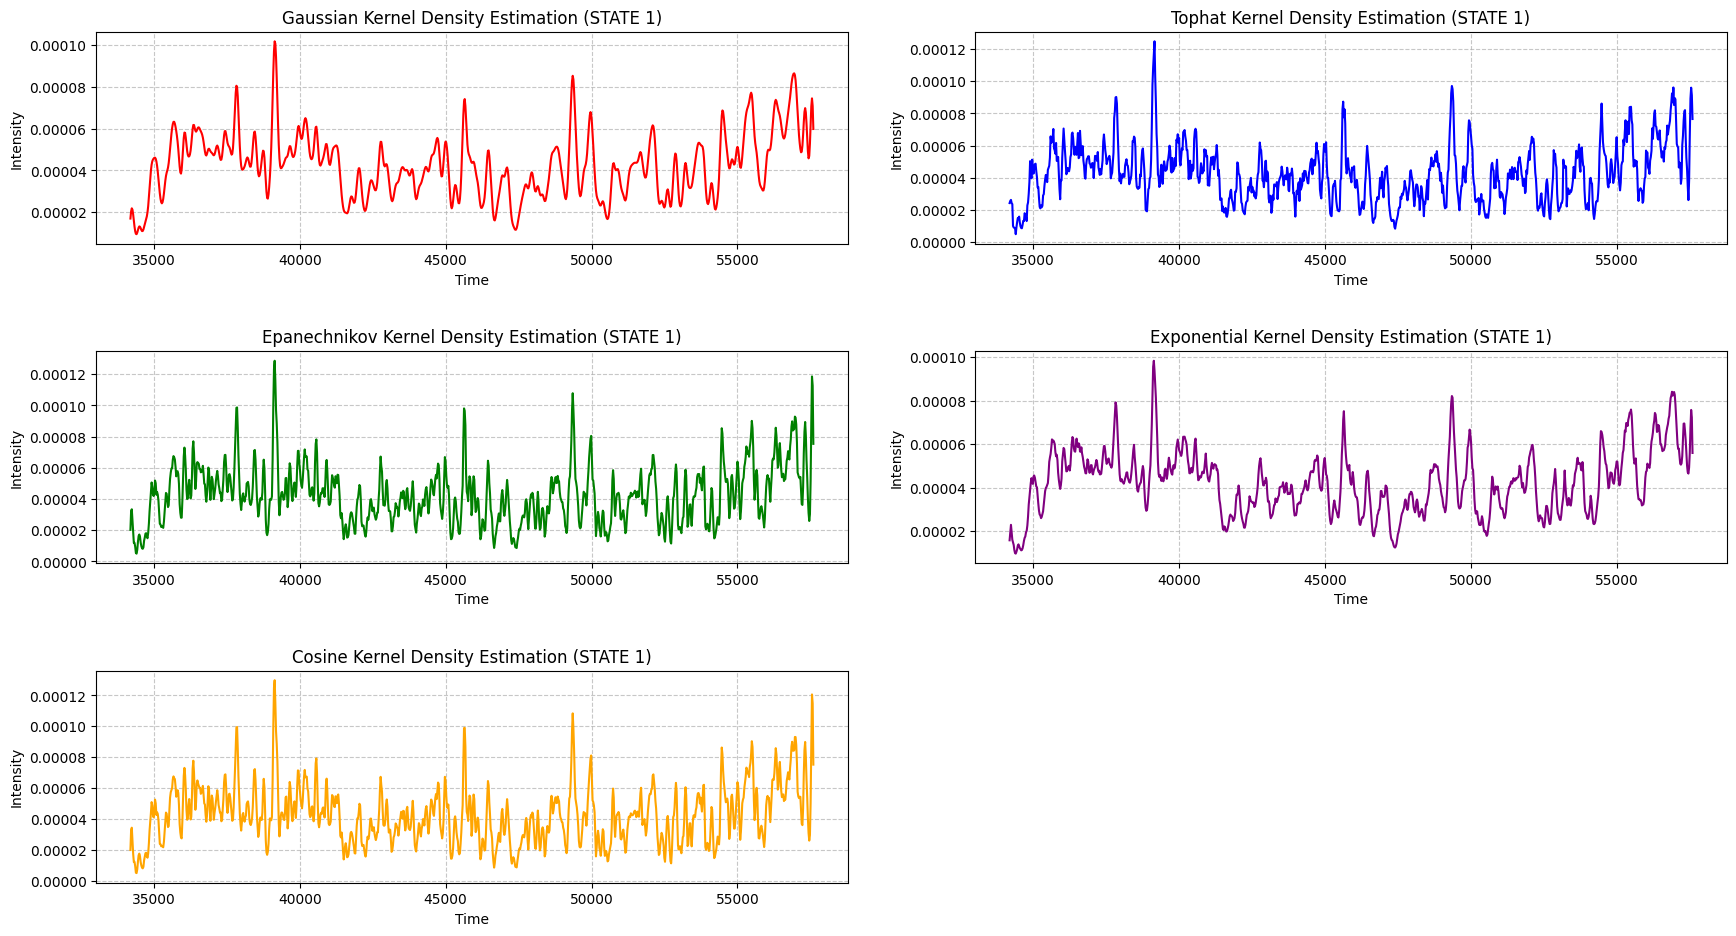

In [ ]:
#Kernel Density Function for 5 different methods:
kde2 = KernelDensity(kernel='tophat', bandwidth=60).fit(events)
log_dens2 = kde2.score_samples(time_points)
kde3 = KernelDensity(kernel='epanechnikov', bandwidth=60).fit(events)
log_dens3 = kde3.score_samples(time_points)
kde4 = KernelDensity(kernel='exponential', bandwidth=60).fit(events)
log_dens4 = kde4.score_samples(time_points)
kde5 = KernelDensity(kernel='cosine', bandwidth=60).fit(events)
log_dens5 = kde5.score_samples(time_points)

#Plotting
plt.figure(figsize=(18,10))  # Adjust the figure size

# Define a color palette for consistency
colors = ['red', 'blue', 'green', 'purple', 'orange']

plt.subplot(3, 2, 1)
plt.plot(time_points, np.exp(log_dens1), label='KDE', color=colors[0])
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('Gaussian Kernel Density Estimation (STATE 1)')
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(3, 2, 2)
plt.plot(time_points, np.exp(log_dens2), label='KDE', color=colors[1])
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('Tophat Kernel Density Estimation (STATE 1)')
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(3, 2, 3)
plt.plot(time_points, np.exp(log_dens3), label='KDE', color=colors[2])
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('Epanechnikov Kernel Density Estimation (STATE 1)')
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(3, 2, 4)
plt.plot(time_points, np.exp(log_dens4), label='KDE', color=colors[3])
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('Exponential Kernel Density Estimation (STATE 1)')
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(3, 2, 5)
plt.plot(time_points, np.exp(log_dens5), label='KDE', color=colors[4])
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('Cosine Kernel Density Estimation (STATE 1)')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout(pad=3.0)  # Add some padding between plots
plt.show()


纵轴是0.0000几是因为是probability 所以需要重新弄成arrival rate：

## 2. Using Kernel Smoothing for Intensity Estimation
Similar to KDE, for each observed event time, a kernel (e.g., Gaussian) is centered at that event time. The intensity at any given point in time is the sum of all kernels' values at that point. Unlike KDE, the result doesn't need to integrate to 1 over its domain since it represents intensity (or rate) rather than probability.

Bandwidth:
The bandwidth in the context of kernel smoothing controls the width of the kernel and determines how much the events contribute to the intensity estimate at a given time point. Specifically:

A small bandwidth will produce a kernel that is narrow. This means that each event will influence the intensity estimate only for a short time around the event. This can lead to a "spiky" intensity estimate that captures very local variations.

A large bandwidth will produce a broader kernel. This means that each event influences the intensity estimate over a more extended period. This can lead to a smoother intensity estimate that captures more global trends.

Choosing an appropriate bandwidth is crucial. If it's too small, the intensity function might be too noisy. If it's too large, the intensity function might be too smooth and miss important local variations.

写公式 写推导

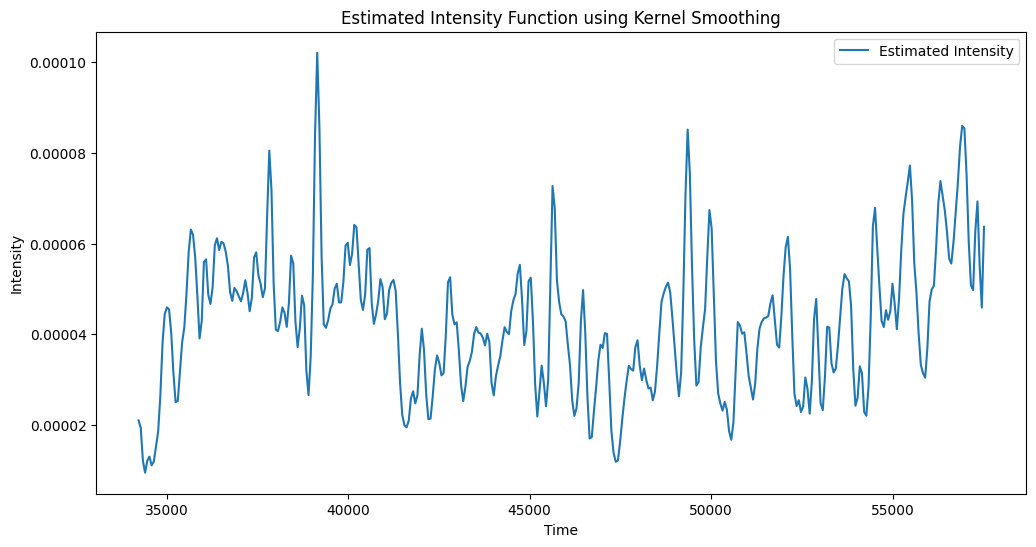

In [100]:
from scipy.stats import norm
state1_times = sample_buyside_type1['Time'].values
def kernel_smoothing_intensity(t, event_times, bandwidth):
    """
    Estimate the intensity function using kernel smoothing.
    """
    return np.sum(norm.pdf((t - event_times) / bandwidth) / bandwidth) / len(event_times)

# Time points at which to evaluate the intensity
time_points = np.arange(start_time, end_time, interval_length)
midpoints = time_points[:-1] + interval_length / 2  # Use the midpoints of the intervals

# Bandwidth for kernel smoothing (let's start with a basic bandwidth of 60 seconds or 1 minutes)
bandwidth = 60

# Estimate the intensity function at each time point
estimated_intensities = [kernel_smoothing_intensity(t, state1_times, bandwidth) for t in midpoints]

# Plotting the estimated intensity function
plt.figure(figsize=(12, 6))
plt.plot(midpoints, estimated_intensities, label="Estimated Intensity")
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('Estimated Intensity Function using Kernel Smoothing')
plt.legend()
plt.show()

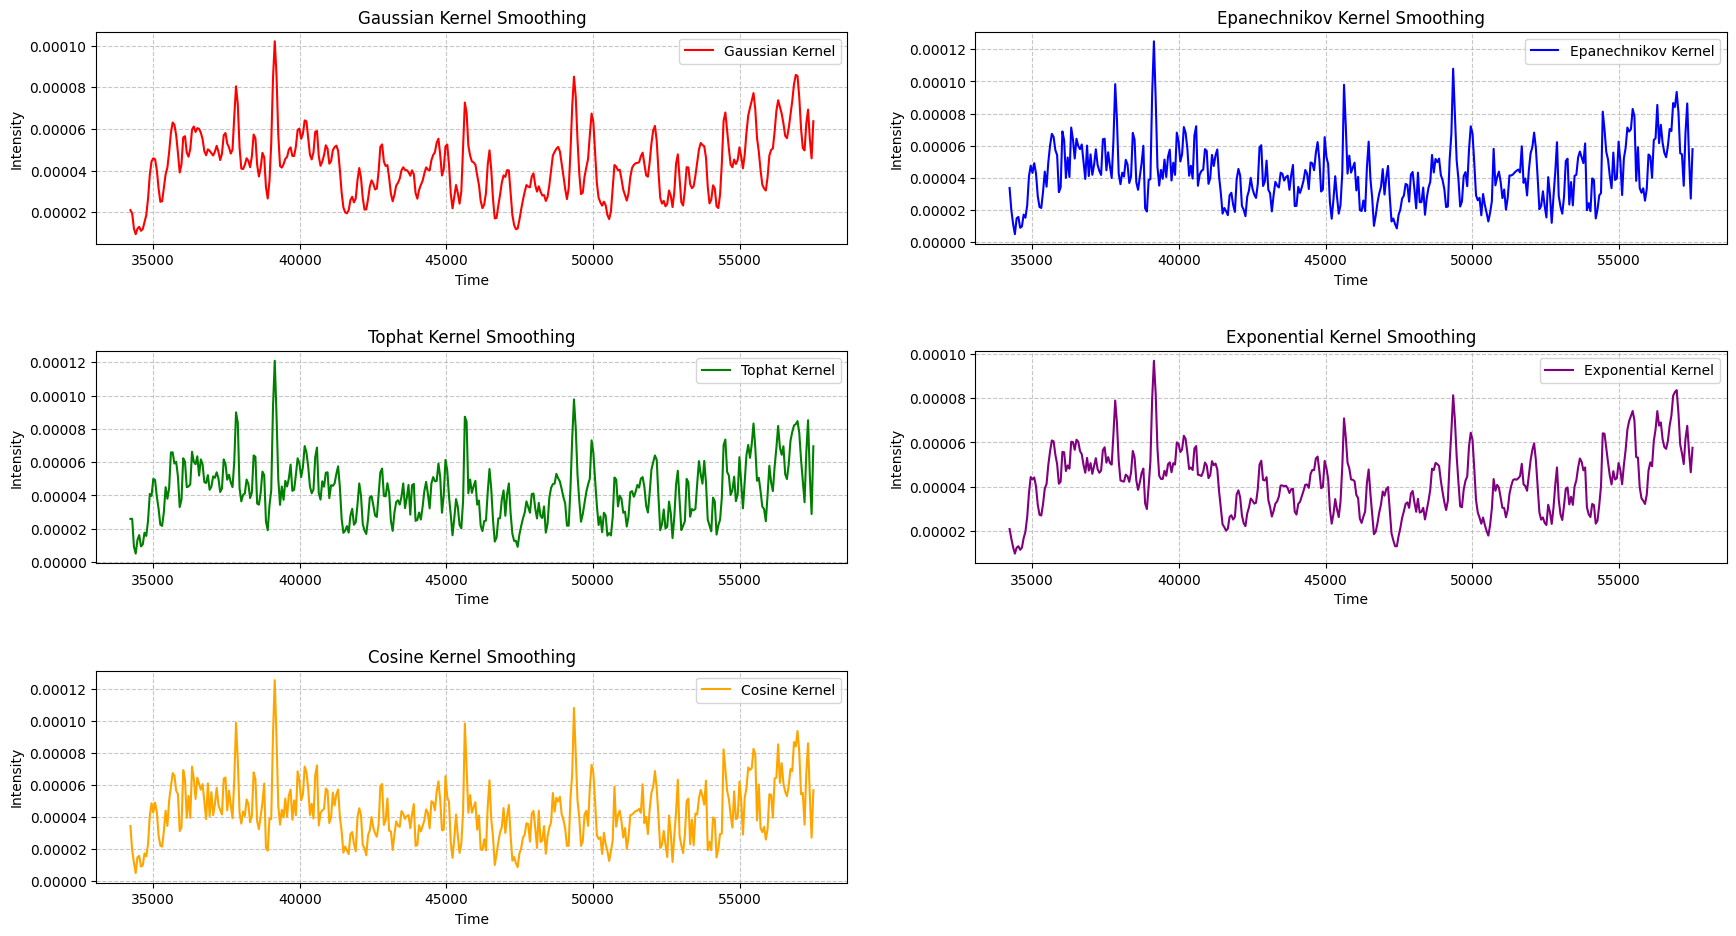

In [101]:
# Define the kernel functions

def epanechnikov_kernel(u):
    """Epanechnikov kernel function."""
    return (3/4) * (1 - u**2) if abs(u) <= 1 else 0

def tophat_kernel(u):
    """Tophat (Uniform) kernel function."""
    return 0.5 if abs(u) <= 1 else 0

def exponential_kernel(u):
    """Exponential kernel function."""
    return 0.5 * np.exp(-abs(u))

def cosine_kernel(u):
    """Cosine kernel function."""
    return (np.pi/4) * np.cos(np.pi * u / 2) if abs(u) <= 1 else 0

# Kernel smoothing intensity functions for each kernel

def kernel_smoothing_intensity(t, event_times, bandwidth, kernel_function):
    """Estimate the intensity function using kernel smoothing."""
    return np.sum([kernel_function((t - event_time) / bandwidth) for event_time in event_times]) / (bandwidth * len(event_times))

# Estimate the intensity functions using different kernels

estimated_intensities_epanechnikov = [kernel_smoothing_intensity(t, state1_times, bandwidth, epanechnikov_kernel) for t in midpoints]
estimated_intensities_tophat = [kernel_smoothing_intensity(t, state1_times, bandwidth, tophat_kernel) for t in midpoints]
estimated_intensities_exponential = [kernel_smoothing_intensity(t, state1_times, bandwidth, exponential_kernel) for t in midpoints]
estimated_intensities_cosine = [kernel_smoothing_intensity(t, state1_times, bandwidth, cosine_kernel) for t in midpoints]

# Plotting the estimated intensity functions for all kernels

# Define a color palette for consistency
colors = ['red', 'blue', 'green', 'purple', 'orange']

plt.figure(figsize=(18, 10))  # Adjust the figure size

plt.subplot(3, 2, 1)
plt.plot(midpoints, estimated_intensities, label="Gaussian Kernel", color=colors[0])
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('Gaussian Kernel Smoothing (STATE 1)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(3, 2, 2)
plt.plot(midpoints, estimated_intensities_epanechnikov, label="Epanechnikov Kernel", color=colors[1])
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('Epanechnikov Kernel Smoothing (STATE 1)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(3, 2, 3)
plt.plot(midpoints, estimated_intensities_tophat, label="Tophat Kernel", color=colors[2])
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('Tophat Kernel Smoothing (STATE 1)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(3, 2, 4)
plt.plot(midpoints, estimated_intensities_exponential, label="Exponential Kernel", color=colors[3])
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('Exponential Kernel Smoothing (STATE 1)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(3, 2, 5)
plt.plot(midpoints, estimated_intensities_cosine, label="Cosine Kernel", color=colors[4])
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('Cosine Kernel Smoothing (STATE 1)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout(pad=3.0)  # Add some padding between plots
plt.show()



In the context of financial data and time series analysis of the Limit Order Book (LOB), both Kernel Density Estimation (KDE) and Kernel Smoothing can be useful, but their applications are different. Here's how you might consider using them:

1. **Kernel Density Estimation (KDE):**
    - **Application**: You can use KDE to analyze the distribution of specific features or metrics of the LOB, such as the distribution of order sizes, price levels, or inter-arrival times of orders. KDE can provide insights into the underlying probability distributions of these features.
    - **Advantage**: KDE can help identify modes (peaks) in the distribution, which can be indicative of common order sizes or frequently used price levels, for instance.

2. **Kernel Smoothing (or Kernel Regression):**
    - **Application**: If you're interested in understanding trends or patterns in the LOB data over time, kernel smoothing can be beneficial. For example, you could use kernel smoothing to identify trends in the bid-ask spread over time or to smooth out noisy price movements to better identify underlying trends.
    - **Advantage**: Kernel smoothing can provide a clearer picture of the underlying structure or trend in the data by reducing noise.

**Recommendation**:
   - If your primary goal is to understand the **distributional characteristics** of specific features of the LOB, then KDE would be more appropriate.
   - If you're interested in identifying **trends or patterns** over time in the LOB data, then kernel smoothing would be more beneficial.
   - **Using Both**: There's no harm in using both methods and comparing the insights they provide. In fact, doing so can give you a more comprehensive understanding of the LOB. For instance, while KDE can provide insights into the distribution of order sizes, kernel smoothing can help identify how the average order size changes over time.

Ultimately, the method you choose should align with the specific questions you're trying to answer or the insights you're looking to gain from the LOB data. Using both methods in tandem can provide a more holistic understanding of the LOB dynamics.

## 3. Directly using the exponential moving average function to find the intensity function:
The code you provided calculates the Exponential Moving Average (EMA) of the event counts using a manual method, rather than using a built-in function like pandas' `ewm`. Let's break down the differences:

### Code Explanation:

1. **Histogram Calculation**:
    - You're discretizing the time series data into 1000 bins between the minimum and maximum times of the `sample_buyside_type1['Time']`.
    - `np.histogram` is used to create a histogram of event counts in these bins. The `event_counts` array contains the number of events in each bin.

2. **EMA Calculation**:
    - You've defined a decay factor `alpha`, which determines the weight given to the current observation versus the previous EMA value.
    - The EMA is initialized with the first event count.
    - The loop then iteratively calculates the EMA for each subsequent bin using the formula:
      \[
      $\text{EMA}[i]$ = $\alpha$ $\times$ $\text{event\_counts}[i]$ + (1 - $\alpha$) $\times$ $\text{EMA}[i-1]$
      \]
      This is the standard formula for EMA.

3. **Plotting**:
    - Finally, you plot the EMA against the time bins.

### Differences from the Previous Method:

1. **Manual Calculation vs. Built-in Function**: The main difference is that this code calculates the EMA manually using its formula, whereas the previous method utilized pandas' `ewm` function to compute the EMA.
   
2. **Bin Size and Range**: In the provided code, you're using 1000 bins across the entire time range of `sample_buyside_type1['Time']`. This might result in a finer granularity compared to the previous method which used intervals of a specified length (e.g., 1-minute intervals).

3. **Alpha vs. Span**: The `alpha` parameter in the provided code determines the decay factor for the EMA, while in the previous method, we used a `span` parameter. Both serve similar purposes but are defined differently. Specifically, for the EMA:
   \[
   $\alpha$ = $\frac{2}{{\text{span} + 1}}$
   \]
   So, if you know one, you can compute the other.

Both methods ultimately provide an Exponential Moving Average of the event counts, but the granularity and method of calculation differ. Depending on the specific requirements or preferences, one might choose to use the manual method or the built-in pandas function.

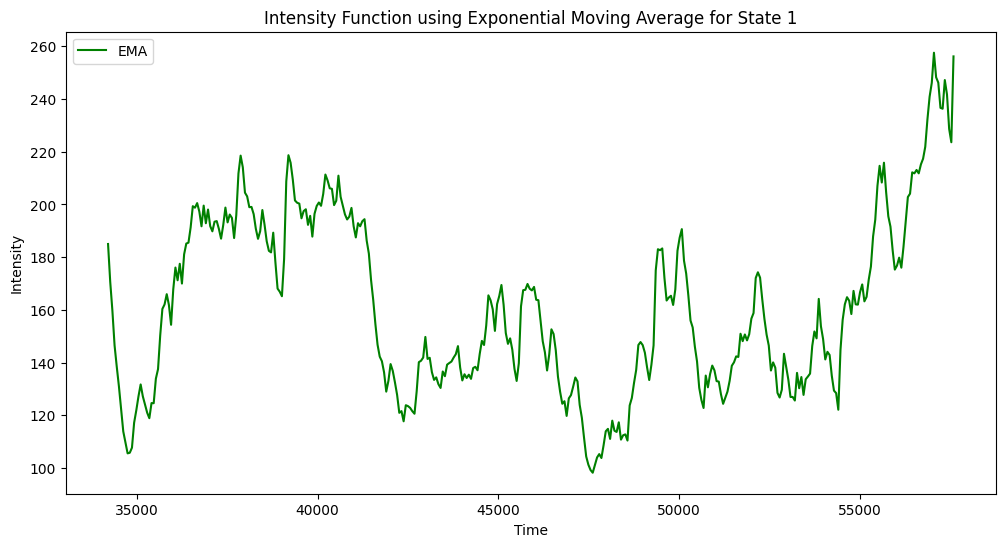

In [111]:
# Calculating EMA
# span=10
# SO to make the alpha=2/(Span+1)
alpha = 1/11  # decay factor
# bins=(57600-34200)/60=23400/60=390
event_counts, _ = np.histogram(sample_buyside_type1['Time'], bins=390, 
                               range=(sample_buyside_type1['Time'].min(), sample_buyside_type1['Time'].max()))
ema = [event_counts[0]]
for i in range(1, len(event_counts)):
    ema.append(alpha * event_counts[i] + (1 - alpha) * ema[-1])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(sample_buyside_type1['Time'].min(), sample_buyside_type1['Time'].max(), len(ema)), ema, label='EMA', color='green')
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('Intensity Function using Exponential Moving Average for State 1')
plt.legend()
plt.show()

## 95% Confidence Intervel Building
To add the 95% confidence band for the EMA intensity, we'll calculate the standard error of the EMA and then use it to compute the upper and lower bounds for the 95% confidence interval.

Given that the EMA is based on a Poisson process, the variance of the count in each bin is equal to the mean count itself. The standard error is the square root of this variance divided by the square root of the number of observations. This gives us:

\[
$\text{Standard Error (SE)}$ = $\frac{\sqrt{\text{EMA value at time } t}}{\sqrt{n}}$
\]

Where \( $n$ \) is the number of events.

Using this standard error, the 95% confidence interval for the EMA at time \( $t$ \) is:

\[
$\text{Upper Bound} = \text{EMA value at time } t + 1.96 \times \text{SE}$
\]
\[
$\text{Lower Bound} = \text{EMA value at time } t - 1.96 \times \text{SE}$
\]


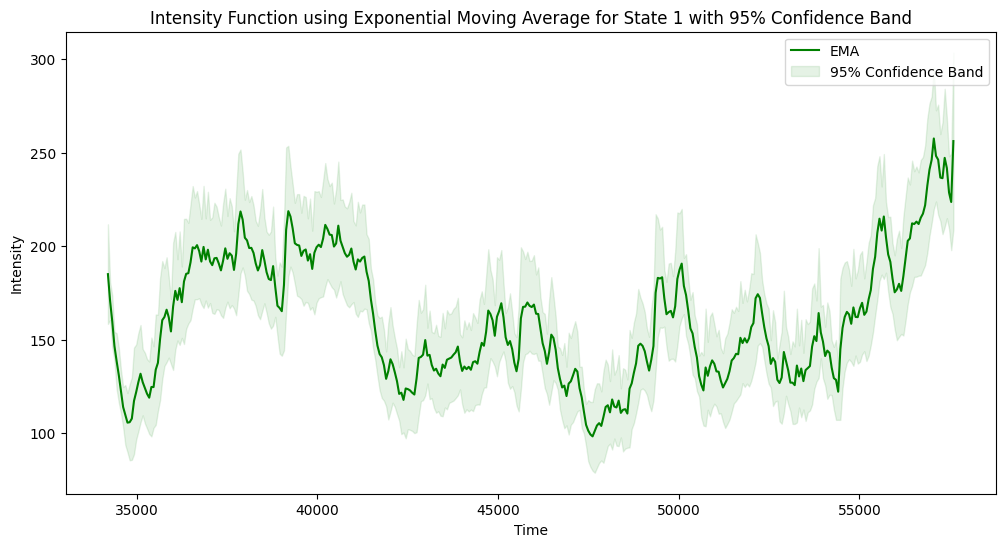

In [112]:
# Compute 95% confidence bands for EMA intensity
def compute_ema_confidence_bands(ema, counts):
    se = np.sqrt(counts)
    upper_bound = ema + 1.96 * se
    lower_bound = ema - 1.96 * se
    return lower_bound, upper_bound

# Calculating EMA using the provided code
alpha = 1/11  # decay factor
event_counts, _ = np.histogram(sample_buyside_type1['Time'], bins=390, 
                               range=(sample_buyside_type1['Time'].min(), sample_buyside_type1['Time'].max()))
ema = [event_counts[0]]
for i in range(1, len(event_counts)):
    ema.append(alpha * event_counts[i] + (1 - alpha) * ema[-1])

# Compute confidence bands
lower_bound, upper_bound = compute_ema_confidence_bands(ema, event_counts)

# Plot
plt.figure(figsize=(12, 6))
time_range = np.linspace(sample_buyside_type1['Time'].min(), sample_buyside_type1['Time'].max(), len(ema))
plt.plot(time_range, ema, label='EMA', color='green')
plt.fill_between(time_range, lower_bound, upper_bound, color='green', alpha=0.1, label="95% Confidence Band")
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('Intensity Function using Exponential Moving Average for State 1 with 95% Confidence Band')
plt.legend()
plt.show()


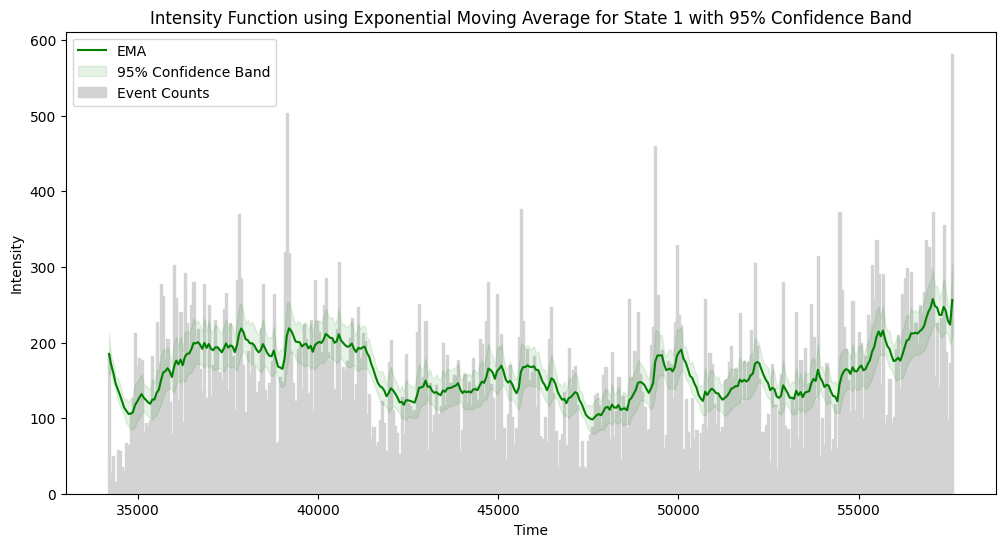

In [114]:
# Plot
plt.figure(figsize=(12, 6))
time_range = np.linspace(sample_buyside_type1['Time'].min(), sample_buyside_type1['Time'].max(), len(ema))

# Plotting raw event counts (time series of State 1)
plt.bar(time_range, event_counts, width=(time_range[1]-time_range[0]), color='lightgray', label='Event Counts', edgecolor='lightgray')

# Plotting EMA
plt.plot(time_range, ema, label='EMA', color='green')
plt.fill_between(time_range, lower_bound, upper_bound, color='green', alpha=0.1, label="95% Confidence Band")

plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('Intensity Function using Exponential Moving Average for State 1 with 95% Confidence Band')
plt.legend()
plt.show()


## Performance Assessment:

use Q-Q plots of residuals to assess the performance of your non-parametric intensity estimator based on Kernel Density Estimation (KDE). 

Given the context you provided earlier about financial data and KDEs with different kernels, using Q-Q plots can help you visually and quantitatively evaluate how well the KDE is capturing the underlying intensity of the point process.

Here's a generalized approach to use Q-Q plots in your case:

1. **Compute Residuals**:
    - For each time interval \([t_n, t_{n+1}]\), estimate the intensity of the point process using KDE. Let's denote this as \(\lambda(t_n; t_{n+1})\).
    - Count the number of events (e.g., trades, orders) in the interval, \(N(t_n; t_{n+1})\).
    - Define the residual for the interval, \(R(t_n; t_{n+1})\), similarly to the provided formula, which is the difference between the observed number of events and the expected number, normalized by the square root of the expected number.

2. **Simulate Residuals**:
    - Use Monte Carlo simulation to generate several simulated time series based on the KDE intensity.
    - For each simulated series, compute the model-based residuals. You'll end up with a distribution of residuals for each time interval.

3. **Construct Q-Q Plot**:
    - For each time interval, plot the quantile of the observed residual against the quantile of the simulated residuals. If the KDE is a good representation of the underlying intensity, the points should roughly lie on the line \(y=x\).

4. **Interpret the Q-Q Plot**:
    - A Q-Q plot that closely follows the line \(y=x\) indicates a good model fit. Deviations from this line suggest discrepancies between the model and the data.

Given that you have different KDEs (based on different kernels), you can construct separate Q-Q plots for each. Comparing these plots can provide insights into which kernel might be the best fit for your data.

In summary, Q-Q plots of residuals are a valuable diagnostic tool in assessing the fit of point process models, including those based on KDE. Using them in your case can provide a clearer understanding of the performance of your non-parametric intensity estimators.

## Q-Q plot of Gaussian Kernel Simulation = 100

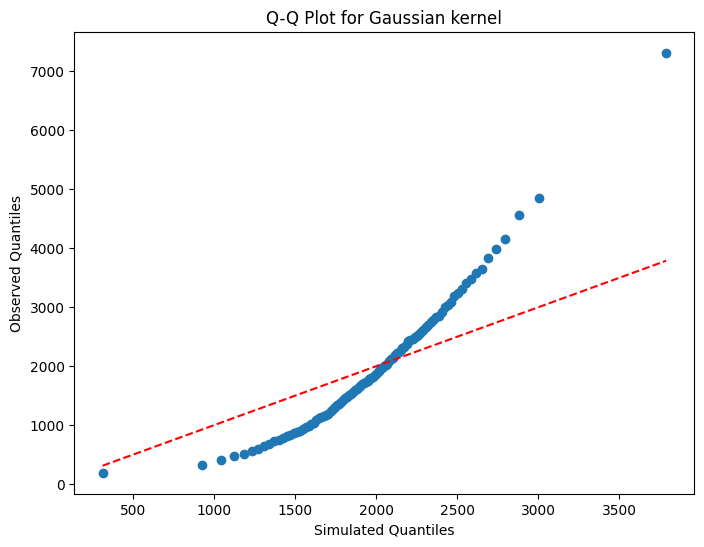

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Define a function to compute residuals based on KDE intensity
def compute_residuals(events, time_points, kde):
    log_dens = kde.score_samples(time_points)
    intensity = np.exp(log_dens)
    
    bin_edges = np.squeeze(time_points)
    bin_width = bin_edges[1] - bin_edges[0]
    
    observed_counts, _ = np.histogram(events, bins=bin_edges)
    expected_counts = intensity[:-1] * bin_width
    
    residuals = (observed_counts - expected_counts) / np.sqrt(expected_counts)
    return residuals

# Define a function to simulate residuals
def simulate_residuals(kde, time_points, n_simulations=100):
    simulated_residuals = []
    
    for _ in range(n_simulations):
        simulated_events = kde.sample(n_samples=len(events))
        residuals = compute_residuals(simulated_events, time_points, kde)
        simulated_residuals.append(residuals)
    
    return np.array(simulated_residuals)

# Fit KDE with Gaussian kernel
kde_gaussian = KernelDensity(kernel='gaussian', bandwidth=60).fit(events)

# Compute observed residuals for Gaussian kernel
observed_residuals = compute_residuals(events, time_points, kde_gaussian)

# Simulate residuals for Gaussian kernel
simulated_residuals = simulate_residuals(kde_gaussian, time_points)

# Compute quantiles for Q-Q plot
q_observed = np.percentile(observed_residuals, np.linspace(0, 100, 100))
q_simulated = np.percentile(simulated_residuals, np.linspace(0, 100, 100))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(q_simulated, q_observed, 'o')
plt.plot([min(q_simulated), max(q_simulated)], [min(q_simulated), max(q_simulated)], 'r--')
plt.title('Q-Q Plot for Gaussian kernel')
plt.xlabel('Simulated Quantiles')
plt.ylabel('Observed Quantiles')
plt.show()


## Q-Q Plot of Gaussian and Tophat Kernels while 'epanechnikov', 'exponential', 'cosine' didn't exist in the library. So discard them

and 1000 simulation takes ages so I only use the 100 simulation which is also adaptive

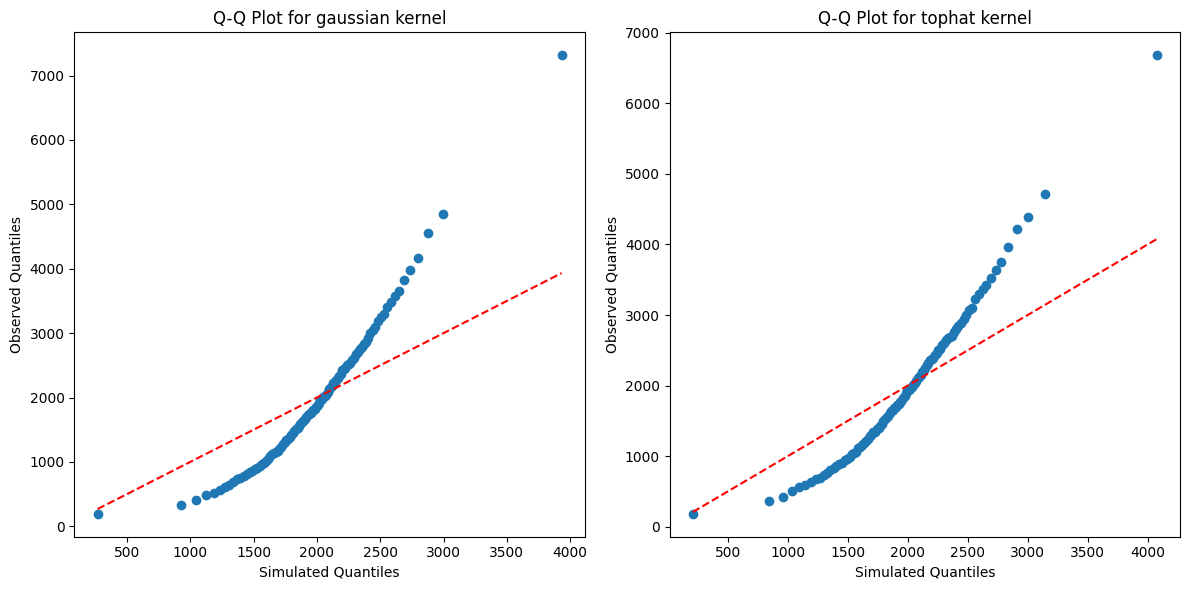

In [ ]:
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import numpy as np

# Define a function to compute residuals based on KDE intensity
def compute_residuals(events, time_points, kde):
    # Estimate intensity using KDE
    log_dens = kde.score_samples(time_points)
    intensity = np.exp(log_dens)
    
    # Define bin edges for histogram
    bin_edges = np.squeeze(time_points)
    bin_width = bin_edges[1] - bin_edges[0]
    
    # Compute observed number of events in each interval
    observed_counts, _ = np.histogram(events, bins=bin_edges)
    
    # Compute expected number of events in each interval
    expected_counts = intensity[:-1] * bin_width  # Exclude the last point
    
    # Compute residuals
    residuals = (observed_counts - expected_counts) / np.sqrt(expected_counts)
    
    return residuals

# Define a function to simulate residuals
def simulate_residuals(kde, time_points, n_simulations=100):
    simulated_residuals = []
    
    for _ in range(n_simulations):
        # Simulate a point process based on the KDE intensity
        simulated_events = kde.sample(n_samples=len(events))
        
        # Compute residuals for the simulated events
        residuals = compute_residuals(simulated_events, time_points, kde)
        simulated_residuals.append(residuals)
    
    return np.array(simulated_residuals)

# Define kernels
kernels = ['gaussian', 'tophat']

# Plotting
plt.figure(figsize=(12, 6))

for i, kernel in enumerate(kernels):
    # Fit KDE
    kde = KernelDensity(kernel=kernel, bandwidth=60).fit(events)
    
    # Compute observed residuals
    observed_residuals = compute_residuals(events, time_points, kde)
    
    # Simulate residuals
    simulated_residuals = simulate_residuals(kde, time_points)
    
    # Compute quantiles for Q-Q plot
    q_observed = np.percentile(observed_residuals, np.linspace(0, 100, 100))
    q_simulated = np.percentile(simulated_residuals, np.linspace(0, 100, 100))
    
    plt.subplot(1, 2, i+1)
    plt.plot(q_simulated, q_observed, 'o')
    plt.plot([min(q_simulated), max(q_simulated)], [min(q_simulated), max(q_simulated)], 'r--')
    plt.title(f'Q-Q Plot for {kernel} kernel')
    plt.xlabel('Simulated Quantiles')
    plt.ylabel('Observed Quantiles')

plt.tight_layout()
plt.show()


## Q-Q plot of EMA

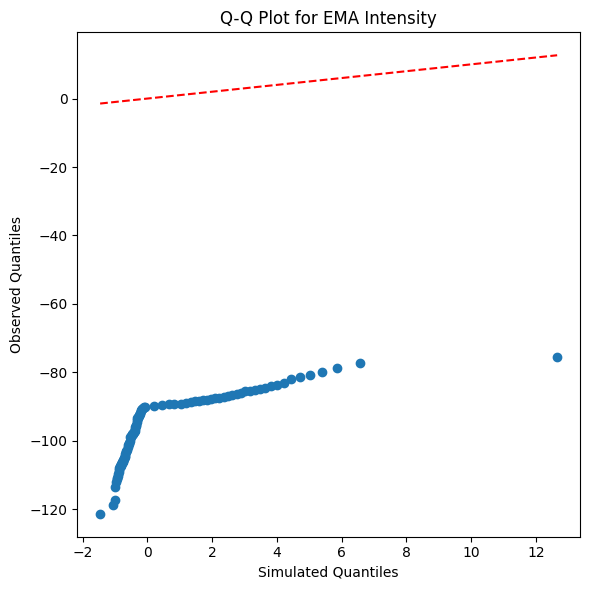

In [ ]:
# Compute EMA-based intensity using the provided code
def compute_ema_intensity(events):
    alpha = 1/11  # decay factor
    event_counts, _ = np.histogram(events, bins=390, 
                                   range=(events.min(), events.max()))
    ema = [event_counts[0]]
    for i in range(1, len(event_counts)):
        ema.append(alpha * event_counts[i] + (1 - alpha) * ema[-1])
    return ema

# Compute residuals based on EMA intensity
def compute_ema_residuals(events, time_points):
    # Estimate intensity using EMA
    intensity = np.array(compute_ema_intensity(events))  # Convert intensity to numpy array
    
    # Define bin edges for histogram
    bin_edges = np.linspace(events.min(), events.max(), 391)  # 390 bins => 391 bin edges
    bin_width = bin_edges[1] - bin_edges[0]
    
    # Compute observed number of events in each interval
    observed_counts, _ = np.histogram(events, bins=bin_edges[:-1])  # Exclude the last point for bin edges
    
    # Compute expected number of events in each interval
    expected_counts = intensity[:-1] * bin_width  # Exclude the last point
    
    # Compute residuals
    residuals = (observed_counts - expected_counts) / np.sqrt(expected_counts)
    
    return residuals

# Simulate residuals using EMA intensity
def simulate_ema_residuals(events, time_points, n_simulations=1000):
    simulated_residuals = []
    
    for _ in range(n_simulations):
        # Simulate a point process based on the EMA intensity
        intensity = compute_ema_intensity(events)
        simulated_events = np.random.poisson(intensity[:-1])
        
        # Compute residuals for the simulated events
        residuals = compute_ema_residuals(simulated_events, time_points)
        simulated_residuals.append(residuals)
    
    return np.array(simulated_residuals)

# Compute observed residuals
observed_residuals = compute_ema_residuals(state1_times, time_points)

# Simulate residuals
simulated_residuals = simulate_ema_residuals(state1_times, time_points)

# Compute quantiles for Q-Q plot
q_observed = np.percentile(observed_residuals, np.linspace(0, 100, 100))
q_simulated = np.percentile(simulated_residuals, np.linspace(0, 100, 100))

# Plotting
plt.figure(figsize=(6, 6))
plt.plot(q_simulated, q_observed, 'o')
plt.plot([min(q_simulated), max(q_simulated)], [min(q_simulated), max(q_simulated)], 'r--')
plt.title('Q-Q Plot for EMA Intensity')
plt.xlabel('Simulated Quantiles')
plt.ylabel('Observed Quantiles')
plt.tight_layout()
plt.show()


# Hawkes Process

The Hawkes process is a self-exciting point process, which means that the occurrence of an event increases the probability of future events occurring in a short period of time afterward. It's a natural fit for modeling phenomena where events tend to cluster or "cause" subsequent events, such as earthquakes (aftershocks) or spikes in social media activity.

Here's a brief overview of the Hawkes process and how to use it:

## Basics of the Hawkes Process:

1. **Intensity Function**:
   The Hawkes process is characterized by a conditional intensity function \( $\lambda(t)$ \) that depends on the history of the process up to time \( t \). It is usually given by:

   \[
   $\lambda(t)$ = $\mu$ + $\sum_{t_i < t}$ $\alpha$ $\exp(-\beta (t - t_i))$
   \]

   where:
   - \( $\mu$ \) is the base intensity.
   - \( $t_i$ \) are the times of previous events.
   - \( $\alpha$ \) and \( $\beta$ \) are parameters that control the shape and scale of the "exciting" effect of previous events.

2. **Clusters of Events**:
   The term involving the summation in the intensity function means that each past event increases the intensity for a short time afterward. This leads to clustering of events.

3. **Parameter Estimation**:
   The parameters \( $\mu$ \), \( $\alpha$ \), and \( $\beta$ \) can be estimated from data using Maximum Likelihood Estimation (MLE) or other techniques.

## How to use the Hawkes Process:

1. **Data Preparation**:
   - Start by collecting timestamped events. This could be times of earthquakes, times of tweets, trade timestamps, etc.
   
2. **Modeling**:
   - Define the conditional intensity function as mentioned above.
   - Estimate the parameters of the model using historical data.
   
3. **Validation**:
   - Use techniques like residual analysis to validate the fit of the model. For a well-fitted Hawkes process, the "rescaled" times between events (residuals) should be approximately exponentially distributed.
   
4. **Simulation**:
   - Once the parameters are estimated, you can simulate new event sequences using the Hawkes model. This is useful for forecasting or understanding potential future behavior.
   
5. **Extensions**:
   - Multi-dimensional Hawkes processes allow for modeling interactions between multiple types of events.
   - You can also use more complex kernels (rather than just the exponential as shown above) to model the excitation effect.

## Software:
Several software packages and libraries allow for the estimation and simulation of Hawkes processes. For example, in Python, the `tick` library is a useful tool for working with Hawkes processes.


The Hawkes process is a type of self-exciting point process that is often used in various applications, notably in finance and seismology. It's characterized by the fact that an event can increase the likelihood of subsequent events occurring in the near future.

1. **Univariate Hawkes Process**:
    - This refers to a Hawkes process that monitors a single type of event over time. 
    - The intensity function (or conditional intensity function) of the process, which describes the rate at which events are expected to occur, depends on the entire history of the process up to the current time. This means that the occurrence of an event can increase the expected rate of future events for some duration.
    - Mathematically, the intensity function for a univariate Hawkes process can be expressed as:
      \[
      $\lambda(t) = \mu + \sum_{t_i < t} \alpha e^{-\beta (t - t_i)}$
      \]
      where:
      - \( $\mu$ \) is the baseline intensity.
      - \( $\alpha$ \) is the jump size in intensity after each event.
      - \( $\beta$ \) determines the rate at which the intensity decays back to the baseline after each event.
      - The sum is over all events \( $t_i$ \) that have occurred before time \( $t$ \).

2. **Multivariate Hawkes Process**:
    - In the multivariate case, there are multiple types of events, and each type can influence not only its own future occurrences but also the occurrences of other types of events.
    - This is useful in modeling systems where different types of events can influence each other. For instance, in finance, a large buy order might influence future sell orders, and vice versa.
    - Mathematically, the intensity function for the \($i^{th}$\) type in a multivariate Hawkes process can be expressed as:
      \[
      $\lambda_i(t) = \mu_i + \sum_{j=1}^{N} \sum_{t_{j,k} < t} \alpha_{ij} e^{-\beta_{ij} (t - t_{j,k})}$
      \]
      where:
      - \($N$ \) is the total number of event types.
      - \( $\mu_i$ \) is the baseline intensity for the \($i^{th}$\) type.
      - \( $\alpha_{ij}$ \) represents the influence of an event of type \( $j$ \) on the future rate of events of type \( $i$ \).
      - \( $\beta_{ij}$ \) determines the rate at which this influence decays.
      - The outer sum is over all event types, and the inner sum is over all events of type \( $j$ \) that have occurred before time \( $t$ \).

In essence, the univariate Hawkes process models the self-excitement of a single type of event, while the multivariate Hawkes process models the mutual excitement between multiple types of events.

States Within Buy/Sell Side: Each state on the buy side can have a self-exciting property and can influence the occurrence rate of events in other states on the buy side. The same applies to the sell side. This can be captured using a multivariate Hawkes process.

Interaction Between Buy and Sell Sides: Events on the buy side can influence the occurrence rate of events on the sell side, and vice versa. For instance, a large buying event (state 3 on buy side) might trigger selling reactions (states on the sell side). This cross-influence can only be captured using a multivariate Hawkes process.

Model Complexity: A multivariate Hawkes process will require estimating more parameters compared to a univariate process. However, given the richer structure of your data, this complexity might be warranted to capture the intricate dynamics between different states and sides.

In summary, for your case where there are interactions both within and across the buy and sell sides, a multivariate Hawkes process is more suitable. It will allow you to capture both the self-excitement and mutual excitement properties of the different states and sides in your limit order book data.

# 要说明自己的模型要简单些，就把beta这个decay factor只和m有关，不是2-dimensional了，simpler the model

# MLE estimate

Of course! Here's the revised Markdown text with `$$` around each equation for proper rendering:

---

Certainly! The Hawkes process is a self-exciting point process with a conditional intensity function defined as:

$$
\lambda(t) = \mu + \sum_{t_i < t} \alpha \exp(-\beta (t - t_i))
$$

Where:
- \( \mu \) is the baseline intensity.
- \( \alpha \) represents the jump in intensity after an event.
- \( \beta \) determines the rate of exponential decay of the intensity after an event.
- The sum is over all events \( t_i \) that occurred before time \( t \).

For a multivariate Hawkes process with \( d \) dimensions, the intensity function for dimension \( m \) is given by:

$$
\lambda_m(t) = \mu_m + \sum_{n=1}^{d} \sum_{t_i^n < t} \alpha_{mn} \exp(-\beta_m (t - t_i^n))
$$

Where:
- \( t_i^n \) denotes the times of events in dimension \( n \).
- \( \alpha_{mn} \) is the excitation parameter from dimension \( n \) to \( m \).
- \( \beta_m \) is the decaying factor for dimension \( m \).

Given this, the log-likelihood for a multivariate Hawkes process with observed events up to time \( T \) is:

$$
\log L(\Theta) = \sum_{m=1}^{d} \left( \sum_{t_i^m} \log \lambda_m(t_i^m) - \int_{0}^{T} \lambda_m(s) ds \right)
$$

Where:
- \( \Theta \) represents the set of all parameters: \( \{ \mu_1, ..., \mu_d, \alpha_{11}, \alpha_{12}, ..., \alpha_{dd}, \beta_1, ..., \beta_d \} \).

The integral term can be computed as:

$$
\int_{0}^{T} \lambda_m(s) ds = \mu_m T + \sum_{n=1}^{d} \sum_{t_i^n < T} \left( \frac{\alpha_{mn}}{\beta_m} \right) \left( 1 - \exp(-\beta_m (T - t_i^n)) \right)
$$

Given the definition above, the objective function to be minimized (the negative log-likelihood) is:

$$
f(\Theta) = -\log L(\Theta)
$$


For simplicity, let's begin with the univariate Hawkes process, and then extend our understanding to the multivariate case.

### 1. Univariate Hawkes Process:

The conditional intensity function of a univariate Hawkes process is given by:

\[
$\lambda(t) = \mu + \sum_{t_i < t} \alpha \exp(-\beta (t - t_i))$
\]

Where:
- \( $\mu$ \) is the baseline intensity.
- \( $\alpha$ \) is the jump in intensity after an event.
- \( $\beta$ \) determines the rate of decay of intensity.
- The sum is over all events \( $t_i$ \) that occurred before time \( $t$ \).

The probability of observing an event at time \( $t$ \) and no other events in the infinitesimally small interval \($[t, t+dt)$\) is:

\[
$P(t)dt = \lambda(t) e^{-\int_{0}^{t} \lambda(s) ds} dt$
\]

Taking the log of both sides:

\[
$\log(P(t)dt) = \log(\lambda(t)) - \int_{0}^{t} \lambda(s) ds + \log(dt)$
\]

If you integrate over the entire observation window \($[0, T]$\), you get the log-likelihood of the observed sequence of events:

\[
$\log L = \sum_{i} \log(\lambda(t_i)) - \int_{0}^{T} \lambda(s) ds$
\]

To compute the expected number of events up to time \( T \) for a given dimension \( m \):

\[
\begin{align*}
\int_{0}^{T} \lambda_m(s) ds
\end{align*}
\]

Given that the intensity function for dimension \( m \) in a multivariate Hawkes process is:

\[
\begin{align*}
\lambda_m(t) = \mu_m + \sum_{n=1}^{d} \sum_{t_i^n < t} \alpha_{mn} \exp(-\beta_{mn} (t - t_i^n))
\end{align*}
\]

To compute the integral, we'll break it down into two parts:

### 1. Baseline Intensity:

This is straightforward:

\[
\begin{align*}
\int_{0}^{T} \mu_m ds = \mu_m \int_{0}^{T} ds = \mu_m T
\end{align*}
\]

### 2. Influence of Past Events:

This is the trickier part. Let's compute the expected number of events due to past events of dimension \( n \) on dimension \( m \):

\[
\begin{align*}
\int_{0}^{T} \sum_{t_i^n < t} \alpha_{mn} \exp(-\beta_{m} (t - t_i^n)) dt
\end{align*}
\]

For a fixed event time \( t_i^n \) of dimension \( n \):

\[
\begin{align*}
\int_{0}^{T} \alpha_{mn} \exp(-\beta_{m} (t - t_i^n)) dt
\end{align*}
\]

If we break down the integral into two parts, from \( 0 \) to \( t_i^n \) and from \( t_i^n \) to \( T \):

\[
\begin{align*}
\int_{t_i^n}^{T} \alpha_{mn} \exp(-\beta_{m} (t - t_i^n)) dt
\end{align*}
\]

This is an exponential function integrated over \( t \). Solving this:

\[
\begin{align*}
= \alpha_{mn} \left[ -\frac{1}{\beta_{m}} \exp(-\beta_{m} (t - t_i^n)) \right]_{t_i^n}^{T}
\end{align*}
\]

\[
\begin{align*}
= \alpha_{mn} \left( -\frac{1}{\beta_{m}} \exp(-\beta_{m} (T - t_i^n)) + \frac{1}{\beta_{m}} \right)
\end{align*}
\]

Simplifying:

\[
\begin{align*}
= \frac{\alpha_{mn}}{\beta_{m}} \left( 1 - \exp(-\beta_{m} (T - t_i^n)) \right)
\end{align*}
\]

This is for a single event \( t_i^n \) of dimension \( n \). To account for all past events of dimension \( n \) that occurred before \( T \), we sum over all such \( t_i^n \):

\[
\begin{align*}
\sum_{t_i^n < T} \frac{\alpha_{mn}}{\beta_{m}} \left( 1 - \exp(-\beta_{m} (T - t_i^n)) \right)
\end{align*}
\]

### Combining Both Parts:

Combining the baseline intensity and the influence of past events, we get:

\[
\begin{align*}
\int_{0}^{T} \lambda_m(s) ds = \mu_m T + \sum_{n=1}^{d} \sum_{t_i^n < T} \frac{\alpha_{mn}}{\beta_{m}} \left( 1 - \exp(-\beta_{m} (T - t_i^n)) \right)
\end{align*}
\]

This completes our step-by-step derivation of the integral term for the multivariate Hawkes process.

The initial value or initial guess is important for optimization algorithms that search for a local minimum (or maximum) of a function. Here's why:

1. **Convergence**: The initial value provides a starting point for the optimization algorithm. From this starting point, the algorithm iteratively refines its estimate to find the minimum of the function. A good initial guess can help the algorithm converge faster.

2. **Local vs Global Minimum**: Most optimization algorithms, including the Nelder-Mead method, are designed to find a local minimum. If the function has multiple local minima, the algorithm's final result can depend on the initial guess. An algorithm might converge to different local minima depending on where it starts.

3. **Nature of the Algorithm**: The Nelder-Mead method, which you're using, is a derivative-free optimization algorithm. This means that it doesn't require knowledge of the function's gradient. However, as a trade-off, it's more sensitive to the initial guess compared to some gradient-based methods.

4. **Speed**: While some optimization algorithms can eventually converge to a solution even with a poor initial guess, they might take a very long time or many iterations to do so. A good initial guess can significantly speed up the process.

5. **Preventing Non-convergence**: In some cases, if the initial guess is too far from any reasonable solution, the algorithm might not converge at all. It might get stuck or oscillate without finding a good solution.

For the Hawkes process parameter estimation problem, the landscape of the negative log-likelihood function can be complex with potentially multiple local minima. Hence, the choice of initial guess is crucial.

If you have any prior knowledge or intuition about the system or the parameters, it's beneficial to use that information to inform the initial guess. Otherwise, random initialization (as you've done) is a common approach, with the understanding that the optimization might need to be run multiple times with different initializations to ensure a good solution.

Since it takes a really long time to process, we now only consider the 4 states which are state 1, 3, 4, 6.\
It is because State 1 is highly correlated to state 5 while state 2 is highly correlated to state 4.\
So we retain the submussion part of both buy and sell side which are state 1 and state 4 while eliminate the state 2 and 5 since they represent the same property of 3 parameters $\alpha$, $\beta$ and $\mu$\
# So for the prediction part, when state 1 arrived, it will always accompanied with the arrival of state 5, and when state 4 arrived, it will always accompanied with the arrival of state 2.

# Find the beta (Decay parameter) first

# The Method of Moments (MoM) 
involves equating sample moments (from the data) to theoretical moments (from the model) to solve for the parameters. For a Hawkes process, we can use the time-decay property to identify a suitable moment.
CCF

Absolutely, I'll provide a step-by-step textual explanation of the procedure to estimate the decay parameter, \( \beta \), in the context of a Hawkes process using the Method of Moments and Cross-Correlation Functions (CCF):

### Method of Moments and Cross-Correlation Function (CCF) for Estimating \( \beta \) in a Hawkes Process:

1. **Objective**:
   The goal is to estimate the decay parameter \( \beta \) for a multivariate Hawkes process using empirical data. The parameter \( \beta \) controls the rate at which the excitation caused by past events decays over time.

2. **Data Preparation**:
   - Organize your event timestamps into different states or dimensions.
   - Ensure data is well-formed, with no missing values.

3. **Compute the Cross-Correlation Function (CCF)**:
   - For each pair of states (e.g., state1 and state3), compute the empirical CCF. This function measures the correlation between two time series as a function of the time lag applied to one of them.
   - The CCF captures how events in one state are correlated with events in another state at different time lags.

4. **Method of Moments**:
   - The idea behind the method of moments is to match the moments from the empirical data (in this case, the CCF) to the moments from the theoretical model (the Hawkes process). By equating the empirical moments with the theoretical moments, we can solve for the model parameters.
   - In our case, we're particularly interested in how the CCF decays over time, as this decay is controlled by the \( \beta \) parameter.

5. **Objective Function**:
   - Define an objective function that measures the difference between the empirical CCF and the theoretical CCF from the Hawkes process for a given \( \beta \) value. 
   - Ideally, the theoretical CCF should be based on the mathematical formulation of the Hawkes process. However, obtaining an exact theoretical CCF might be challenging, so we use the empirical CCF's shape to guide our estimation. The aim is to find the \( \beta \) value that makes the theoretical CCF fit the empirical CCF as closely as possible.

6. **Optimization**:
   - Use an optimization algorithm to minimize the objective function over possible \( \beta \) values. This will give the \( \beta \) value that makes the theoretical CCF best match the empirical CCF.
   - Different initial guesses for \( \beta \) can be tried to ensure robustness, as optimization in non-convex landscapes can converge to local minima.

7. **Results**:
   - The estimated \( \beta \) values represent how quickly the influence of past events decays over time in each state of the Hawkes process.
   - Remember that these are estimates. The true underlying \( \beta \) might be different, especially if the data doesn't perfectly follow a Hawkes process or if there are other unaccounted factors influencing the events.

8. **Validation**:
   - It's a good idea to validate the estimated \( \beta \) values if possible. This could involve simulating a Hawkes process with the estimated parameters and checking if it produces similar patterns to the empirical data.
   - Another approach is to use goodness-of-fit tests to compare the empirical data to the data generated by the model with the estimated parameters.

9. **Considerations**:
   - The quality of the \( \beta \) estimates depends on the quality and quantity of the empirical data.
   - It's also important to note that the Method of Moments approach provides a way to estimate parameters but doesn't guarantee the best fit in all situations. Depending on the complexity of the data, other estimation methods might be more appropriate.

This procedure provides a systematic way to estimate the decay parameter \( \beta \) for a Hawkes process using empirical data. By leveraging the information in the CCF, it captures the temporal dependencies between events in different states and uses this information to infer the underlying parameters of the process.

In [26]:
from statsmodels.tsa.stattools import ccf
from scipy.optimize import minimize

# Your state data
state1_times = sample_buyside_type1['Time'].values
state3_times = sample_buyside_type45['Time'].values
state4_times = sample_sellside_type1['Time'].values
state6_times = sample_sellside_type45['Time'].values

states = [state1_times, state3_times, state4_times, state6_times]

def objective(beta, empirical_ccf, lags):
    """Objective function to minimize: squared difference between empirical CCF and exponential decay."""
    model_ccf = np.exp(-beta * lags)
    return np.sum((empirical_ccf - model_ccf) ** 2)

def pad_to_same_length(x, y):
    """Zero-pad the shorter series to match the length of the longer one."""
    diff = len(x) - len(y)
    if diff > 0:
        y = np.pad(y, (0, diff), 'constant')
    elif diff < 0:
        x = np.pad(x, (0, -diff), 'constant')
    return x, y

beta_values = {i: [] for i in range(len(states))}  # Store beta values for each state

for i in range(len(states)):
    for j in range(i+1, len(states)):
        x, y = pad_to_same_length(states[i], states[j])
        empirical_ccf = ccf(x, y, adjusted=True)
        
        result = minimize(objective, 1.0, args=(empirical_ccf, np.arange(len(empirical_ccf))))
        
        # Store the beta value for both states involved in the CCF
        beta_values[i].append(result.x[0])
        beta_values[j].append(result.x[0])

# Average the beta values for each state
averaged_betas = [np.mean(beta_values[i]) for i in range(len(states))]

print("Averaged betas:", averaged_betas)


Averaged betas: [5.307404328466423, 6.34837726012841, 7.061907680387299, 4.964468142785705]


Absolutely! For gradient-based optimization methods (like gradient descent or quasi-Newton methods) to work, we first need to derive the gradient of the objective function (in this case, the negative log-likelihood \( f(\Theta) \)) with respect to the parameters.

Given the negative log-likelihood

\[
$f(\Theta) = -\log L(\Theta)$
\]

we need to compute the partial derivatives of \( f(\Theta) \) with respect to each parameter in \( $\Theta$ \) (i.e., \( \mu_1, ..., \mu_d, \alpha_{11}, \alpha_{12}, ..., \alpha_{dd}, \beta_1, ..., \beta_d \)).

Let's begin with the baseline intensity \( $\mu_m$ \) for a given dimension \( $m$ \). We have:

\[
$\frac{\partial f(\Theta)}{\partial \mu_m} = -\frac{\partial}{\partial \mu_m} \left( \sum_{m=1}^{d} \left( \sum_{t_i^m} \log \lambda_m(t_i^m) - \int_{0}^{T} \lambda_m(s) ds \right) \right)$
\]

To simplify, let's break this into two parts:

1. Derivative with respect to the summation over \( $t_i^m$ \)
2. Derivative with respect to the integral term.

I'll compute the gradient for \( $\mu_m$ \) first. After that, we can similarly compute the gradients for \( \alpha_{mn} \) and \( \beta_m \).

The partial derivative of the negative log-likelihood \( $f(\Theta)$ \) with respect to \( $\mu_m$ \) is given by:

I apologize for the oversight. The error you're seeing is due to the use of double subscripts in LaTeX notation, which isn't supported by some renderers like KaTeX.

Let's correct the notation to avoid this issue.

For the gradient with respect to \( $\mu_m$ \):

\[
$\frac{\partial f(\Theta)}{\partial \mu_m} = T - \frac{1}{\alpha_{mn}\sum_{t_i < t} \exp(-\beta_m (t - t_i)) + \mu_m}$
\]

And for the gradient with respect to \( $\alpha_{mn}$ \):

\[
$\frac{\partial f(\Theta)}{\partial \alpha_{mn}} = T \sum_{t_i < t} \exp(-\beta_m (t - t_i)) - \frac{\sum_{t_i < t} \exp(-\beta_m (t - t_i))}{\alpha_{mn}\sum_{t_i < t} \exp(-\beta_m (t - t_i)) + \mu_m}$
\]

Here, \( t_i \) is understood to be the time of an event in the relevant dimension. This notation should be clearer and free of double subscript issues.

In [97]:
import numpy as np
from scipy.optimize import minimize
from joblib import Parallel, delayed

def intensity(t, dim_m, all_event_times, mu, alpha, beta):
    """Calculate the intensity function for dimension m at time t."""
    lambda_m = mu
    for n in range(4):  # Reduced to 4 dimensions
        for event_time in all_event_times[n]:
            if event_time < t:
                lambda_m += alpha[n] * np.exp(-beta * (t - event_time))
    return lambda_m

def integral_intensity(T, dim_m, all_event_times, mu, alpha, beta):
    """Compute the integral of the intensity function from 0 to T for dimension m."""
    integral = mu * T
    for n in range(4):
        for event_time in all_event_times[n]:
            if event_time < T:
                integral += (alpha[n] / beta) * (1 - np.exp(-beta * (T - event_time)))
    return integral

def gradient_NLL(params, all_event_times, T, beta):
    """Compute the gradient of the negative log-likelihood for a given dimension."""
    mu = params[:4]
    alpha = params[4:].reshape(4, 4)

    grad_mu = 0
    grad_alpha = np.zeros((4, 4))

    for m in range(4):  # For each dimension
        grad_mu += T - (len(all_event_times[m]) / (mu[m] + sum([alpha[m, n] * sum(np.exp(-beta * (event_time - all_event_times[n][all_event_times[n] < event_time])) for event_time in all_event_times[m]) for n in range(4)])))
        
        for n in range(4):
            summed_exponential = sum(np.exp(-beta * (event_time - all_event_times[n][all_event_times[n] < event_time])) for event_time in all_event_times[m])
            grad_alpha[m, n] = T * summed_exponential - summed_exponential / (alpha[m, n] * summed_exponential + mu[m])

    gradient = np.concatenate((grad_mu, grad_alpha.flatten()))
    return gradient


def objective_based_on_gradient(params, all_event_times, T, beta_m):
    """Objective function that returns the gradient for optimization."""
    gradient = gradient_NLL(params, all_event_times, T, beta_m)
    return np.linalg.norm(gradient)  # Return the magnitude of the gradient


def optimize_for_dimension(m, all_event_times, T, averaged_betas, initial_guess):
    beta = averaged_betas[m]
    
    # Minimization using L-BFGS-B for dimension m
    res = minimize(objective_based_on_gradient, initial_guess, args=(all_event_times, T/100, beta), method='Nelder-Mead', bounds=all_bounds, options={'disp': True,'maxiter': 10})
    return res.x  # Return the estimated parameters for dimension m



# Define bounds for each parameter
mu_bounds = (0.1, 9)  # bounds for mu
alpha_bounds = (0.1, 9)  # bounds for each alpha value

# Combine bounds for all parameters
all_bounds = [mu_bounds] + [alpha_bounds] * 4  # 1 mu and 4 alphas

# Initial Guess for a single dimension
mu_guess = 3
alpha_guess = [3, 1, 1, 1]  # Since we have 4 dimensions

# Construct initial_guess for a single dimension:
initial_guess_dim = np.array([mu_guess] + alpha_guess)

# Averaged betas
averaged_betas = [np.mean(beta_values[i]) for i in range(4)]  # Assuming you have 4 states
print("Averaged betas:", averaged_betas)


state1_times = sample_buyside_type1['Time'].values
state3_times = sample_buyside_type45['Time'].values
state4_times = sample_sellside_type1['Time'].values
state6_times = sample_sellside_type45['Time'].values
def get_fraction_of_state(state_data, fraction_number=1, total_fractions=100):

    fraction_size = len(state_data) // total_fractions
    start = (fraction_number - 1) * fraction_size
    end = fraction_number * fraction_size
    return state_data[start:end]

state1_first_fraction = get_fraction_of_state(state1_times, 2)
state3_first_fraction = get_fraction_of_state(state3_times, 2)
state4_first_fraction = get_fraction_of_state(state4_times, 2)
state6_first_fraction = get_fraction_of_state(state6_times, 2)


timestamps = [state1_first_fraction, state3_first_fraction, state4_first_fraction, state6_first_fraction]
# Calculate the difference for T

Observation_window = [34200,57600]
T = Observation_window[1] - Observation_window[0]

# Parallel optimization
results = Parallel(n_jobs=-1)(delayed(optimize_for_dimension)(m, timestamps, T/100, averaged_betas, initial_guess_dim) for m in range(4))

# Extract the results
mus = [res[0] for res in results]
alphas = [res[1:5] for res in results]

print("Estimated mus:", mus)
print("Estimated alphas:", alphas)




Averaged betas: [5.307404328466423, 6.34837726012841, 7.061907680387299, 4.964468142785705]


IndexError: invalid index to scalar variable.

In [102]:
import numpy as np
from scipy.optimize import minimize


def intensity(t, dim_m, all_event_times, mu, alpha, beta_m):
    """Calculate the intensity function for dimension m at time t."""
    lambda_m = mu[dim_m]
    for n in range(4):  # Reduced to 4 dimensions
        for event_time in all_event_times[n]:
            if event_time < t:
                lambda_m += alpha[dim_m, n] * np.exp(-beta_m[dim_m] * (t - event_time))
    return lambda_m

def integral_intensity(T, dim_m, all_event_times, mu, alpha, beta_m):
    """Compute the integral of the intensity function from 0 to T for dimension m."""
    integral = mu[dim_m] * T
    for n in range(4):
        for event_time in all_event_times[n]:
            if event_time < T:
                integral += (alpha[dim_m, n] / beta_m[dim_m]) * (1 - np.exp(-beta_m[dim_m] * (T - event_time)))
    return integral

# ... [your previous code]

def NLL(params, all_event_times, T, beta_m):
    """Negative Log-Likelihood function."""
    # Reshape parameters into mu and alpha only
    mu = params[:4]
    alpha = params[4:20].reshape(4, 4)
    
    log_likelihood = 0
    for m in range(4):  # for each dimension
        for event_time in all_event_times[m]:
            log_likelihood += np.log(intensity(event_time, m, all_event_times, mu, alpha, beta_m))
        # Move this line out of the loop over event times
        log_likelihood -= integral_intensity(T, m, all_event_times, mu, alpha, beta_m)
    
    return -log_likelihood  # Return negative log-likelihood

all_bounds = [(0.1,10)] * 20  # 1 mu and 4 alphas

# Initial Guess without beta
mu_guess = [3, 3, 3, 3]
alpha_guess = [
    [3, 1, 1, 1],
    [1, 3, 1, 1],
    [1, 1, 3, 1],
    [1, 1, 1, 3],
]

# Construct initial_guess without beta:
initial_guess = np.array(mu_guess + alpha_guess[0] + alpha_guess[1] + alpha_guess[2] + alpha_guess[3])
# Averaged betas
averaged_betas = [np.mean(beta_values[i]) for i in range(4)]  # Assuming you have 4 states
print("Averaged betas:", averaged_betas)

state1_times = sample_buyside_type1['Time'].values
state3_times = sample_buyside_type45['Time'].values
state4_times = sample_sellside_type1['Time'].values
state6_times = sample_sellside_type45['Time'].values
def get_fraction_of_state(state_data, fraction_number=1, total_fractions=100):

    fraction_size = len(state_data) // total_fractions
    start = (fraction_number - 1) * fraction_size
    end = fraction_number * fraction_size
    return state_data[start:end]

state1_first_fraction = get_fraction_of_state(state1_times, 5)
state3_first_fraction = get_fraction_of_state(state3_times, 5)
state4_first_fraction = get_fraction_of_state(state4_times, 5)
state6_first_fraction = get_fraction_of_state(state6_times, 5)


timestamps = [state1_first_fraction, state3_first_fraction, state4_first_fraction, state6_first_fraction]

Observation_window = [34200,57600]
T = Observation_window[1] - Observation_window[0]
# Now, use the minimize function:
res = minimize(NLL, initial_guess, args=(timestamps, T/100, averaged_betas), method='Nelder-Mead', bounds=all_bounds, options={'disp': True,'maxiter': 10})


# Get the estimated parameters
mle_theta = res.x

print("Estimated Parameters:", mle_theta)


Averaged betas: [5.307404328466423, 6.34837726012841, 7.061907680387299, 4.964468142785705]
Estimated Parameters: [3.0225 2.7    3.0225 3.0225 3.0225 1.0075 1.0075 1.0075 1.0075 3.0225
 1.0075 1.0075 1.0075 1.0075 3.0225 1.0075 1.0075 1.0075 1.0075 3.0225]


C:\Users\ROG\AppData\Local\Temp\ipykernel_47160\2582308826.py:79: RuntimeWarning: Maximum number of iterations has been exceeded.
  res = minimize(NLL, initial_guess, args=(timestamps, T/100, averaged_betas), method='Nelder-Mead', bounds=all_bounds, options={'disp': True,'maxiter': 10})


Takes a long time, so first, reduce dimension to 4, find the fixed value of decay parameter.\
Using montecarlo\
maxiter =50, 1/10 sample size randomly chosen initial guess, using different method like L Parallel optimization, L-BFGS-B, Powell's method. Gradient based are L-BFGS-B but I didn't solve the first dervative of each parameter. not gradient based...

Also the initial guess, why mu = 1 alpha = (3,1,1,1)\
mu is based on the rate of arrival on the time interval of the observation windows\
while alpha is the correlated intensity, like 3 in (1,1) means the state 1 happens mostly trigger next state 1 happens indeed

L-BFGS-B (not accurate) and Parallel estimation

Start from 100 fractions, which have only 234 time windows and for each state will have around 700 data so 3000 in total. Still take a really long time

The Nelder-Mead method, also known as the downhill simplex method, is a direct search method (meaning it doesn't use gradient information) for optimizing a function. One of its primary features is that it doesn't require the calculation of derivatives, which makes it suitable for optimizing "noisy" functions or functions for which derivatives are not known.

However, the Nelder-Mead method does not inherently support bounds on the variables. If you want to impose bounds on the optimization variables, the Nelder-Mead method is not the best choice. Other optimization methods, like L-BFGS-B, TNC, or SLSQP (all available in `scipy.optimize.minimize`), are designed to handle bounded variables.

If you absolutely need to use the Nelder-Mead method and have bounds, you'd need to implement a workaround. One common approach is to use a penalty function inside your objective function, which adds a large penalty when the variables go outside the desired bounds. However, this can sometimes lead to tricky optimization landscapes and isn't always straightforward to implement. If possible, it's often better to use an optimization method that natively supports bounds.

In [171]:
import numpy as np
from scipy.optimize import minimize
from joblib import Parallel, delayed

def intensity(t, dim_m, all_event_times, mu, alpha, beta):
    """Calculate the intensity function for dimension m at time t."""
    lambda_m = mu
    for n in range(4):  # Reduced to 4 dimensions
        for event_time in all_event_times[n]:
            if event_time < t:
                lambda_m += alpha[n] * np.exp(-beta * (t - event_time))
    return lambda_m

def integral_intensity(T, dim_m, all_event_times, mu, alpha, beta):
    """Compute the integral of the intensity function from 0 to T for dimension m."""
    integral = mu * T
    for n in range(4):
        for event_time in all_event_times[n]:
            if event_time < T:
                integral += (alpha[n] / beta) * (1 - np.exp(-beta * (T - event_time)))
    return integral

def optimize_for_dimension(m, all_event_times, T, averaged_betas, initial_mu_guess, initial_alpha_guess):
    beta = averaged_betas[m]
    
    def NLL_for_dimension(params):
        mu = params[0]
        alpha = params[1:5]  # since we have 4 dimensions
        
        log_likelihood = 0
        for event_time in all_event_times[m]:
            log_likelihood += np.log(intensity(event_time, m, all_event_times, mu, alpha, beta))
        log_likelihood -= integral_intensity(T, m, all_event_times, mu, alpha, beta)
        
        return -log_likelihood

    # Construct initial_guess for the current dimension:
    initial_guess_dim = np.array([initial_mu_guess[m]] + initial_alpha_guess[m])

    # Minimization using Nelder-Mead for dimension m
    res = minimize(NLL_for_dimension, initial_guess_dim, method='Nelder-Mead', options={'disp': True, 'maxiter': 25})
    return res.x  # Return the estimated parameters for dimension m

# Initial Guess for a single dimension
mu_guess = [2, 0.6, 2, 1]
alpha_guess = [
    [3, 1, 1, 1],
    [1, 3, 1, 1],
    [1, 1, 3, 1],
    [1, 1, 1, 3],
] # Since we have 4 dimensions

# Construct initial_guess for a single dimension:
initial_guess_dim = np.array([mu_guess] + alpha_guess)

# Averaged betas
averaged_betas = [np.mean(beta_values[i]) for i in range(4)]  # Assuming you have 4 states
print("Averaged betas:", averaged_betas)

state1_times = sample_buyside_type1['Time'].values
state3_times = sample_buyside_type45['Time'].values
state4_times = sample_sellside_type1['Time'].values
state6_times = sample_sellside_type45['Time'].values

#Superparameter
total_fractions=10
def get_fraction_of_state(state_data, fraction_number=1):

    fraction_size = len(state_data) // total_fractions
    start = (fraction_number - 1) * fraction_size
    end = fraction_number * fraction_size
    return state_data[start:end]

state1_first_fraction = get_fraction_of_state(state1_times, 1)
state3_first_fraction = get_fraction_of_state(state3_times, 1)
state4_first_fraction = get_fraction_of_state(state4_times, 1)
state6_first_fraction = get_fraction_of_state(state6_times, 1)


timestamps = [state1_first_fraction, state3_first_fraction, state4_first_fraction, state6_first_fraction]
# Calculate the difference for T

Observation_window = [34200,57600]
T = Observation_window[1] - Observation_window[0]

# Parallel optimization
results = Parallel(n_jobs=-1)(delayed(optimize_for_dimension)(m, timestamps, T/total_fractions, averaged_betas, mu_guess, alpha_guess) for m in range(4))

# Extract the results
mus = [res[0] for res in results]
alphas_matrix = np.array([res[1:5] for res in results])

print("Estimated mus:", mus)
print("Estimated alphas matrix:")
print(alphas_matrix)

Averaged betas: [5.307404328466423, 6.34837726012841, 7.061907680387299, 4.964468142785705]
Estimated mus: [0.3651285932922428, 0.05105483704172409, 0.30307389489554204, 0.007159220707060571]
Estimated alphas matrix:
[[4.40976467 0.79085288 1.4719766  1.17947317]
 [1.20253306 4.05937877 1.16719193 1.24586935]
 [1.42123849 0.69567366 4.7281371  1.27126839]
 [1.22463651 1.30450586 1.15792128 4.05042011]]


In [197]:
import numpy as np
from scipy.optimize import minimize
from joblib import Parallel, delayed

def intensity(t, dim_m, all_event_times, mu, alpha, beta):
    """Calculate the intensity function for dimension m at time t."""
    lambda_m = mu
    for n in range(4):  # Reduced to 4 dimensions
        for event_time in all_event_times[n]:
            if event_time < t:
                lambda_m += alpha[n] * np.exp(-beta * (t - event_time))
    return lambda_m

def integral_intensity(T, dim_m, all_event_times, mu, alpha, beta):
    """Compute the integral of the intensity function from 0 to T for dimension m."""
    integral = mu * T
    for n in range(4):
        for event_time in all_event_times[n]:
            if event_time < T:
                integral += (alpha[n] / beta) * (1 - np.exp(-beta * (T - event_time)))
    return integral

def optimize_for_dimension(m, all_event_times, T, averaged_betas, initial_mu_guess, initial_alpha_guess):
    beta = averaged_betas[m]
    
    def NLL_for_dimension(params):
        mu = params[0]
        alpha = params[1:5]  # since we have 4 dimensions
        
        log_likelihood = 0
        for event_time in all_event_times[m]:
            log_likelihood += np.log(intensity(event_time, m, all_event_times, mu, alpha, beta))
        log_likelihood -= integral_intensity(T, m, all_event_times, mu, alpha, beta)
        
        return -log_likelihood

    # Construct initial_guess for the current dimension:
    initial_guess_dim = np.array([initial_mu_guess[m]] + initial_alpha_guess[m])

    # Minimization using Nelder-Mead for dimension m
    res = minimize(NLL_for_dimension, initial_guess_dim, method='Nelder-Mead', options={'disp': True, 'maxiter': 20})
    return res.x  # Return the estimated parameters for dimension m

# Initial Guess for a single dimension
mu_guess = [2, 0.6, 2, 1]
alpha_guess = [
    [3, 1, 1, 1],
    [1, 3, 1, 1],
    [1, 1, 3, 1],
    [1, 1, 1, 3],
] # Since we have 4 dimensions

# Construct initial_guess for a single dimension:
initial_guess_dim = np.array([mu_guess] + alpha_guess)

# Averaged betas
averaged_betas = [np.mean(beta_values[i]) for i in range(4)]  # Assuming you have 4 states
print("Averaged betas:", averaged_betas)

state1_times = sample_buyside_type1['Time'].values
state3_times = sample_buyside_type45['Time'].values
state4_times = sample_sellside_type1['Time'].values
state6_times = sample_sellside_type45['Time'].values

#Superparameter
total_fractions=4
def get_fraction_of_state(state_data, fraction_number=1):

    fraction_size = len(state_data) // total_fractions
    start = (fraction_number - 1) * fraction_size
    end = fraction_number * fraction_size
    return state_data[start:end]

state1_first_fraction = get_fraction_of_state(state1_times, 1)
state3_first_fraction = get_fraction_of_state(state3_times, 1)
state4_first_fraction = get_fraction_of_state(state4_times, 1)
state6_first_fraction = get_fraction_of_state(state6_times, 1)


timestamps = [state1_first_fraction, state3_first_fraction, state4_first_fraction, state6_first_fraction]
# Calculate the difference for T

Observation_window = [34200,57600]
T = Observation_window[1] - Observation_window[0]

# Parallel optimization
results = Parallel(n_jobs=-1)(delayed(optimize_for_dimension)(m, timestamps, T/total_fractions, averaged_betas, mu_guess, alpha_guess) for m in range(4))

# Extract the results
mus = [res[0] for res in results]
alphas_matrix = np.array([res[1:5] for res in results])

print("Estimated mus:", mus)
print("Estimated alphas matrix:")
print(alphas_matrix)

Averaged betas: [5.307404328466423, 6.34837726012841, 7.061907680387299, 4.964468142785705]
Estimated mus: [0.1959517274112006, 0.002161451250964286, 0.8158361502284874, 0.0036024187516058848]
Estimated alphas matrix:
[[4.16787834 0.91813461 1.40927955 1.22089024]
 [1.16811772 3.91763906 1.20867371 1.33665707]
 [1.39221925 1.1784129  4.12162656 0.78840366]
 [1.20867371 1.33665707 1.16811772 3.91763906]]


In [204]:
import numpy as np
from scipy.optimize import minimize
from joblib import Parallel, delayed

def intensity(t, dim_m, all_event_times, mu, alpha, beta):
    """Calculate the intensity function for dimension m at time t."""
    lambda_m = mu
    for n in range(4):  # Reduced to 4 dimensions
        for event_time in all_event_times[n]:
            if event_time < t:
                lambda_m += alpha[n] * np.exp(-beta * (t - event_time))
    return lambda_m

def integral_intensity(T, dim_m, all_event_times, mu, alpha, beta):
    """Compute the integral of the intensity function from 0 to T for dimension m."""
    integral = mu * T
    for n in range(4):
        for event_time in all_event_times[n]:
            if event_time < T:
                integral += (alpha[n] / beta) * (1 - np.exp(-beta * (T - event_time)))
    return integral

def optimize_for_dimension(m, all_event_times, T, averaged_betas, initial_mu_guess, initial_alpha_guess):
    beta = averaged_betas[m]
    
    def NLL_for_dimension(params):
        mu = params[0]
        alpha = params[1:5]  # since we have 4 dimensions
        
        log_likelihood = 0
        for event_time in all_event_times[m]:
            log_likelihood += np.log(intensity(event_time, m, all_event_times, mu, alpha, beta))
        log_likelihood -= integral_intensity(T, m, all_event_times, mu, alpha, beta)
        
        return -log_likelihood

    # Construct initial_guess for the current dimension:
    initial_guess_dim = np.array([initial_mu_guess[m]] + initial_alpha_guess[m])

    # Minimization using Nelder-Mead for dimension m
    res = minimize(NLL_for_dimension, initial_guess_dim, method='Nelder-Mead', options={'disp': True, 'maxiter': 25})
    return res.x  # Return the estimated parameters for dimension m

# Initial Guess for a single dimension
mu_guess = [2, 0.6, 2, 1]
alpha_guess = [
    [3, 1, 1, 1],
    [1, 3, 1, 1],
    [1, 1, 3, 1],
    [1, 1, 1, 3],
] # Since we have 4 dimensions

# Construct initial_guess for a single dimension:
initial_guess_dim = np.array([mu_guess] + alpha_guess)

# Averaged betas
averaged_betas = [np.mean(beta_values[i]) for i in range(4)]  # Assuming you have 4 states
print("Averaged betas:", averaged_betas)

state1_times = sample_buyside_type1['Time'].values
state3_times = sample_buyside_type45['Time'].values
state4_times = sample_sellside_type1['Time'].values
state6_times = sample_sellside_type45['Time'].values

#Superparameter
total_fractions=4
def get_fraction_of_state(state_data, fraction_number=1):

    fraction_size = len(state_data) // total_fractions
    start = (fraction_number - 1) * fraction_size
    end = fraction_number * fraction_size
    return state_data[start:end]

state1_first_fraction = get_fraction_of_state(state1_times, 2)
state3_first_fraction = get_fraction_of_state(state3_times, 2)
state4_first_fraction = get_fraction_of_state(state4_times, 2)
state6_first_fraction = get_fraction_of_state(state6_times, 2)


timestamps = [state1_first_fraction, state3_first_fraction, state4_first_fraction, state6_first_fraction]
# Calculate the difference for T

Observation_window = [34200,57600]
T = Observation_window[1] - Observation_window[0]

# Parallel optimization
results = Parallel(n_jobs=-1)(delayed(optimize_for_dimension)(m, timestamps, T/total_fractions, averaged_betas, mu_guess, alpha_guess) for m in range(4))

# Extract the results
mus = [res[0] for res in results]
alphas_matrix = np.array([res[1:5] for res in results])

print("Estimated mus:", mus)
print("Estimated alphas matrix:")
print(alphas_matrix)

Averaged betas: [5.307404328466423, 6.34837726012841, 7.061907680387299, 4.964468142785705]
Estimated mus: [0.44001691714521973, 0.05105483704172409, 0.6743201452825442, 0.007159220707060571]
Estimated alphas matrix:
[[4.36458553 0.7892571  1.4613772  1.17350338]
 [1.16719193 4.05937877 1.20253306 1.24586935]
 [1.57783433 1.31343649 4.69883355 0.46036148]
 [1.22463651 1.30450586 1.15792128 4.05042011]]


In [336]:
import numpy as np
from scipy.optimize import minimize
from joblib import Parallel, delayed

def intensity(t, dim_m, all_event_times, mu, alpha, beta):
    """Calculate the intensity function for dimension m at time t."""
    lambda_m = mu
    for n in range(4):  # Reduced to 4 dimensions
        for event_time in all_event_times[n]:
            if event_time < t:
                lambda_m += alpha[n] * np.exp(-beta * (t - event_time))
    return lambda_m

def integral_intensity(T, dim_m, all_event_times, mu, alpha, beta):
    """Compute the integral of the intensity function from 0 to T for dimension m."""
    integral = mu * T
    for n in range(4):
        for event_time in all_event_times[n]:
            if event_time < T:
                integral += (alpha[n] / beta) * (1 - np.exp(-beta * (T - event_time)))
    return integral

def optimize_for_dimension(m, all_event_times, T, averaged_betas, initial_mu_guess, initial_alpha_guess):
    beta = averaged_betas[m]
    
    def NLL_for_dimension(params):
        mu = params[0]
        alpha = params[1:5]  # since we have 4 dimensions
        
        log_likelihood = 0
        for event_time in all_event_times[m]:
            log_likelihood += np.log(intensity(event_time, m, all_event_times, mu, alpha, beta))
        log_likelihood -= integral_intensity(T, m, all_event_times, mu, alpha, beta)
        
        return -log_likelihood

    # Construct initial_guess for the current dimension:
    initial_guess_dim = np.array([initial_mu_guess[m]] + initial_alpha_guess[m])

    # Minimization using Nelder-Mead for dimension m
    res = minimize(NLL_for_dimension, initial_guess_dim, method='Nelder-Mead', options={'disp': True, 'maxiter': 25})
    return res.x  # Return the estimated parameters for dimension m

# Initial Guess for a single dimension
mu_guess = [state1_arrival, state3_arrival, state4_arrival, state6_arrival]
alpha_guess = [
    [3, 1, 1, 1],
    [1, 3, 1, 1],
    [1, 1, 3, 1],
    [1, 1, 1, 3],
] # Since we have 4 dimensions

# Construct initial_guess for a single dimension:
initial_guess_dim = np.array([mu_guess] + alpha_guess)

# Averaged betas
averaged_betas = [np.mean(beta_values[i]) for i in range(4)]  # Assuming you have 4 states
print("Averaged betas:", averaged_betas)

state1_times = sample_buyside_type1['Time'].values
state3_times = sample_buyside_type45['Time'].values
state4_times = sample_sellside_type1['Time'].values
state6_times = sample_sellside_type45['Time'].values

#Superparameter
total_fractions=10
def get_fraction_of_state(state_data, fraction_number=1):

    fraction_size = len(state_data) // total_fractions
    start = (fraction_number - 1) * fraction_size
    end = fraction_number * fraction_size
    return state_data[start:end]

state1_first_fraction = get_fraction_of_state(state1_times, 1)
state3_first_fraction = get_fraction_of_state(state3_times, 1)
state4_first_fraction = get_fraction_of_state(state4_times, 1)
state6_first_fraction = get_fraction_of_state(state6_times, 1)


timestamps = [state1_first_fraction, state3_first_fraction, state4_first_fraction, state6_first_fraction]
# Calculate the difference for T

Observation_window = [34200,57600]
T = Observation_window[1] - Observation_window[0]

# Parallel optimization
results = Parallel(n_jobs=-1)(delayed(optimize_for_dimension)(m, timestamps, T/total_fractions, averaged_betas, mu_guess, alpha_guess) for m in range(4))

# Extract the results
mus = [res[0] for res in results]
alphas_matrix = np.array([res[1:5] for res in results])

print("Estimated mus:", mus)
print("Estimated alphas matrix:")
print(alphas_matrix)

Averaged betas: [5.307404328466423, 6.34837726012841, 7.061907680387299, 4.964468142785705]
Estimated mus: [0.33958254380299113, 0.021469213525237882, 0.5987452725626476, 0.020054659991816742]
Estimated alphas matrix:
[[3.94095093 0.91990654 1.40890108 1.22782313]
 [1.20253306 4.05937877 1.16719193 1.24586935]
 [1.25325298 0.80131089 5.00855156 1.01134306]
 [1.20253306 1.24586935 1.16719193 4.05937877]]


# Edited

In [202]:
#mu_guess = [2, 0.6, 2, 1]
#alpha_guess = [
#    [3, 1, 1, 1],
#    [1, 3, 1, 1],
#    [1, 1, 3, 1],
#    [1, 1, 1, 3]]
# Max-iteration = 25, fraction = 10, number = 1


mus = [0.3651285932922428, 0.05105483704172409, 0.30307389489554204, 0.007159220707060571]
alphas_matrix= [[4.40976467 ,0.79085288 ,1.4719766 , 1.17947317],
 [1.20253306, 4.05937877, 1.16719193, 1.24586935],
 [1.42123849, 0.69567366, 4.7281371,  1.27126839],
 [1.22463651, 1.30450586, 1.15792128, 4.05042011]]

In [ ]:
#mu_guess = [2, 0.6, 2, 1]
#alpha_guess = [
#    [3, 1, 1, 1],
#    [1, 3, 1, 1],
#    [1, 1, 3, 1],
#    [1, 1, 1, 3]]
# Max-iteration = 20, fraction = 4, number = 1
mus = [0.1959517274112006, 0.002161451250964286, 0.8158361502284874, 0.0036024187516058848]
alphas_matrix = [[4.16787834, 0.91813461, 1.40927955, 1.22089024],
 [1.16811772, 3.91763906, 1.20867371, 1.33665707],
 [1.39221925, 1.1784129,  4.12162656, 0.78840366],
 [1.20867371 ,1.33665707, 1.16811772, 3.91763906]]

In [ ]:
#mu_guess = [2, 0.6, 2, 1]
#alpha_guess = [
#    [3, 1, 1, 1],
#    [1, 3, 1, 1],
#    [1, 1, 3, 1],
#    [1, 1, 1, 3]]
# Max-iteration = 25, fraction = 4, number = 2
mus =[0.44001691714521973, 0.05105483704172409, 0.6743201452825442, 0.007159220707060571]
alphas_matrix =[[4.36458553, 0.7892571,  1.4613772,  1.17350338],
 [1.16719193, 4.05937877, 1.20253306, 1.24586935],
 [1.57783433, 1.31343649, 4.69883355, 0.46036148],
 [1.22463651, 1.30450586, 1.15792128, 4.05042011]]

# 选这个

In [42]:
#mu_guess = [state1_arrival, state3_arrival, state4_arrival, state6_arrival]
#alpha_guess = [
#    [3, 1, 1, 1],
#    [1, 3, 1, 1],
#   [1, 1, 3, 1],
#    [1, 1, 1, 3],
#] # Since we have 4 dimensions
# Max-iteration = 25, fraction = 10, number = 1
mus = [0.33958254380299113, 0.021469213525237882, 0.5987452725626476, 0.020054659991816742]
alphas_matrix =[[3.94095093, 0.91990654, 1.40890108, 1.22782313],
 [1.20253306, 4.05937877, 1.16719193, 1.24586935],
 [1.25325298, 0.80131089, 5.00855156, 1.01134306],
 [1.20253306, 1.24586935, 1.16719193, 4.05937877]]
alphas_matrix = np.array(alphas_matrix)

## Accurate fraction indicates near answer

# Monte-carlo

In [ ]:
# Additional imports
import random

def simulate_hawkes(mu, alpha, beta_m, T, dims=4):
    """
    Simulate the multivariate Hawkes process up to time T.
    Returns the simulated timestamps for each dimension.
    """
    # Initialization
    simulated_timestamps = [[] for _ in range(dims)]
    last_timestamps = [0 for _ in range(dims)]
    
    while True:
        # Calculate total intensity for each dimension
        lambdas = [mu[dim] for dim in range(dims)]
        for m in range(dims):
            for n in range(dims):
                for event_time in simulated_timestamps[n]:
                    if event_time < last_timestamps[m]:
                        lambdas[m] += alpha[m, n] * np.exp(-beta_m[m] * (last_timestamps[m] - event_time))
        
        # Calculate time to next event
        max_lambda = max(lambdas)
        dt = -np.log(random.random()) / max_lambda
        if last_timestamps[0] + dt > T:
            break  # Stop if we've reached or exceeded the observation time
        
        # Decide which dimension the event belongs to
        probs = [l / sum(lambdas) for l in lambdas]
        m = np.random.choice(dims, p=probs)
        
        # Update the timestamps
        last_timestamps[m] += dt
        simulated_timestamps[m].append(last_timestamps[m])

    return simulated_timestamps

def MC_NLL(params, all_event_times, T, num_simulations=100):
    """Negative Log-Likelihood function using Monte Carlo Approximation."""
    mu = params[:6]
    alpha = params[6:42].reshape(6, 6)
    beta_m = params[42:48]
    
    total_log_likelihood = 0
    for _ in range(num_simulations):
        simulated_timestamps = simulate_hawkes(mu, alpha, beta_m, T[-1])
        total_log_likelihood += NLL(params, simulated_timestamps, T)
        
    avg_log_likelihood = total_log_likelihood / num_simulations
    return -avg_log_likelihood
    
mu_guess = [0.8, 0.8, 0.8, 0.8, 0.8, 0.8]  # example values, replace with your own
alpha_guess = [
    [8, 1, 1, 1, 1, 1],  # for dimension 1
    [1, 8, 1, 1, 1, 1],  # for dimension 2
    [1, 1, 8, 1, 1, 1],
    [1, 1, 1, 8, 1, 1],
    [1, 1, 1, 1, 8, 1],
    [1, 1, 1, 1, 1, 8],
]
beta_guess = [6, 6, 6, 6, 6, 6]  # example values, replace with your own

# Construct initial_guess:
initial_guess = np.array(mu_guess + alpha_guess[0] + alpha_guess[1] + alpha_guess[2] + alpha_guess[3] + alpha_guess[4] + alpha_guess[5] + beta_guess)


# Assuming you have your event times and observation window defined as before:
# all_event_times = [...]
# T = ...
state1_times = sample_buyside_type1['Time'].values
state2_times = sample_buyside_type23['Time'].values
state3_times = sample_buyside_type45['Time'].values
state4_times = sample_sellside_type1['Time'].values
state5_times = sample_sellside_type23['Time'].values
state6_times = sample_sellside_type45['Time'].values
# Your data: list of timestamp arrays for each state
timestamps = [state1_times, state2_times, state3_times, state4_times, state5_times, state6_times]

Observation_window = [34200,57600]

# Modify the minimization call:
res = minimize(MC_NLL, initial_guess, args=(timestamps, Observation_window), method='Nelder-Mead', options={'disp': True})
# Get the estimated parameters
mle_theta = res.x

print("Estimated Parameters:", mle_theta)


KeyboardInterrupt: 

# Analyze the parameters

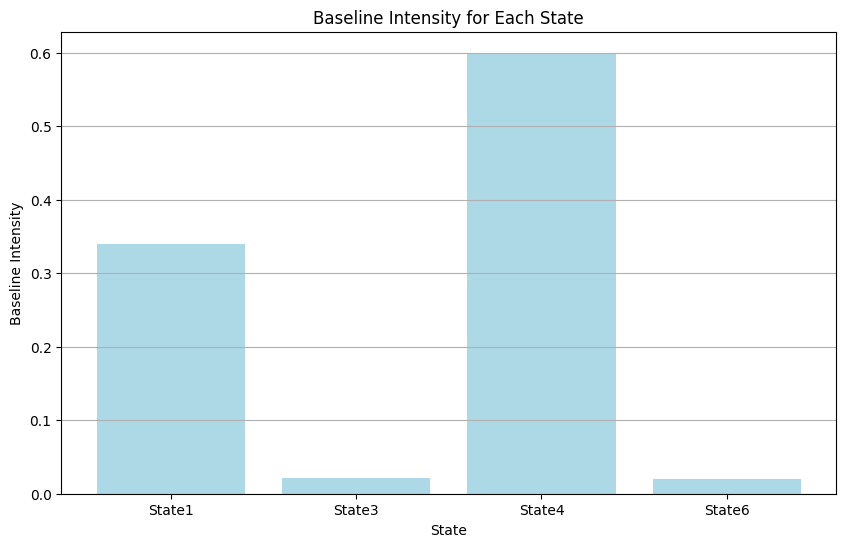

In [374]:
import matplotlib.pyplot as plt

# Using the estimated mus for the baseline intensities
baseline = mus

plt.figure(figsize=(10,6))
plt.bar(range(4), baseline, color='lightblue')
plt.xlabel('State')
plt.ylabel('Baseline Intensity')
plt.title('Baseline Intensity for Each State')
plt.xticks(range(4), ['State1', 'State3', 'State4', 'State6'])
plt.grid(axis='y')
plt.show()


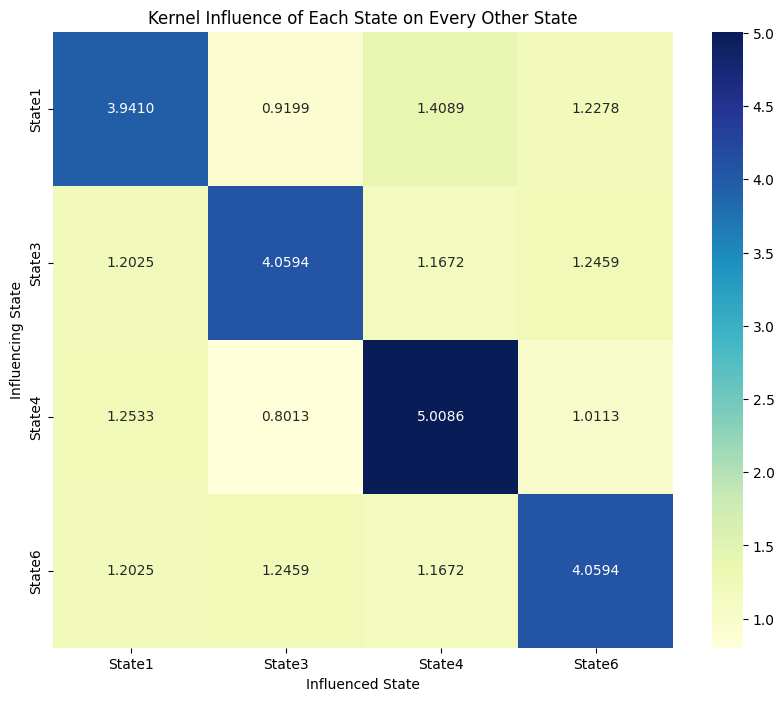

In [375]:
import seaborn as sns
plt.figure(figsize=(10, 8))
annot_matrix = np.array([[f"{value:.4f}" for value in row] for row in alphas_matrix])
sns.heatmap(alphas_matrix, annot=annot_matrix, cmap="YlGnBu", cbar=True, 
            xticklabels=['State1', 'State3', 'State4', 'State6'], 
            yticklabels=['State1', 'State3', 'State4', 'State6'],
            fmt="")
plt.title('Kernel Influence of Each State on Every Other State')
plt.ylabel('Influencing State')
plt.xlabel('Influenced State')
plt.show()


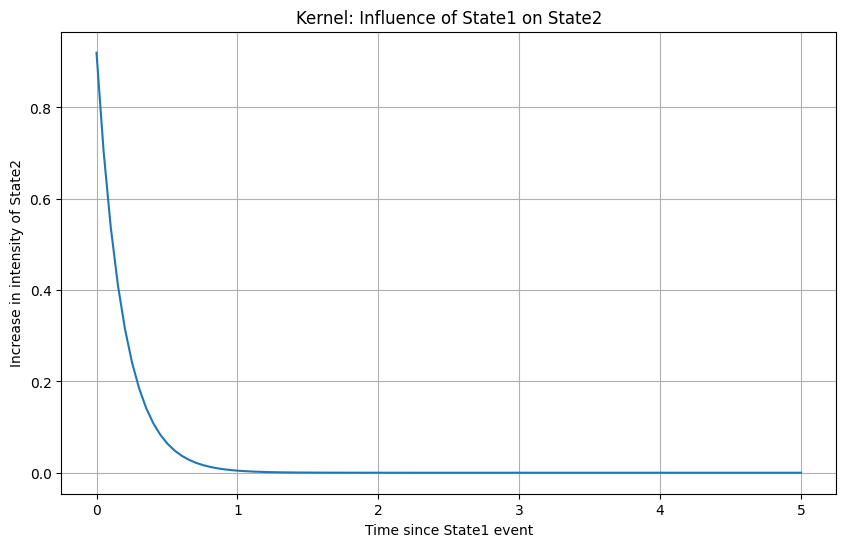

In [376]:
# Define time range for visualization
t_values = np.linspace(0, 5, 100)  # Adjust as necessary

# Assuming averaged_betas has been defined previously
decay = averaged_betas[0]  # Decay parameter for State1
alpha_12 = alphas_matrix[0, 1]  # Influence of State1 on State2

kernel_values = alpha_12 * np.exp(-decay * t_values)

plt.figure(figsize=(10,6))
plt.plot(t_values, kernel_values)
plt.title('Kernel: Influence of State1 on State2')
plt.xlabel('Time since State1 event')
plt.ylabel('Increase in intensity of State2')
plt.grid(True)
plt.show()


## Multivariate Hawkes plot of State1 (No influences)

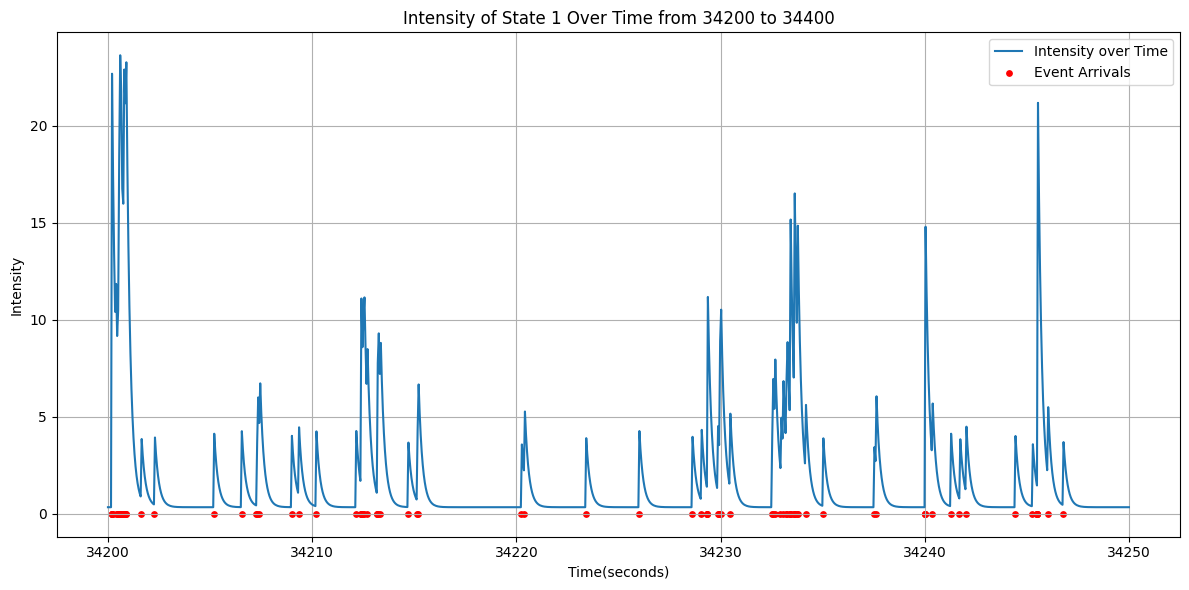

In [566]:
# Parameters from your estimation
mu = mus[0]
alpha = alphas_matrix[0,0]
beta = averaged_betas[0]

# Time points to evaluate the intensity
start_timeHaw = 34200
end_timeHaw = 34250
t_values = np.linspace(start_timeHaw, end_timeHaw, 1000)

# Compute the intensity
intensity_values = []
for t in t_values:
    past_events = np.array(state1_times)[np.array(state1_times) < t]
    intensity_t = mu + np.sum(alpha * np.exp(-beta * (t - past_events)))
    intensity_values.append(intensity_t)

# Plot
plt.figure(figsize=(12,6))
plt.plot(t_values, intensity_values, label='Intensity over Time')
event_times_within_range = [time for time in state1_times if start_timeHaw <= time <= end_timeHaw]
plt.scatter(event_times_within_range, [0]*len(event_times_within_range), color='red', s=15, label='Event Arrivals')
plt.xlabel('Time(seconds)')
plt.ylabel('Intensity')
plt.title('Intensity of State 1 Over Time from 34200 to 34400')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


With all influnces of state 1

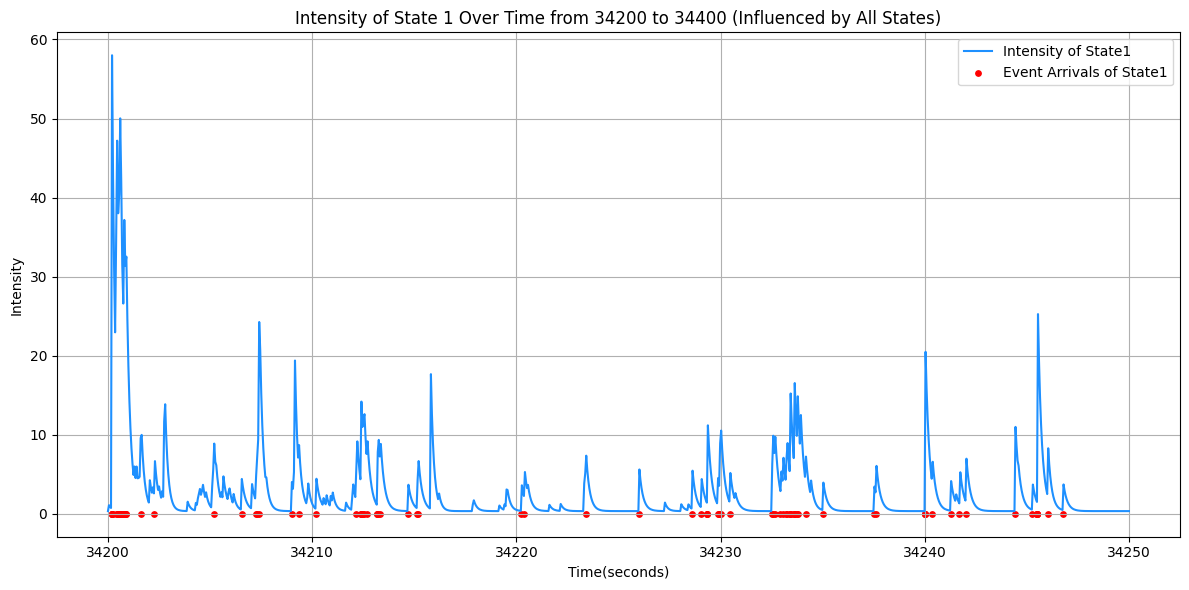

In [567]:
# Time points to evaluate the intensity
t_values = np.linspace(start_timeHaw, end_timeHaw, 1000)

# Extract event times for all states
all_event_times = [state1_times, state3_times, state4_times, state6_times]
# Compute the intensity for State1
intensity_values = []
for t in t_values:
    intensity_t = mus[0]  # Baseline intensity for State1
    for n in range(4):  # Loop through all states
        past_events = np.array(all_event_times[n])[np.array(all_event_times[n]) < t]
        intensity_t += np.sum(alphas_matrix[0, n] * np.exp(-averaged_betas[n] * (t - past_events)))
    intensity_values.append(intensity_t)

# Plot
plt.figure(figsize=(12,6))
plt.plot(t_values, intensity_values, label='Intensity of State1', color='dodgerblue')
event_times_within_range = [time for time in state1_times if start_timeHaw <= time <= end_timeHaw]
plt.scatter(event_times_within_range, [0]*len(event_times_within_range), color='red', s=15, label='Event Arrivals of State1')

plt.xlabel('Time(seconds)')
plt.ylabel('Intensity')
plt.title('Intensity of State 1 Over Time from 34200 to 34400 (Influenced by All States)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


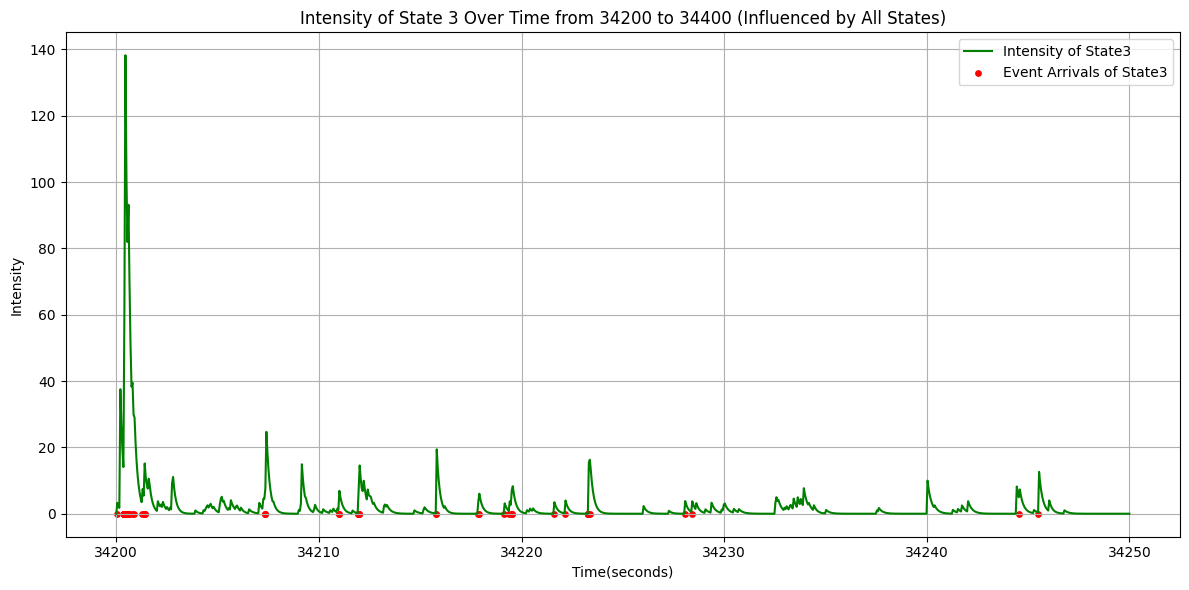

In [568]:
# Compute the intensity for State3
intensity_values_state3 = []
for t in t_values:
    intensity_t = mus[1]  # Baseline intensity for State3
    for n in range(4):  # Loop through all states
        past_events = np.array(all_event_times[n])[np.array(all_event_times[n]) < t]
        intensity_t += np.sum(alphas_matrix[1, n] * np.exp(-averaged_betas[n] * (t - past_events)))
    intensity_values_state3.append(intensity_t)

# Plot
plt.figure(figsize=(12,6))
plt.plot(t_values, intensity_values_state3, label='Intensity of State3', color='green')
event_times_within_range_state3 = [time for time in state3_times if start_timeHaw <= time <= end_timeHaw]
plt.scatter(event_times_within_range_state3, [0]*len(event_times_within_range_state3), color='red', s=15, label='Event Arrivals of State3')

plt.xlabel('Time(seconds)')
plt.ylabel('Intensity')
plt.title('Intensity of State 3 Over Time from 34200 to 34400 (Influenced by All States)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## All plot

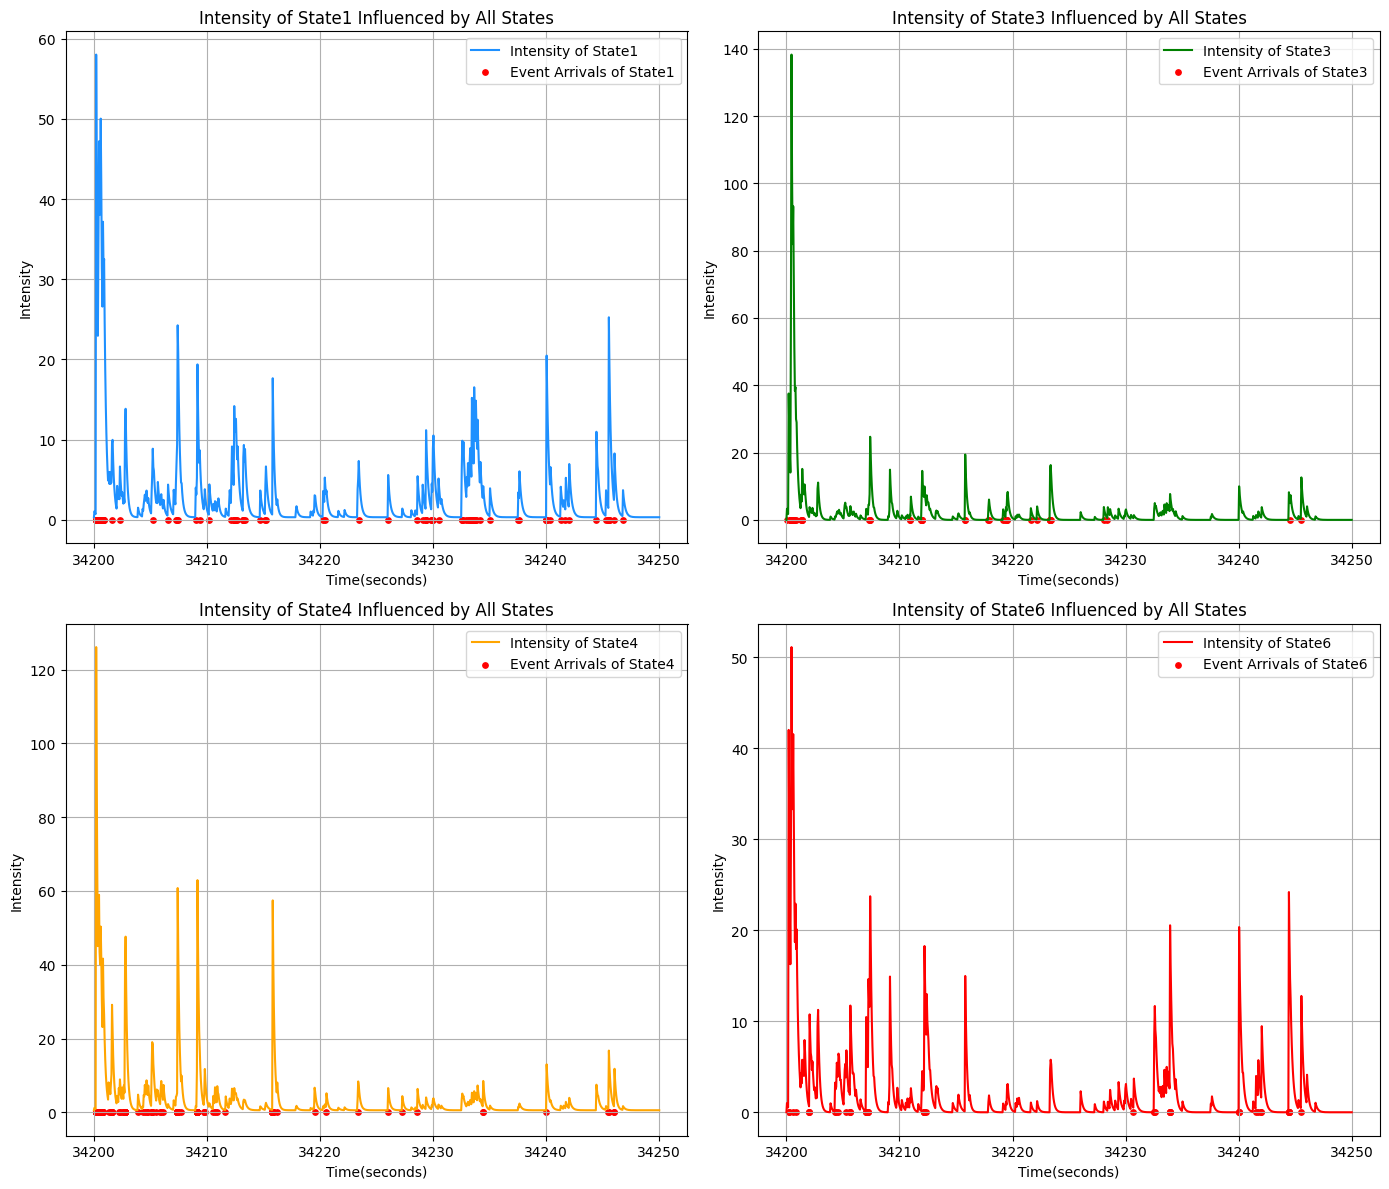

In [569]:
# Set up the 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
states = ['State1', 'State3', 'State4', 'State6']
colors = ['dodgerblue', 'green', 'orange', 'red']

# Loop through all states and plot each one
for m in range(4):
    row, col = divmod(m, 2)  # Determine the subplot position
    
    intensity_values = []
    for t in t_values:
        intensity_t = mus[m]
        for n in range(4):
            past_events = np.array(all_event_times[n])[np.array(all_event_times[n]) < t]
            intensity_t += np.sum(alphas_matrix[m, n] * np.exp(-averaged_betas[n] * (t - past_events)))
        intensity_values.append(intensity_t)

    # Plot the intensity for the current state
    axes[row, col].plot(t_values, intensity_values, label=f'Intensity of {states[m]}', color=colors[m])
    event_times_within_range = [time for time in all_event_times[m] if start_timeHaw <= time <= end_timeHaw]
    axes[row, col].scatter(event_times_within_range, [0]*len(event_times_within_range), color='red', s=15, label=f'Event Arrivals of {states[m]}')
    axes[row, col].set_title(f'Intensity of {states[m]} Influenced by All States')
    axes[row, col].set_xlabel('Time(seconds)')
    axes[row, col].set_ylabel('Intensity')
    axes[row, col].legend()
    axes[row, col].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


## Plot intensities of state 1 for each states arrivals as a point in same graph 

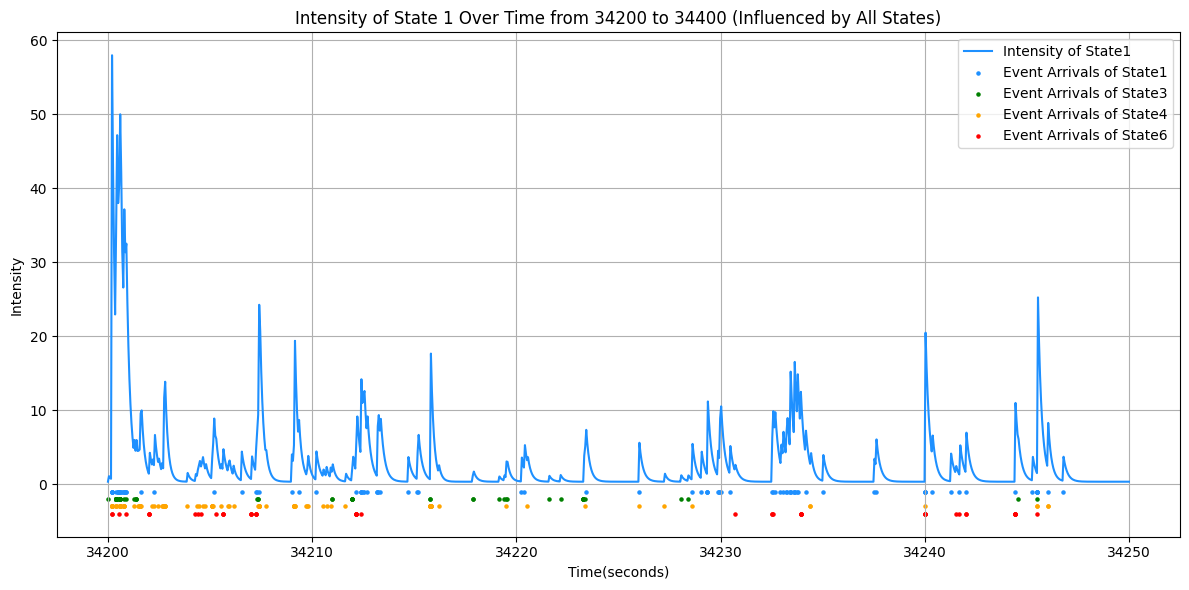

In [570]:
# Compute the intensity for State1
intensity_values_state1 = []
for t in t_values:
    intensity_t = mus[0]  # Baseline intensity for State1
    for n in range(4):  # Loop through all states
        past_events = np.array(all_event_times[n])[np.array(all_event_times[n]) < t]
        intensity_t += np.sum(alphas_matrix[0, n] * np.exp(-averaged_betas[n] * (t - past_events)))
    intensity_values_state1.append(intensity_t)

# Plot
plt.figure(figsize=(12,6))
plt.plot(t_values, intensity_values_state1, label='Intensity of State1', color='dodgerblue')

# Update the color of State1 event arrivals to 'dodgerblue'
colors[0] = 'dodgerblue'

# Define vertical offsets for event arrival markers of each state
y_offsets = [-1, -2, -3, -4]

# Overlay event arrivals for all states with different vertical offsets
for m, state in enumerate(states):
    event_times_within_range = [time for time in all_event_times[m] if start_timeHaw <= time <= end_timeHaw]
    plt.scatter(event_times_within_range, [y_offsets[m]]*len(event_times_within_range), color=colors[m], s=5, label=f'Event Arrivals of {state}')

plt.xlabel('Time(seconds)')
plt.ylabel('Intensity')
plt.title('Intensity of State 1 Over Time from 34200 to 34400 (Influenced by All States)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Plot all intensities for each states arrivals as a point in same graph 

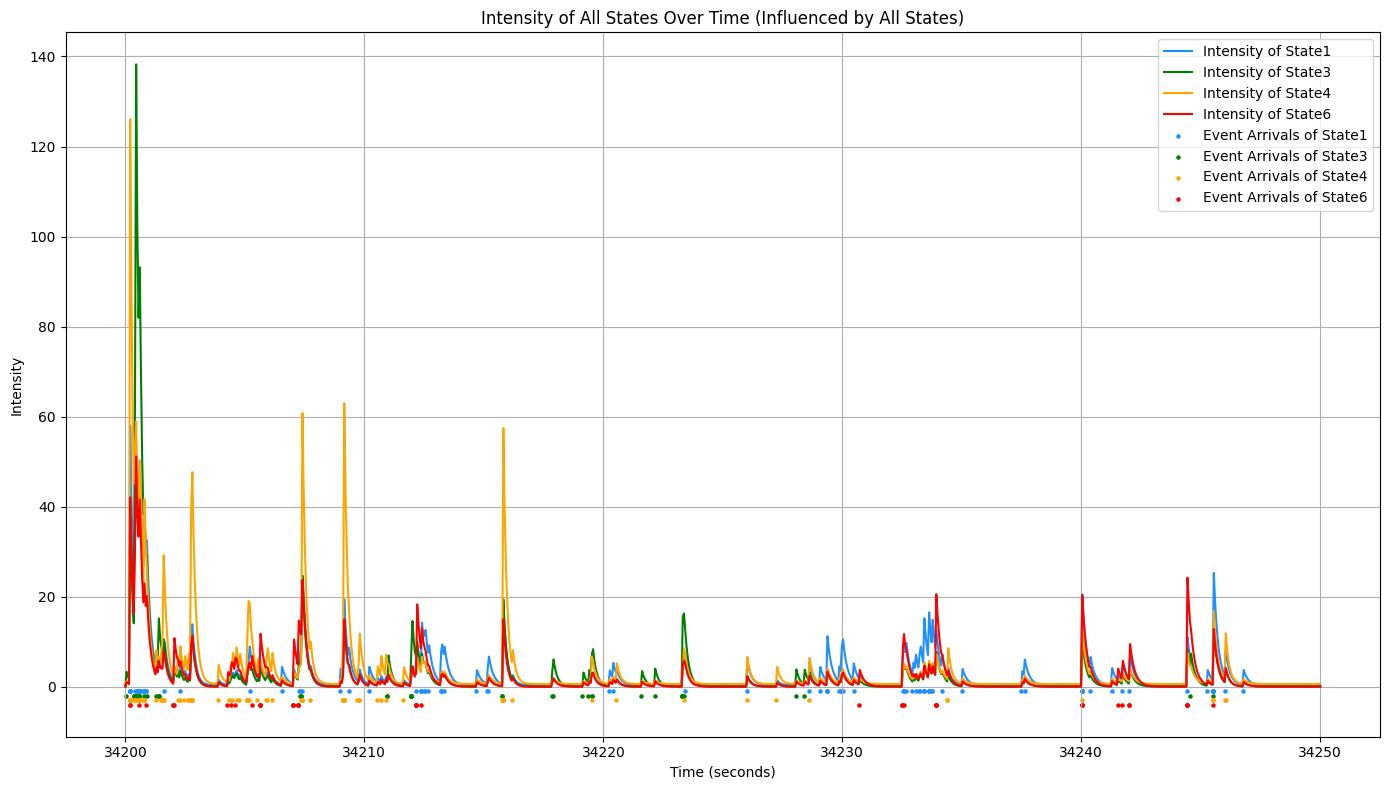

In [571]:
# Initialize a list to hold all intensities for each state
all_intensity_values = []

# Loop through all states to compute intensity values
for m in range(4):
    intensity_values = []
    for t in t_values:
        intensity_t = mus[m]
        for n in range(4):
            past_events = np.array(all_event_times[n])[np.array(all_event_times[n]) < t]
            intensity_t += np.sum(alphas_matrix[m, n] * np.exp(-averaged_betas[n] * (t - past_events)))
        intensity_values.append(intensity_t)
    all_intensity_values.append(intensity_values)

# Plot
plt.figure(figsize=(14, 8))

# Plot intensities for all states
for m, state in enumerate(states):
    plt.plot(t_values, all_intensity_values[m], label=f'Intensity of {state}', color=colors[m])

# Define vertical offsets for event arrival markers of each state
y_offsets = [-1, -2, -3, -4]

# Overlay event arrivals for all states with different vertical offsets
for m, state in enumerate(states):
    event_times_within_range = [time for time in all_event_times[m] if start_timeHaw <= time <= end_timeHaw]
    plt.scatter(event_times_within_range, [y_offsets[m]] * len(event_times_within_range), color=colors[m], s=5, label=f'Event Arrivals of {state}')

plt.xlabel('Time (seconds)')
plt.ylabel('Intensity')
plt.title('Intensity of All States Over Time (Influenced by All States)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Model Evaluation

Certainly! Let's break this down:

1. **Akaike Information Criterion (AIC)**: AIC is a measure of the goodness of fit of a statistical model. It rewards the model for its goodness of fit and penalizes the model if it becomes too complex. The formula for AIC is given by:

\[
$AIC = 2k - 2\ln(L)$
\]

where:
- \( $L$ \) is the likelihood of the model.
- \( $k$ \) is the number of estimated parameters in the model.


Likelihood tend to infinity, so using the log-likelihood by the formula

In [384]:
def log_likelihood_for_model(mus, alphas_matrix, all_event_times, T, averaged_betas):
    log_likelihood = 0
    for m in range(4):
        for t in all_event_times[m]:
            log_likelihood += np.log(intensity(t, m, all_event_times, mus[m], alphas_matrix[m], averaged_betas[m]))
        log_likelihood -= integral_intensity(T, m, all_event_times, mus[m], alphas_matrix[m], averaged_betas[m])
    return log_likelihood

logL = log_likelihood_for_model(mus, alphas_matrix, timestamps, T/total_fractions, averaged_betas)
k = 20
AIC = 2*k - 2*logL
print(f"AIC: {AIC}")


AIC: -52331.195759537906


In [386]:
def log_likelihood_for_individual_state(state_idx, mus, alphas_matrix, all_event_times, T, averaged_betas):
    log_likelihood = 0
    for t in all_event_times[state_idx]:
        log_likelihood += np.log(intensity(t, state_idx, all_event_times, mus[state_idx], alphas_matrix[state_idx], averaged_betas[state_idx]))
    log_likelihood -= integral_intensity(T, state_idx, all_event_times, mus[state_idx], alphas_matrix[state_idx], averaged_betas[state_idx])
    return log_likelihood

states = [0, 1, 2, 3]  # Indices for State1, State3, State4, and State6
state_names = ['State1', 'State3', 'State4', 'State6']
k_per_state = 6  # 1 mu 1 beta and 4 alphas for each state

for idx, state_name in zip(states, state_names):
    logL_state = log_likelihood_for_individual_state(idx, mus, alphas_matrix, timestamps, T/total_fractions, averaged_betas)
    AIC_state = 2*k_per_state - 2*logL_state
    print(f"AIC for {state_name}: {AIC_state}")


AIC for State1: -24057.883925079805
AIC for State3: -1548.733180644347
AIC for State4: -25483.20798147403
AIC for State6: -1233.37067233953


AIC for State1: -256797.47558408277\
AIC for State3: -20487.540791248968\
AIC for State4: -304283.0896885408\
AIC for State6: -17020.46430677209

In [82]:
import statsmodels.api as sm
import numpy as np

# List of time series data for each state
state_times_list = [state1_times, state3_times, state4_times, state6_times]
state_names = ['State1', 'State3', 'State4', 'State6']

for state_data, state_name in zip(state_times_list, state_names):
    time_series_data = np.diff(state_data)  # Using inter-event times

    print(f"\nResults for {state_name}:")

    # AR(4)
    model_ar = sm.tsa.ARIMA(time_series_data, order=(4,0,0))
    results_ar = model_ar.fit()
    k_ar = results_ar.df_model + 1  # +1 for constant term
    aic_ar = 2*k_ar - 2*np.log(abs(results_ar.llf))
    print(f"AIC for AR(4): {aic_ar}")

    # MA(4)
    model_ma = sm.tsa.ARIMA(time_series_data, order=(0,0,4))
    results_ma = model_ma.fit()
    k_ma = results_ma.df_model + 1  # +1 for constant term
    aic_ma = 2*k_ma - 2*np.log(abs(results_ma.llf))
    print(f"AIC for MA(4): {aic_ma}")

    # ARIMA(p,d,q) - ARIMA(2,1,2) as an example
    model_arima = sm.tsa.ARIMA(time_series_data, order=(4,0,4))
    results_arima = model_arima.fit()
    k_arima = results_arima.df_model + 1  # +1 for constant term
    aic_arima = 2*k_arima - 2*np.log(abs(results_arima.llf))
    print(f"AIC for ARIMA(4,0,4): {aic_arima}")



Results for State1:
AIC for AR(4): -8.645844253099103
AIC for MA(4): -8.650107985486695
AIC for ARIMA(4,0,4): -0.6370179033266723

Results for State3:
AIC for AR(4): -6.08425577012996
AIC for MA(4): -6.084500594406709


d:\Anaconda3\envs\dl\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC for ARIMA(4,0,4): 1.9219099607823544

Results for State4:
AIC for AR(4): -8.759706784856494
AIC for MA(4): -8.765392669049842


d:\Anaconda3\envs\dl\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC for ARIMA(4,0,4): -0.7504858923039635

Results for State6:
AIC for AR(4): -5.998119652274429
AIC for MA(4): -5.998687875893918


d:\Anaconda3\envs\dl\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC for ARIMA(4,0,4): 2.0064393151701942


# QQ Plot for Hawkes

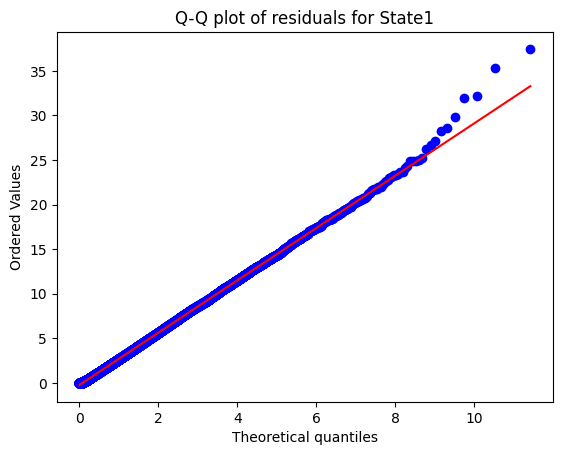

In [392]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Compute residuals for State1
intensities = [intensity(t, 0, timestamps, mus[0], alphas_matrix[0], averaged_betas[0]) for t in state1_times]
residuals = -np.log(np.random.uniform(size=len(state1_times))) / intensities

# Q-Q plot
stats.probplot(residuals, dist="expon", plot=plt)
plt.title("Q-Q plot of residuals for State1")
plt.show()


## Imrpoves a lot of inhomogeneous process

# Cox Process
The Cox process, also known as the Doubly Stochastic Poisson process, is another type of point process. Unlike the Homogeneous or Inhomogeneous Poisson processes where the intensity function is deterministic, in the Cox process, the intensity function itself is a random process.

Here's an overview of the Cox process and how to use it:

## Basics of the Cox Process:

1. **Intensity Function**:
   The Cox process has a stochastic intensity function \( $\lambda(t)$ \) which is itself modeled as a random process. This random process is typically chosen based on the application. Common choices are Gaussian processes or other types of stochastic processes.

2. **Doubly Stochastic**:
   Since both the events and the intensity function are random, the Cox process is often referred to as being "doubly stochastic".

3. **Properties**:
   Given a realization of the intensity function, the Cox process behaves like a (non-homogeneous) Poisson process with that realization of the intensity.

## How to use the Cox Process:

1. **Data Preparation**:
   - As with other point processes, start by collecting timestamped events.

2. **Modeling the Intensity**:
   - Choose a stochastic model for the intensity function \( $\lambda(t)$ \). Gaussian processes are a popular choice.
   - Estimate the parameters of the intensity model using the observed data.

3. **Simulation**:
   - Simulate new realizations of the intensity function using the chosen stochastic model.
   - For each realization of \( $\lambda(t)$ \), simulate a Poisson process to generate event sequences.

4. **Parameter Estimation**:
   - As with other point processes, parameters can be estimated using Maximum Likelihood Estimation (MLE) or Bayesian methods, especially if using Gaussian processes for the intensity.

5. **Validation**:
   - Validate the fit of the model using methods appropriate for the chosen stochastic model for the intensity. For Gaussian processes, for instance, you might validate the hyperparameters and the fit of the GP to the observed data.

## Applications:

The Cox process is particularly useful in situations where there's significant uncertainty or variability in the event rate itself. Examples include modeling of earthquake occurrences when the underlying tectonic activity is uncertain or modeling of neuron firings when the underlying neuron excitation state is unknown.

## Software:

Various software packages and libraries allow for estimation and simulation of Cox processes. In Python, libraries that handle Gaussian processes (like `GPy` or the Gaussian process module in `scikit-learn`) can be used as a basis for modeling the intensity function of a Cox process.



## Under Poisson assumption using the intensity function of multivariate Hawkes Process

# Same MLE with multivariate Hawkes Process

By assuming that the Cox process has an intensity function driven by a multivariate Hawkes process, you're saying that the observed events arise from a Poisson process, but the rate of events is influenced by past events in a way described by the Hawkes process.

Under the Poisson assumption, the likelihood for a Hawkes process with intensity \( \lambda(t) \) given observed event times \( t_1, t_2, \ldots, t_n \) in the interval \([0, T]\) is:

\[
$L(\mu, \alpha, \beta|\mathbf{t}) = \prod_{i=1}^{n} \lambda(t_i) \exp\left(-\int_{0}^{T} \lambda(t) dt\right)$
\]

The log-likelihood is then:

\[
$\ell(\mu, \alpha, \beta|\mathbf{t}) = \sum_{i=1}^{n} \log \lambda(t_i) - \int_{0}^{T} \lambda(t) dt$
\]

The intensity function \( \lambda(t) \) for the Hawkes process is:

\[
$\lambda(t) = \mu + \sum_{t_i < t} \alpha \exp(-\beta (t - t_i))$
\]

Given this, the log-likelihood under the Poisson assumption is:

\[
$\ell(\mu, \alpha, \beta|\mathbf{t}) = \sum_{i=1}^{n} \log \left( \mu + \sum_{t_j < t_i} \alpha \exp(-\beta (t_i - t_j)) \right) - \int_{0}^{T} \left( \mu + \sum_{t_j < t} \alpha \exp(-\beta (t - t_j)) \right) dt$
\]

To find the Maximum Likelihood Estimates (MLEs) of the parameters \( \mu \), \( \alpha \), and \( \beta \), you'd minimize the negative of the log-likelihood.

The code I provided in the previous answer is for the MLE under the Poisson assumption. The Poisson assumption means that given the intensity function \( \lambda(t) \), the number of events in any small time interval follows a Poisson distribution. This is the standard assumption when dealing with point processes like the Hawkes process.

So, the code I provided is already under the Poisson assumption for the Hawkes process. You can use it to find the MLE of the parameters of the Hawkes intensity function.

Certainly! To model the Cox process under the Gaussian assumption for the four states (State 1, State 3, State 4, and State 6), we need to repeat the process described above for each state. Let's do this step by step:

1. Partition your dataset for each state.
2. Fit a Gaussian process to the rate function \(\lambda(t)\) for each state using the observed event times.
3. Predict the rate for the specified time values and visualize the results.

Note: The previous code assumed that `intervals1` and `lambdas1` represented the intervals and intensity function values for State 1. To implement the Cox process for all four states, we need to compute similar values for each state.

Let's implement the Cox process for the four states:


Both gaussianregressor and poisson are the same to compute the stohcatic process.
To model the Cox process under the Poisson assumption, you don't have to change the way you estimate the intensity function. In both the Gaussian and Poisson process assumptions, the intensity function is modeled as a stochastic function and can be estimated using methods like Gaussian Process Regression. The difference lies in how the observed data is generated given the intensity function.

For the Poisson assumption, we assume that the number of events in any interval follows a Poisson distribution with a mean equal to the integral of the intensity function over that interval.

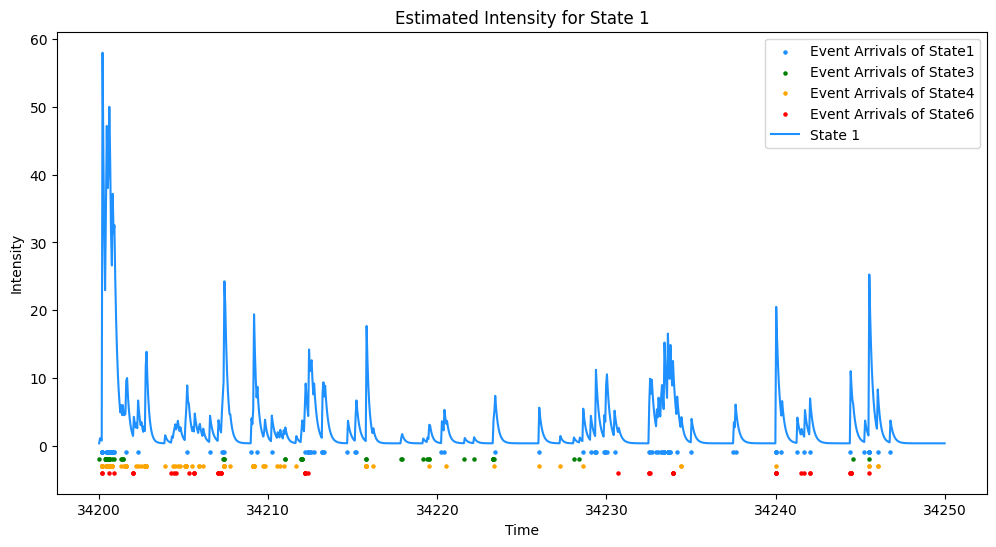

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
betas_cox = [5.307404328466423, 6.34837726012841, 7.061907680387299, 4.964468142785705]
mus_cox = [0.33958254380299113, 0.021469213525237882, 0.5987452725626476, 0.020054659991816742]
alphas_cox = [
    [3.94095093, 0.91990654, 1.40890108, 1.22782313],
    [1.20253306, 4.05937877, 1.16719193, 1.24586935],
    [1.25325298, 0.80131089, 5.00855156, 1.01134306],
    [1.20253306, 1.24586935, 1.16719193, 4.05937877]
]

# Assuming you have event times for each dimension in a list of arrays
event_times_list = [state1_times, state3_times, state4_times, state6_times]  # Replace with your event times

# Intensity function for dimension i at time t
def lambda_i(t, i):
    intensity = mus_cox[i]
    for j in range(len(betas_cox)):
        intensity += np.sum(alphas_cox[i][j] * np.exp(-betas_cox[j] * (t - event_times_list[j][event_times_list[j] < t])))
    return intensity

# Plotting the intensity for state 1  # Your observation window end time
time_points = np.linspace(34200, 34250, 1000)

# Compute intensities only for state 1
intensities_state1 = [lambda_i(t, 0) for t in time_points]

# Create a larger plot
plt.figure(figsize=(12, 6))

states = ['State1', 'State3', 'State4', 'State6']
colors = ['dodgerblue', 'green', 'orange', 'red']
# Update the color of State1 event arrivals to 'dodgerblue'
colors[0] = 'dodgerblue'

# Define vertical offsets for event arrival markers of each state
y_offsets = [-1, -2, -3, -4]

# Overlay event arrivals for all states with different vertical offsets
for m, state in enumerate(states):
    event_times_within_range = [time for time in event_times_list[m] if 34200 <= time <= 34250]
    plt.scatter(event_times_within_range, [y_offsets[m]]*len(event_times_within_range), color=colors[m], s=5, label=f'Event Arrivals of {state}')
# Plot the intensities for state 1
plt.plot(time_points, intensities_state1, label='State 1', color = 'dodgerblue')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('Estimated Intensity for State 1')
plt.show()

## Q-Q plot for cox process

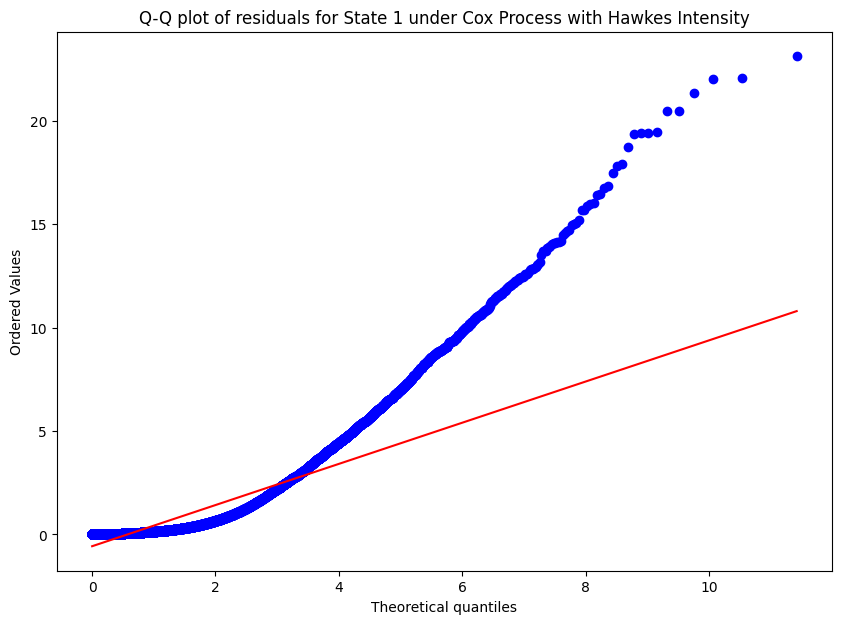

In [40]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Extract event times for State 1
event_times_state1 = all_event_times[0]

# Compute transformed residuals
intensities = [lambda_i(t, 0) for t in event_times_state1]
residuals = -np.log(np.random.uniform(size=len(event_times_state1))) / intensities

# Q-Q plot
plt.figure(figsize=(10, 7))
stats.probplot(residuals, dist="expon", plot=plt)
plt.title("Q-Q plot of residuals for State 1 under Cox Process with Hawkes Intensity")
plt.show()


The similarity in AIC values for the Cox process with the intensity of a multivariate Hawkes process and the pure multivariate Hawkes process suggests that both models fit the observed data with similar goodness-of-fit in terms of information loss. However, it's crucial to note a few points:

1. **Model Assumptions**: While the Cox process you described uses the intensity of a multivariate Hawkes process, it's essentially a non-homogeneous Poisson process. The multivariate Hawkes process, on the other hand, is self-exciting and inherently captures mutual interactions between its dimensions. Although both models might fit the data similarly, they make different assumptions about the underlying generative process.

2. **Residual Analysis**: The residual Q-Q plot is a diagnostic tool for checking the validity of model assumptions about the residuals. If the residuals from the Cox process and the multivariate Hawkes process differ significantly, it suggests that the two models are capturing different aspects of the data or that one model might be better at capturing the underlying structure than the other.

3. **AIC Limitations**: AIC is a relative measure of model fit. A similar AIC value for two models doesn't necessarily mean that both models are equally good; it only means that they are equally good relative to each other. Other models might still outperform them. Moreover, AIC focuses on the likelihood and penalizes model complexity. It doesn't give a complete picture of model diagnostics, which is why residual analysis and other diagnostic tools are essential.

4. **Nature of Residuals**: The residuals from a non-homogeneous Poisson process (like your Cox process) are typically transformed to be uniform on the interval [0,1] if the model is correct. For a self-exciting process like the Hawkes process, residuals have a more complex structure and might not be uniform even if the model is correctly specified.

In summary, while both models might fit the data equally well in terms of AIC, they might be capturing different structures in the data, leading to differences in residual behavior. It's also possible that while both models fit similarly, neither captures the true underlying process perfectly, leading to discrepancies in residual Q-Q plots. Always consider multiple diagnostic tools and criteria when evaluating models.

## AIC

The Akaike Information Criterion (AIC) is given by:

\[
$\text{AIC} = 2k - 2\ln(\hat{L})$
\]

where:
- \( $k$ \) is the number of parameters in the model.
- \( $\hat{L}$ \) is the maximized value of the likelihood function of the model.

For our Gaussian Process regression, the number of parameters is tricky to define precisely as it depends on the kernel used and the number of hyperparameters. For the RBF kernel with a constant term, we have three parameters: the amplitude of the RBF kernel, the length scale of the RBF kernel, and the constant value. 

Given the likelihood of the fitted model, we can then compute the AIC. The Gaussian Process regression in `sklearn` doesn't provide a direct method to get the log likelihood, but it can be accessed via the `log_marginal_likelihood` function.



## Using absolute value estimating 

In [47]:
import numpy as np
import matplotlib.pyplot as plt


# Assuming you have event times for each dimension in a list of arrays
all_event_times = [state1_times, state3_times, state4_times, state6_times]

# Intensity function for dimension i at time t
def lambda_i(t, i):
    intensity = mus_cox[i]
    for j in range(len(betas_cox)):
        intensity += np.sum(alphas_cox[i][j] * np.exp(-betas_cox[j] * (t - all_event_times[j][all_event_times[j] < t])))
    return intensity

# Compute log-likelihood for a given state
def compute_log_likelihood_for_state(state_idx, event_times):
    """Compute the log-likelihood for a given state."""
    log_likelihood = -np.trapz([lambda_i(t, state_idx) for t in time_points], time_points)
    for t in event_times:
        log_likelihood += np.log(lambda_i(t, state_idx))
    return log_likelihood

# Number of parameters for each state: mu, beta, and 4 alphas
k_per_state = 6

# Compute AIC for each state
for idx, state_name in enumerate(['State1', 'State3', 'State4', 'State6']):
    log_likelihood = compute_log_likelihood_for_state(idx, all_event_times[idx])
    AIC_state = 2 * k_per_state - 2 * log_likelihood
    print(f"AIC for {state_name}: {AIC_state}")


AIC for State1: -256797.47558408277
AIC for State3: -20487.540791248968
AIC for State4: -304283.0896885408
AIC for State6: -17020.46430677209


## Rolling Window Prediction and formulation

State 1, 2, 3.\
State 4, 5, 6.\
How to arrange the weighted to formulate the number between 0 and 1

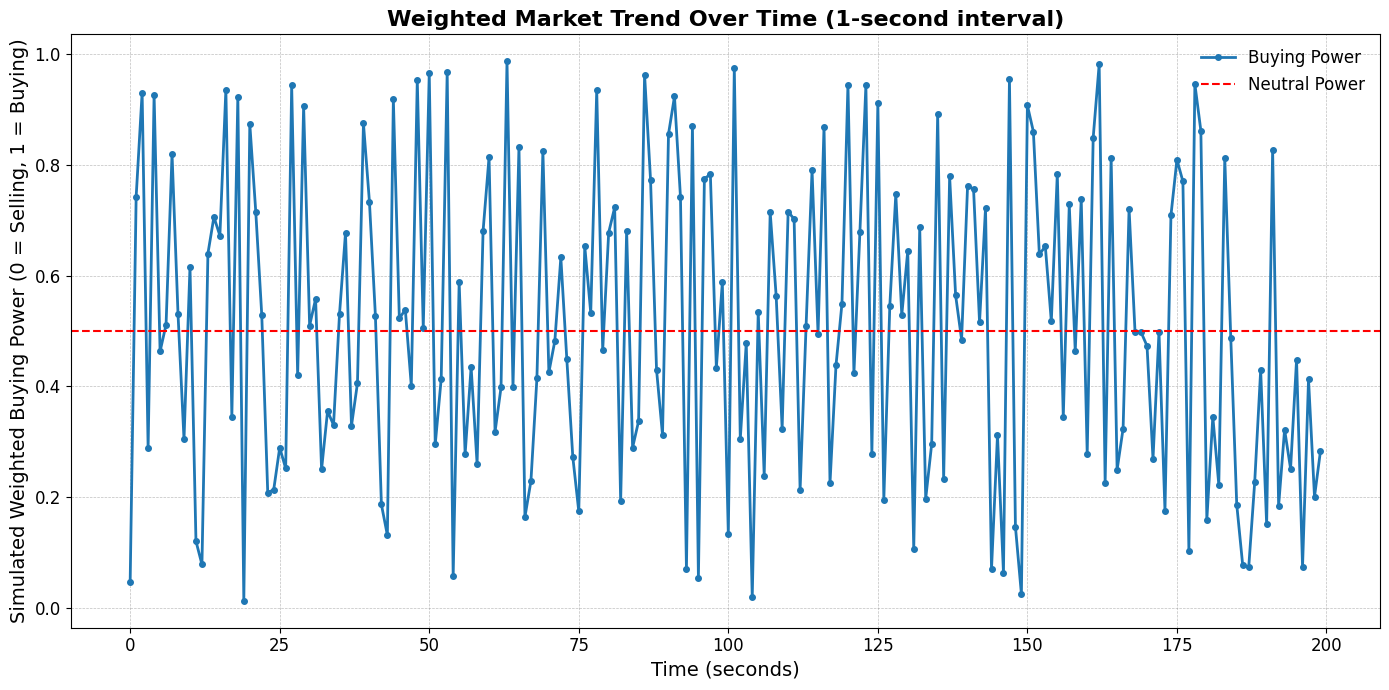

In [539]:

# Number of seconds
num_seconds = 200

# Generate random values between 0 and 1 for each second
events = np.random.rand(num_seconds)

# Time array (in seconds)
time = np.arange(num_seconds)

# Plotting
plt.figure(figsize=(14, 7))

# Plot the curve with shading underneath
plt.plot(time, events, '-o', color='tab:blue', label="Buying Power", markersize=4, linewidth=2)
plt.axhline(0.5, color='red', linestyle='--', label='Neutral Power')
# Labeling and titles
plt.xlabel("Time (seconds)", fontsize=14)
plt.ylabel("Simulated Weighted Buying Power (0 = Selling, 1 = Buying)", fontsize=14)
plt.title("Weighted Market Trend Over Time (1-second interval)", fontsize=16, fontweight='bold')

# Improve tick font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove box from legend and set its font size
plt.legend(fontsize=12, frameon=False)

# Display the grid with a softer color
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()



# Size Correlation is shown above: cell-27

window size is 10

## Actual data drawing between 0 and 1
Where 0 means negative (Selling power), closer to 0 means more selling power\
1 means positive (Buying power), closer to 1 means more buying power\
0.5 means neutral power (Market doesnt tend to any side)

差异性并不大，所以需要在小的地方入手，才有大的差异

## 10s
# Weighted:


Regression analysis can help determine the relative importance of predictor variables in explaining the variation in the dependent variable. In your case, the counts of events for each state can serve as predictor variables, and the outcome variable of interest (e.g., stock returns, traded volume) will be the dependent variable. 

Here's a step-by-step approach:

1. **Model Specification**:
   Set up a multiple regression model where the dependent variable is the outcome of interest and the independent variables are the counts of events for each state.
   
   \[
   $Y = \beta_0 + \beta_1 \times \text{State}_1 + \beta_2 \times \text{State}_2 + \ldots + \beta_N \times \text{State}_N + \epsilon$
   \]
   
   Where \( $Y$ \) is the outcome variable, \( $\beta_i$ \) are the coefficients for each state, and \( \epsilon \) is the error term.

2. **Estimate the Model**:
   Using a statistical software or package (like `statsmodels` in Python), fit the regression model to your data.

3. **Extract Coefficients**:
   Once the model is fit, extract the coefficients \( $\beta_1$, $\beta_2$, $\ldots$, $\beta_N$ \) for each state.

4. **Normalize the Coefficients**:
   To turn the coefficients into weights that sum to 1 (for interpretability), normalize them:
   
   \[
   $\text{Weight of State}_i = \frac{|\beta_i|}{\sum_{j=1}^{N} |\beta_j|}$
   \]

   We use the absolute values to ensure all weights are positive, reflecting the magnitude of importance regardless of the direction of the relationship.

5. **Interpretation**:
   Higher weights indicate that changes in the corresponding state's event count have a larger impact on the outcome variable compared to states with lower weights. 

It's important to note:

- The weights derived from the regression model reflect both the magnitude and the direction of the relationship between each state's event count and the outcome variable.
  
- It's possible that some states might have a negative relationship with the outcome. This is reflected in the sign of the coefficient but not in the weight (since we use the absolute values of the coefficients).

- Ensure that the assumptions of the regression model (e.g., linearity, homoscedasticity, no multicollinearity) are met to derive reliable weights.

- You might want to split the data into training and test sets, fit the regression on the training set, and validate its performance on the test set to ensure robustness.

The prediction plot is only consider the first 20% in 10s time intervals, but the regression model will consider the whole time set
too noisy and not smooth

In [320]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def compute_events_per_interval(sample_data, interval_length, start_time, end_time):
    lambdas = []
    
    for i in np.arange(start_time, end_time, interval_length):
        # Count the number of events in this interval
        events_in_interval = sample_data[(sample_data['Time'] >= i) & (sample_data['Time'] < i + interval_length)]
        event_count = len(events_in_interval)
        
        # Estimate the rate parameter (lambda) for this interval
        lambda_state = event_count / interval_length
        
        # Add the estimate to the list
        lambdas.append(lambda_state)
        
    # Convert the rate parameters back to the number of events in each interval
    # by multiplying by the interval length
    events_per_interval = np.array(lambdas) * interval_length
    
    return events_per_interval

interval_length = 10
events_per_interval_buyside_10 = compute_events_per_interval(sample_buyside, interval_length, start_time, end_time)
events_per_interval_sellside_10 = compute_events_per_interval(sample_sellside, interval_length, start_time, end_time)
events_per_interval1_10 = compute_events_per_interval(sample_buyside_type1, interval_length, start_time, end_time)
events_per_interval2_10 = compute_events_per_interval(sample_buyside_type23, interval_length, start_time, end_time)
events_per_interval3_10 = compute_events_per_interval(sample_buyside_type45, interval_length, start_time, end_time)
events_per_interval4_10 = compute_events_per_interval(sample_sellside_type1, interval_length, start_time, end_time)
events_per_interval5_10 = compute_events_per_interval(sample_sellside_type23, interval_length, start_time, end_time)
events_per_interval6_10 = compute_events_per_interval(sample_sellside_type45, interval_length, start_time, end_time)



# Sample dataset with states and outcomes
df10 = pd.DataFrame({
    'State1': events_per_interval1_10,
    'State2': events_per_interval2_10,
    'State3': events_per_interval3_10,
    'State4': events_per_interval4_10,
    'State5': events_per_interval5_10,
    'State6': events_per_interval6_10,
    'outcome_buy': events_per_interval_buyside_10 /(events_per_interval_buyside_10 + events_per_interval_sellside_10 ),   # Replace with your actual buy-side outcome data
    'outcome_sell': events_per_interval_sellside_10 /(events_per_interval_buyside_10 + events_per_interval_sellside_10 ) # Replace with your actual sell-side outcome data
})

# Function to perform regression analysis and extract weights
def analyze_states(X_train, X_test, y_train, y_test):
    # Adding a constant for the intercept
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    
    # Building the regression model
    model = sm.OLS(y_train, X_train).fit()
    
    # Predicting on the test set
    y_pred = model.predict(X_test)
    
    # Evaluating the model's performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Extracting and normalizing the coefficients to get weights
    coefficients = model.params[1:]  # Excluding the intercept
    weights = np.abs(coefficients) / sum(np.abs(coefficients))
    
    return mse, r2, weights

# Buy-side analysis
X_buy = df10[['State1', 'State2', 'State3']]
y_buy = df10['outcome_buy']
X_train_buy, X_test_buy, y_train_buy, y_test_buy = train_test_split(X_buy, y_buy, test_size=0.2, random_state=42)
mse_buy_10, r2_buy_10, weights_buy_10 = analyze_states(X_train_buy, X_test_buy, y_train_buy, y_test_buy)

print(f"Buy-side_10s MSE: {mse_buy_10}")
print(f"Buy-side_10s R^2: {r2_buy_10}")
print(f"Buy-side_10s Weights: {weights_buy_10}")

# Sell-side analysis
X_sell = df10[['State4', 'State5', 'State6']]
y_sell = df10['outcome_sell']
X_train_sell, X_test_sell, y_train_sell, y_test_sell = train_test_split(X_sell, y_sell, test_size=0.2, random_state=42)
mse_sell_10, r2_sell_10, weights_sell_10 = analyze_states(X_train_sell, X_test_sell, y_train_sell, y_test_sell)

print(f"Sell-side_10s MSE: {mse_sell_10}")
print(f"Sell-side_10s R^2: {r2_sell_10}")
print(f"Sell-side_10s Weights: {weights_sell_10}")


Buy-side_10s MSE: 0.004984092926529513
Buy-side_10s R^2: 0.0786170806082821
Buy-side_10s Weights: State1    0.187536
State2    0.157569
State3    0.654895
dtype: float64
Sell-side_10s MSE: 0.0052332266594218085
Sell-side_10s R^2: 0.032561044030509745
Sell-side_10s Weights: State4    0.064735
State5    0.129422
State6    0.805843
dtype: float64


# First 10% of the set

In [427]:
# List of all the event counts for different states
events_lists = [events_per_interval1_10, events_per_interval2_10, events_per_interval3_10, 
                events_per_interval4_10, events_per_interval5_10, events_per_interval6_10]

# Extract the first 10% of intervals for each state
subset_events_lists = [events[:int(0.10 * len(events))] for events in events_lists]

# Assigning the subsets back to their respective variables
subset_events_per_interval1_10, subset_events_per_interval2_10, subset_events_per_interval3_10, \
subset_events_per_interval4_10, subset_events_per_interval5_10, subset_events_per_interval6_10 = subset_events_lists


In [428]:
# Compute the weighted sum for each side
weighted_buyside_counts_10 = (weights_buy_10[0] * subset_events_per_interval1_10 + 
                          weights_buy_10[1] * subset_events_per_interval2_10 + 
                          weights_buy_10[2] * subset_events_per_interval3_10)

weighted_sellside_counts_10 = (weights_sell_10[0] * subset_events_per_interval4_10 + 
                           weights_sell_10[1] * subset_events_per_interval5_10 + 
                           weights_sell_10[2] * subset_events_per_interval6_10)

# Calculate the Buying Power Metric
buying_power_weighted_10 = weighted_buyside_counts_10 / (weighted_buyside_counts_10 + weighted_sellside_counts_10)


## 60s

In [322]:
interval_length = 60
lambdasbuyside60 = []
for i in np.arange(start_time, end_time, interval_length):
    # Count the number of events in this interval
    events_in_intervalbuyside60 = sample_buyside[(sample_buyside['Time'] >= i) & (sample_buyside['Time'] < i+interval_length)]
    event_countbuyside60 = len(events_in_intervalbuyside60)
    
    # Estimate the rate parameter (lambda) for this interval
    lambda_statebuyside60 = event_countbuyside60 / interval_length
    
    # Add the estimate to the list
    lambdasbuyside60.append(lambda_statebuyside60)

    
# Create a list of intervals
intervalsbuyside60 = np.arange(1, len(lambdasbuyside60) + 1)

# Convert the rate parameters back to the number of events in each interval
# by multiplying by the interval length
events_per_intervalbuyside60 = np.array(lambdasbuyside60) * interval_length

lambdassellside60 = []
for i in np.arange(start_time, end_time, interval_length):
    # Count the number of events in this interval
    events_in_intervalsellside60 = sample_sellside[(sample_sellside['Time'] >= i) & (sample_sellside['Time'] < i+interval_length)]
    event_countsellside60 = len(events_in_intervalsellside60)
    
    # Estimate the rate parameter (lambda) for this interval
    lambda_statesellside60 = event_countsellside60 / interval_length
    
    # Add the estimate to the list
    lambdassellside60.append(lambda_statesellside60)

    
# Create a list of intervals
intervalssellside60 = np.arange(1, len(lambdassellside60) + 1)

# Convert the rate parameters back to the number of events in each interval
# by multiplying by the interval length
events_per_intervalsellside60 = np.array(lambdassellside60) * interval_length

# Sample dataset with states and outcomes
df60 = pd.DataFrame({
    'State1': events_per_interval1,
    'State2': events_per_interval2,
    'State3': events_per_interval3,
    'State4': events_per_interval4,
    'State5': events_per_interval5,
    'State6': events_per_interval6,
    'outcome_buy': events_per_intervalbuyside60/(events_per_intervalbuyside60+events_per_intervalsellside60),   # Replace with your actual buy-side outcome data
    'outcome_sell': events_per_intervalsellside60/(events_per_intervalbuyside60+events_per_intervalsellside60) # Replace with your actual sell-side outcome data
})

# Function to perform regression analysis and extract weights
def analyze_states(X_train, X_test, y_train, y_test):
    # Adding a constant for the intercept
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    
    # Building the regression model
    model = sm.OLS(y_train, X_train).fit()
    
    # Predicting on the test set
    y_pred = model.predict(X_test)
    
    # Evaluating the model's performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Extracting and normalizing the coefficients to get weights
    coefficients = model.params[1:]  # Excluding the intercept
    weights = np.abs(coefficients) / sum(np.abs(coefficients))
    
    return mse, r2, weights

# Buy-side analysis
X_buy = df60[['State1', 'State2', 'State3']]
y_buy = df60['outcome_buy']
X_train_buy, X_test_buy, y_train_buy, y_test_buy = train_test_split(X_buy, y_buy, test_size=0.2, random_state=42)
mse_buy_60, r2_buy_60, weights_buy_60 = analyze_states(X_train_buy, X_test_buy, y_train_buy, y_test_buy)

print(f"Buy-side_60s MSE: {mse_buy_60}")
print(f"Buy-side_60s R^2: {r2_buy_60}")
print(f"Buy-side_60s Weights: {weights_buy_60}")

# Sell-side analysis
X_sell = df60[['State4', 'State5', 'State6']]
y_sell = df60['outcome_sell']
X_train_sell, X_test_sell, y_train_sell, y_test_sell = train_test_split(X_sell, y_sell, test_size=0.2, random_state=42)
mse_sell_60, r2_sell_60, weights_sell_60 = analyze_states(X_train_sell, X_test_sell, y_train_sell, y_test_sell)

print(f"Sell-side_60s MSE: {mse_sell_60}")
print(f"Sell-side_60s R^2: {r2_sell_60}")
print(f"Sell-side_60s Weights: {weights_sell_60}")


Buy-side_60s MSE: 0.0006703670562356564
Buy-side_60s R^2: 0.0778346307969402
Buy-side_60s Weights: State1    0.177427
State2    0.174884
State3    0.647689
dtype: float64
Sell-side_60s MSE: 0.0006354588915080248
Sell-side_60s R^2: 0.12585474204020697
Sell-side_60s Weights: State4    0.023061
State5    0.149217
State6    0.827722
dtype: float64


Great, you've successfully obtained the results from the regression analysis. Let's interpret them:

1. **MSE (Mean Squared Error)**:
    - **Buy-side MSE: 0.0006703670562356548**
    - **Sell-side MSE: 0.0006354588915080268**
    - MSE measures the average of the squares of the errors or deviations. In other words, it quantifies how close a model's predictions are to the actual values. A smaller MSE indicates a better fit to the data. In this context, the sell-side model seems to fit slightly better than the buy-side model, though both values are quite small which is generally a good sign.

2. **R^2 (Coefficient of Determination)**:
    - **Buy-side R^2: 0.07783463079694242**
    - **Sell-side R^2: 0.1258547420402043**
    - The R^2 value ranges from 0 to 1 and represents the proportion of variance in the dependent variable that's predictable from the independent variables. A higher R^2 indicates a better fit of the model to the data. Here, both R^2 values are relatively low, with the sell-side having a slightly higher value. This suggests that there's more variability in the data that the models haven't captured. However, it's worth noting that in real-world financial data, even a small R^2 can be significant.

3. **Weights**:
    - **Buy-side Weights**: 
        - State1: 0.177427
        - State2: 0.174884
        - State3: 0.647689
    - **Sell-side Weights**: 
        - State4: 0.023061
        - State5: 0.149217
        - State6: 0.827722
    - These are the coefficients assigned to each state by the regression model. They represent the relative importance or influence of each state on the outcome (the buying or selling power). For instance, State3 has the highest weight on the buy-side, implying it has the most significant influence on buying power. Similarly, State6 has the most substantial influence on the sell-side.

**Interpretation**:
- The buy-side model suggests that State3 plays a dominant role in determining buying power, whereas, on the sell-side, State6 is the most influential.
- The R^2 values are on the lower side, suggesting that there might be other factors affecting buying or selling power that aren't captured by the states alone.
- The MSE values are quite small, indicating that the model predictions are reasonably close to the actual values.

**Recommendations**:
- You might consider adding more features or examining other models to potentially improve the fit.
- It's also essential to understand the context. For instance, the small R^2 might still be significant given the complexity and inherent randomness in financial markets. It's always good to compare with benchmarks or other models in the domain.
- You could also investigate the residuals (the difference between the model's predictions and the actual values) for any patterns. This can give insights into where the model might be going wrong.

Regarding the sum of weights always being 1:
If you're using a linear regression model without an intercept, then the weights can be interpreted as proportions, and they'll sum to 1. This is due to the constraint applied during the regression to make the model's predictions interpretable in terms of proportions. When no intercept is used, the weights effectively become proportions of each state's contribution to the predicted outcome. If an intercept were included, the weights would not necessarily sum to 1.

# Frist 50% of the set

In [466]:
# List of all the event counts for different states
events_lists = [events_per_interval1, events_per_interval2, events_per_interval3, 
                events_per_interval4, events_per_interval5, events_per_interval6]

# Extract the first 10% of intervals for each state
subset_events_lists = [events[:int(0.50 * len(events))] for events in events_lists]

# Assigning the subsets back to their respective variables
subset_events_per_interval1_60, subset_events_per_interval2_60, subset_events_per_interval3_60, \
subset_events_per_interval4_60, subset_events_per_interval5_60, subset_events_per_interval6_60 = subset_events_lists


In [434]:
# Compute the weighted sum for each side
weighted_buyside_counts_60 = (weights_buy_60[0] * subset_events_per_interval1_60 + 
                          weights_buy_60[1] * subset_events_per_interval2_60 + 
                          weights_buy_60[2] * subset_events_per_interval3_60)

weighted_sellside_counts_60 = (weights_sell_60[0] * subset_events_per_interval4_60 + 
                           weights_sell_60[1] * subset_events_per_interval5_60 + 
                           weights_sell_60[2] * subset_events_per_interval6_60)

# Calculate the Buying Power Metric
buying_power_weighted_60 = weighted_buyside_counts_60 / (weighted_buyside_counts_60 + weighted_sellside_counts_60)


## 120s

In [324]:
def compute_events_per_interval(sample_data, interval_length, start_time, end_time):
    lambdas = []
    
    for i in np.arange(start_time, end_time, interval_length):
        # Count the number of events in this interval
        events_in_interval = sample_data[(sample_data['Time'] >= i) & (sample_data['Time'] < i + interval_length)]
        event_count = len(events_in_interval)
        
        # Estimate the rate parameter (lambda) for this interval
        lambda_state = event_count / interval_length
        
        # Add the estimate to the list
        lambdas.append(lambda_state)
        
    # Convert the rate parameters back to the number of events in each interval
    # by multiplying by the interval length
    events_per_interval = np.array(lambdas) * interval_length
    
    return events_per_interval

interval_length = 120
events_per_interval_buyside_120 = compute_events_per_interval(sample_buyside, interval_length, start_time, end_time)
events_per_interval_sellside_120 = compute_events_per_interval(sample_sellside, interval_length, start_time, end_time)
events_per_interval1_120 = compute_events_per_interval(sample_buyside_type1, interval_length, start_time, end_time)
events_per_interval2_120 = compute_events_per_interval(sample_buyside_type23, interval_length, start_time, end_time)
events_per_interval3_120 = compute_events_per_interval(sample_buyside_type45, interval_length, start_time, end_time)
events_per_interval4_120 = compute_events_per_interval(sample_sellside_type1, interval_length, start_time, end_time)
events_per_interval5_120 = compute_events_per_interval(sample_sellside_type23, interval_length, start_time, end_time)
events_per_interval6_120 = compute_events_per_interval(sample_sellside_type45, interval_length, start_time, end_time)



# Sample dataset with states and outcomes
df120 = pd.DataFrame({
    'State1': events_per_interval1_120,
    'State2': events_per_interval2_120,
    'State3': events_per_interval3_120,
    'State4': events_per_interval4_120,
    'State5': events_per_interval5_120,
    'State6': events_per_interval6_120,
    'outcome_buy': events_per_interval_buyside_120 /(events_per_interval_buyside_120 + events_per_interval_sellside_120 ),   # Replace with your actual buy-side outcome data
    'outcome_sell': events_per_interval_sellside_120 /(events_per_interval_buyside_120 + events_per_interval_sellside_120 ) # Replace with your actual sell-side outcome data
})

# Function to perform regression analysis and extract weights
def analyze_states(X_train, X_test, y_train, y_test):
    # Adding a constant for the intercept
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    
    # Building the regression model
    model = sm.OLS(y_train, X_train).fit()
    
    # Predicting on the test set
    y_pred = model.predict(X_test)
    
    # Evaluating the model's performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Extracting and normalizing the coefficients to get weights
    coefficients = model.params[1:]  # Excluding the intercept
    weights = np.abs(coefficients) / sum(np.abs(coefficients))
    
    return mse, r2, weights

# Buy-side analysis
X_buy = df120[['State1', 'State2', 'State3']]
y_buy = df120['outcome_buy']
X_train_buy, X_test_buy, y_train_buy, y_test_buy = train_test_split(X_buy, y_buy, test_size=0.2, random_state=42)
mse_buy_120, r2_buy_120, weights_buy_120 = analyze_states(X_train_buy, X_test_buy, y_train_buy, y_test_buy)

print(f"Buy-side_120s MSE: {mse_buy_120}")
print(f"Buy-side_120s R^2: {r2_buy_120}")
print(f"Buy-side_120s Weights: {weights_buy_120}")

# Sell-side analysis
X_sell = df120[['State4', 'State5', 'State6']]
y_sell = df120['outcome_sell']
X_train_sell, X_test_sell, y_train_sell, y_test_sell = train_test_split(X_sell, y_sell, test_size=0.2, random_state=42)
mse_sell_120, r2_sell_120, weights_sell_120 = analyze_states(X_train_sell, X_test_sell, y_train_sell, y_test_sell)

print(f"Sell-side_120s MSE: {mse_sell_120}")
print(f"Sell-side_120s R^2: {r2_sell_120}")
print(f"Sell-side_120s Weights: {weights_sell_120}")


Buy-side_120s MSE: 0.0003529744442859036
Buy-side_120s R^2: 0.1422747557485471
Buy-side_120s Weights: State1    0.218982
State2    0.236456
State3    0.544562
dtype: float64
Sell-side_120s MSE: 0.000378780068456954
Sell-side_120s R^2: 0.07956728314396533
Sell-side_120s Weights: State4    0.057277
State5    0.171610
State6    0.771112
dtype: float64


In [327]:
# Compute the weighted sum for each side
weighted_buyside_counts_120 = (weights_buy_120[0] * events_per_interval1_120 + 
                          weights_buy_120[1] * events_per_interval2_120 +  
                          weights_buy_120[2] * events_per_interval3_120)

weighted_sellside_counts_120 = (weights_sell_120[0] * events_per_interval4_120 + 
                           weights_sell_120[1] * events_per_interval5_120 + 
                           weights_sell_120[2] * events_per_interval6_120)

# Calculate the Buying Power Metric
buying_power_weighted_120 = weighted_buyside_counts_120 / (weighted_buyside_counts_120 + weighted_sellside_counts_120)



## Buy Side Weights

In [328]:
print(f"buy-side_10s MSE: {mse_buy_10}")
print(f"buy-side_10s R^2: {r2_buy_10}")
print(f"buy-side_10s Weights: {weights_buy_10}")
 
print(f"buy-side_60s MSE: {mse_buy_60}")
print(f"buy-side_60s R^2: {r2_buy_60}")
print(f"buy-side_60s Weights: {weights_buy_60}")

print(f"buy-side_120s MSE: {mse_buy_120}")
print(f"buy-side_120s R^2: {r2_buy_120}")
print(f"buy-side_120s Weights: {weights_buy_120}")


buy-side_10s MSE: 0.004984092926529513
buy-side_10s R^2: 0.0786170806082821
buy-side_10s Weights: State1    0.187536
State2    0.157569
State3    0.654895
dtype: float64
buy-side_60s MSE: 0.0006703670562356564
buy-side_60s R^2: 0.0778346307969402
buy-side_60s Weights: State1    0.177427
State2    0.174884
State3    0.647689
dtype: float64
buy-side_120s MSE: 0.0003529744442859036
buy-side_120s R^2: 0.1422747557485471
buy-side_120s Weights: State1    0.218982
State2    0.236456
State3    0.544562
dtype: float64


## Sell Side weights

In [329]:
print(f"Sell-side_10s MSE: {mse_sell_10}")
print(f"Sell-side_10s R^2: {r2_sell_10}")
print(f"Sell-side_10s Weights: {weights_sell_10}")

print(f"Sell-side_60s MSE: {mse_sell_60}")
print(f"Sell-side_60s R^2: {r2_sell_60}")
print(f"Sell-side_60s Weights: {weights_sell_60}")

print(f"Sell-side_120s MSE: {mse_sell_120}")
print(f"Sell-side_120s R^2: {r2_sell_120}")
print(f"Sell-side_120s Weights: {weights_sell_120}")


Sell-side_10s MSE: 0.0052332266594218085
Sell-side_10s R^2: 0.032561044030509745
Sell-side_10s Weights: State4    0.064735
State5    0.129422
State6    0.805843
dtype: float64
Sell-side_60s MSE: 0.0006354588915080248
Sell-side_60s R^2: 0.12585474204020697
Sell-side_60s Weights: State4    0.023061
State5    0.149217
State6    0.827722
dtype: float64
Sell-side_120s MSE: 0.000378780068456954
Sell-side_120s R^2: 0.07956728314396533
Sell-side_120s Weights: State4    0.057277
State5    0.171610
State6    0.771112
dtype: float64


## The Market Trend Under Different Time interval (t=10s, 60s, 120s). 

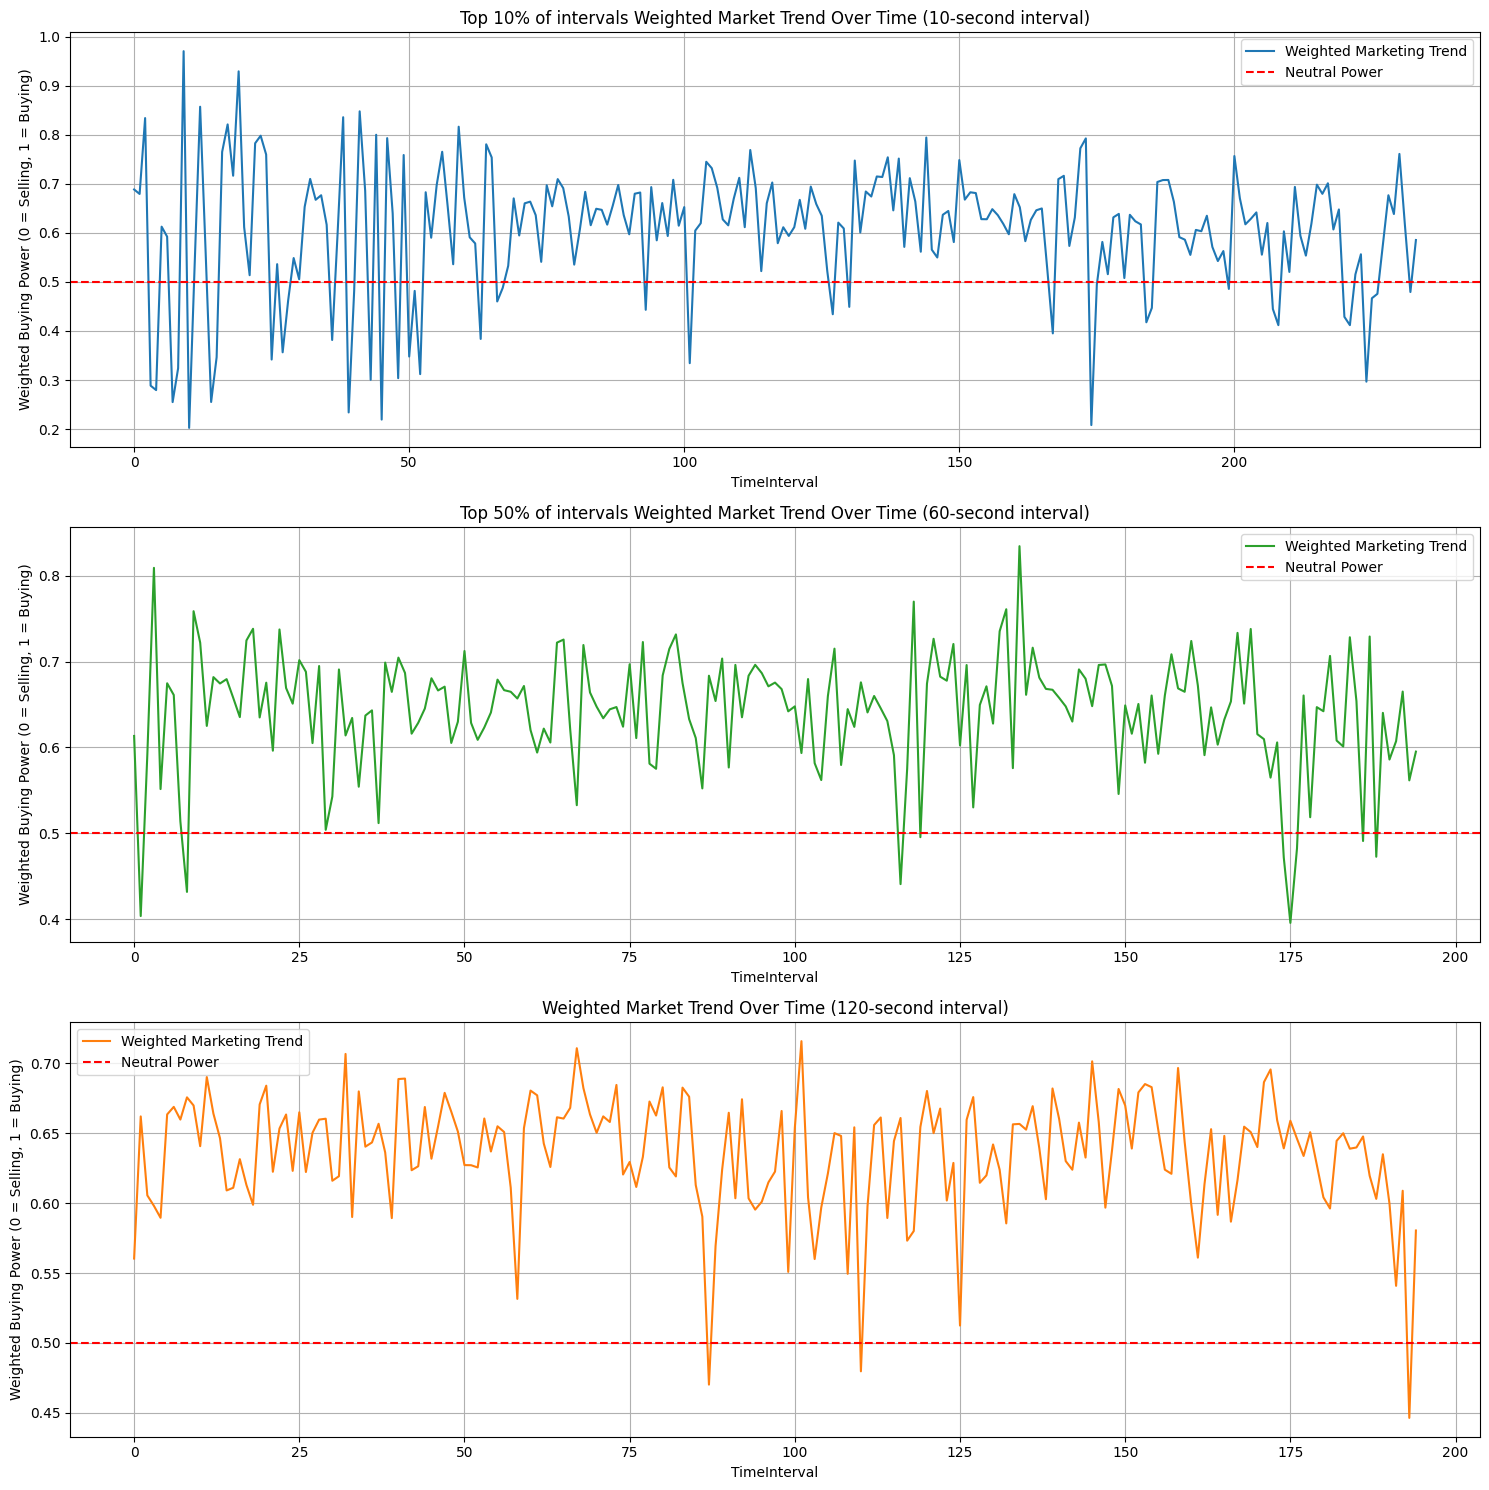

In [436]:
# Create a single figure
plt.figure(figsize=(15, 15))

# First subplot for 10-second interval
plt.subplot(3, 1, 1)
plt.plot(buying_power_weighted_10, label="Weighted Marketing Trend", color='tab:blue')
plt.axhline(0.5, color='red', linestyle='--', label='Neutral Power')
plt.xlabel('TimeInterval')
plt.ylabel('Weighted Buying Power (0 = Selling, 1 = Buying)')
plt.title('Top 10% of intervals Weighted Market Trend Over Time (10-second interval)')
plt.legend()
plt.grid(True)

# Second subplot for 60-second interval
plt.subplot(3, 1, 2)
plt.plot(buying_power_weighted_60, label="Weighted Marketing Trend", color='tab:green')
plt.axhline(0.5, color='red', linestyle='--', label='Neutral Power')
plt.xlabel('TimeInterval')
plt.ylabel('Weighted Buying Power (0 = Selling, 1 = Buying)')
plt.title('Top 50% of intervals Weighted Market Trend Over Time (60-second interval)')
plt.legend()
plt.grid(True)

# Third subplot for 120-second interval
plt.subplot(3, 1, 3)
plt.plot(buying_power_weighted_120, label="Weighted Marketing Trend", color='tab:orange')
plt.axhline(0.5, color='red', linestyle='--', label='Neutral Power')
plt.xlabel('TimeInterval')
plt.ylabel('Weighted Buying Power (0 = Selling, 1 = Buying)')
plt.title('Weighted Market Trend Over Time (120-second interval)')
plt.legend()
plt.grid(True)

# Adjust the layout to ensure the plots don't overlap
plt.tight_layout()

# Display the combined plot
plt.show()


#### Long holders dominates the markets

# Prediction of State 1 in example

# 1 Seconds top 1%

In [549]:
Observation_window_1= [34500,34734]
recall_window = 10

def predict_event_count_in_next_interval(t, dim_m, all_event_times, mu, alpha, beta):
    """
    Predict the number of events in the next interval using the current model parameters.

    Args:
    - t: The start of the current interval.
    - dim_m: The current state dimension.
    - all_event_times: All past event times for all states.
    - mu, alpha, beta: Current model parameters.

    Returns:
    - Predicted number of events in the next interval.
    """
    # Predict intensity over the interval [t, t+10] (assuming 10s intervals)
    time_points = np.linspace(t, t+1, 100)
    intensities = [intensity(time, dim_m, all_event_times, mu, alpha, beta) for time in time_points]
    
    # Integrate intensity over the interval to predict the expected number of events
    predicted_event_count = np.trapz(intensities, time_points)
    return predicted_event_count

# Rolling window prediction for state 1
interval_length_1 = 1 # Set the interval length to 10 seconds
predicted_counts_1 = []

# Use the already estimated parameters
mu_estimated = mus[0]
alpha_estimated = alphas_matrix[0]
beta_estimated = averaged_betas[0] 

# Iterate over intervals
for t in np.arange(Observation_window_1[0], Observation_window_1[1] - interval_length_1 * recall_window, interval_length_1):
    # Training data: past 20 intervals (200 seconds)
    training_times = state1_times[(state1_times >= t) & (state1_times < t + interval_length_1 * recall_window)]
    
    # Collect all past event times for prediction
    all_event_times_1 = [training_times, state3_times, state4_times, state6_times]  # Assuming you also want to use other states' times
    
    # Predict for the next interval
    prediction_1 = predict_event_count_in_next_interval(t + interval_length_1 * recall_window, 0, all_event_times_1, mu_estimated, alpha_estimated, beta_estimated)
    predicted_counts_1.append(prediction_1)

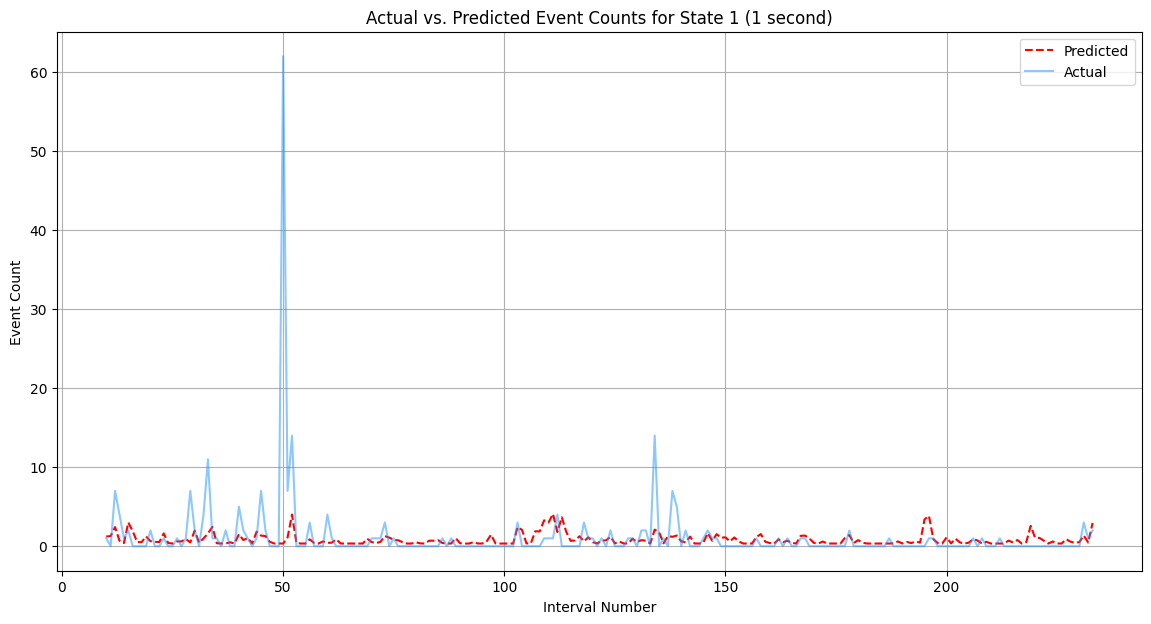

In [547]:
# Visualization:
def get_actual_counts(event_times, start_time, end_time, interval_length):
    counts = []
    for t in np.arange(start_time, end_time, interval_length):
        count = np.sum((event_times >= t) & (event_times < t + interval_length))
        counts.append(count)
    return counts

actual_counts_state1_1 = get_actual_counts(state1_times, Observation_window[0] + interval_length_1 * 10, Observation_window[1], interval_length_1)

min_length_1 = min(len(actual_counts_state1_1), len(predicted_counts_1))

plt.figure(figsize=(14, 7))
plt.plot(np.arange(recall_window, recall_window + min_length_1), predicted_counts_1[:min_length_1], label="Predicted", color="red", linestyle="--")
plt.plot(np.arange(recall_window, recall_window + min_length_1), actual_counts_state1_1[:min_length_1], label="Actual", color="dodgerblue",alpha=0.5)
plt.xlabel("Interval Number")
plt.ylabel("Event Count")
plt.legend()
plt.title("Actual vs. Predicted Event Counts for State 1 (1 second)")
plt.grid(True)
plt.show()


# 10 Seconds

Takes lots of time, only predict the first 10% of interval

In [437]:
Observation_window_10= [34200,36540]
T = Observation_window_10[1] - Observation_window_10[0]
recall_window = 10

def predict_event_count_in_next_interval(t, dim_m, all_event_times, mu, alpha, beta):
    """
    Predict the number of events in the next interval using the current model parameters.

    Args:
    - t: The start of the current interval.
    - dim_m: The current state dimension.
    - all_event_times: All past event times for all states.
    - mu, alpha, beta: Current model parameters.

    Returns:
    - Predicted number of events in the next interval.
    """
    # Predict intensity over the interval [t, t+10] (assuming 10s intervals)
    time_points = np.linspace(t, t+10, 100)
    intensities = [intensity(time, dim_m, all_event_times, mu, alpha, beta) for time in time_points]
    
    # Integrate intensity over the interval to predict the expected number of events
    predicted_event_count = np.trapz(intensities, time_points)
    return predicted_event_count

# Rolling window prediction for state 1
interval_length_10 = 10  # Set the interval length to 10 seconds
predicted_counts_10 = []

# Use the already estimated parameters
mu_estimated = mus[0]
alpha_estimated = alphas_matrix[0]
beta_estimated = averaged_betas[0] 

# Iterate over intervals
for t in np.arange(Observation_window_10[0], Observation_window_10[1] - interval_length_10 * recall_window, interval_length_10):
    # Training data: past 20 intervals (200 seconds)
    training_times = state1_times[(state1_times >= t) & (state1_times < t + interval_length_10 * recall_window)]
    
    # Collect all past event times for prediction
    all_event_times_1 = [training_times, state3_times, state4_times, state6_times]  # Assuming you also want to use other states' times
    
    # Predict for the next interval
    prediction_10 = predict_event_count_in_next_interval(t + interval_length_10 * recall_window, 0, all_event_times_1, mu_estimated, alpha_estimated, beta_estimated)
    predicted_counts_10.append(prediction_10)


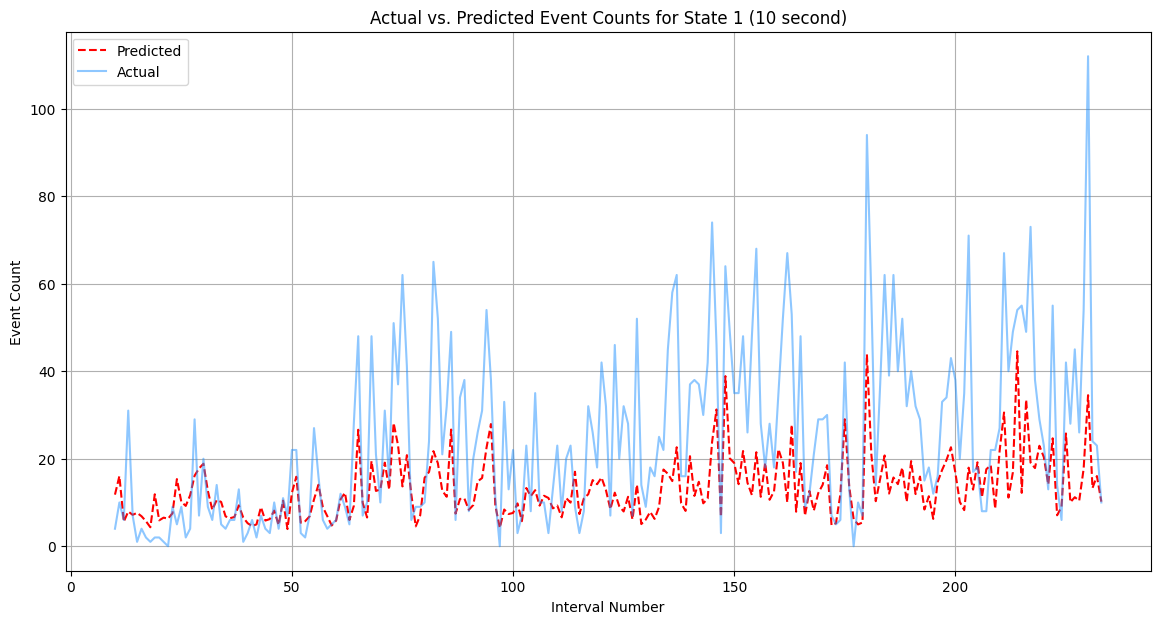

In [526]:
# Visualization:
def get_actual_counts(event_times, start_time, end_time, interval_length):
    counts = []
    for t in np.arange(start_time, end_time, interval_length):
        count = np.sum((event_times >= t) & (event_times < t + interval_length))
        counts.append(count)
    return counts

actual_counts_state1_10 = get_actual_counts(state1_times, Observation_window[0] + interval_length_10 * 10, Observation_window[1], interval_length_10)

min_length_10 = min(len(actual_counts_state1_10), len(predicted_counts_10))

plt.figure(figsize=(14, 7))
plt.plot(np.arange(recall_window, recall_window + min_length_10), predicted_counts_10[:min_length_10], label="Predicted", color="red", linestyle="--")
plt.plot(np.arange(recall_window, recall_window + min_length_10), actual_counts_state1_10[:min_length_10], label="Actual", color="dodgerblue",alpha=0.5)
plt.xlabel("Interval Number")
plt.ylabel("Event Count")
plt.legend()
plt.title("Actual vs. Predicted Event Counts for State 1 (10 second)")
plt.grid(True)
plt.show()


# 60 Seconds

In [443]:
Observation_window_60 = [34200,45900]
T = Observation_window_60[1] - Observation_window_60[0]

def predict_event_count_in_next_interval(t, dim_m, all_event_times, mu, alpha, beta):
    """
    Predict the number of events in the next interval using the current model parameters.

    Args:
    - t: The start of the current interval.
    - dim_m: The current state dimension.
    - all_event_times: All past event times for all states.
    - mu, alpha, beta: Current model parameters.

    Returns:
    - Predicted number of events in the next interval.
    """
    # Predict intensity over the interval [t, t+60] (assuming 60s intervals)
    time_points = np.linspace(t, t+60, 100)
    intensities = [intensity(time, dim_m, all_event_times, mu, alpha, beta) for time in time_points]
    
    # Integrate intensity over the interval to predict the expected number of events
    predicted_event_count = np.trapz(intensities, time_points)
    return predicted_event_count

# Rolling window prediction for state 1
interval_length_60 = 60
predicted_counts_60 = []

# Use the already estimated parameters
mu_estimated = mus[0]
alpha_estimated = alphas_matrix[0]
beta_estimated = averaged_betas[0]  # I'm assuming you still want to use the averaged beta

# Iterate over intervals
for t in np.arange(Observation_window_60[0], Observation_window_60[1] - interval_length_60 * recall_window, interval_length_60):
    # Training data: past 20 intervals
    training_times = state1_times[(state1_times >= t) & (state1_times < t + interval_length_60 * recall_window)]
    
    # Collect all past event times for prediction
    all_event_times_1 = [training_times, state3_times, state4_times, state6_times]  # Assuming you also want to use other states' times
    
    # Predict for the next interval
    prediction_60 = predict_event_count_in_next_interval(t + interval_length_60 * recall_window, 0, all_event_times_1, mu_estimated, alpha_estimated, beta_estimated)
    predicted_counts_60.append(prediction_60)


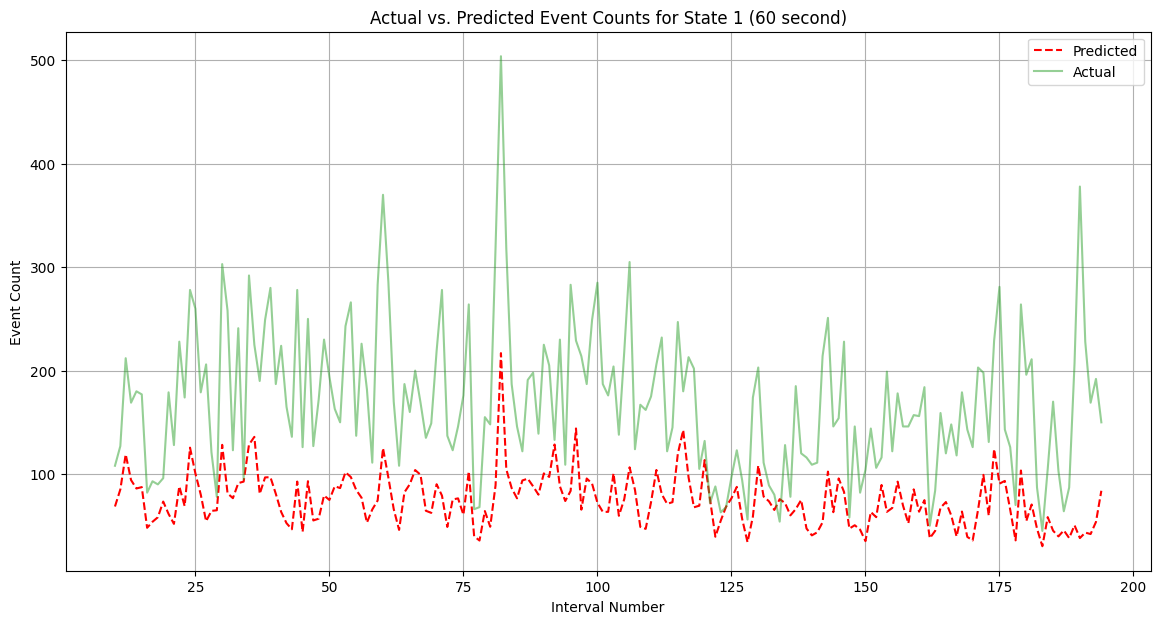

In [525]:
# Visualization:
def get_actual_counts(event_times, start_time, end_time, interval_length):
    counts = []
    for t in np.arange(start_time, end_time, interval_length):
        count = np.sum((event_times >= t) & (event_times < t + interval_length))
        counts.append(count)
    return counts

actual_counts_state1_60 = get_actual_counts(state1_times, Observation_window[0] + interval_length_60 * 10, Observation_window[1], interval_length_60)

min_length_60 = min(len(actual_counts_state1_60), len(predicted_counts_60))

plt.figure(figsize=(14, 7))
plt.plot(np.arange(recall_window, recall_window + min_length_60), predicted_counts_60[:min_length_60], label="Predicted", color="red", linestyle="--")
plt.plot(np.arange(recall_window, recall_window + min_length_60), actual_counts_state1_60[:min_length_60], label="Actual", color="tab:green", alpha=0.5)
plt.xlabel("Interval Number")
plt.ylabel("Event Count")
plt.legend()
plt.title("Actual vs. Predicted Event Counts for State 1 (60 second)")
plt.grid(True)
plt.show()


# 120 Seconds

In [445]:
Observation_window = [34200,57600]
T = Observation_window[1] - Observation_window[0]

def predict_event_count_in_next_interval(t, dim_m, all_event_times, mu, alpha, beta):
    """
    Predict the number of events in the next interval using the current model parameters.

    Args:
    - t: The start of the current interval.
    - dim_m: The current state dimension.
    - all_event_times: All past event times for all states.
    - mu, alpha, beta: Current model parameters.

    Returns:
    - Predicted number of events in the next interval.
    """
    # Predict intensity over the interval [t, t+60] (assuming 60s intervals)
    time_points = np.linspace(t, t+120, 100)
    intensities = [intensity(time, dim_m, all_event_times, mu, alpha, beta) for time in time_points]
    
    # Integrate intensity over the interval to predict the expected number of events
    predicted_event_count = np.trapz(intensities, time_points)
    return predicted_event_count

# Rolling window prediction for state 1
interval_length_120 = 120
predicted_counts_120 = []

# Use the already estimated parameters
mu_estimated = mus[0]
alpha_estimated = alphas_matrix[0]
beta_estimated = averaged_betas[0]  # I'm assuming you still want to use the averaged beta

# Iterate over intervals
for t in np.arange(Observation_window[0], Observation_window[1] - interval_length_120 * recall_window, interval_length_120):
    # Training data: past 20 intervals
    training_times = state1_times[(state1_times >= t) & (state1_times < t + interval_length_120 * recall_window)]
    
    # Collect all past event times for prediction
    all_event_times_1 = [training_times, state3_times, state4_times, state6_times]  # Assuming you also want to use other states' times
    
    # Predict for the next interval
    prediction = predict_event_count_in_next_interval(t + interval_length_120 * recall_window, 0, all_event_times_1, mu_estimated, alpha_estimated, beta_estimated)
    predicted_counts_120.append(prediction)


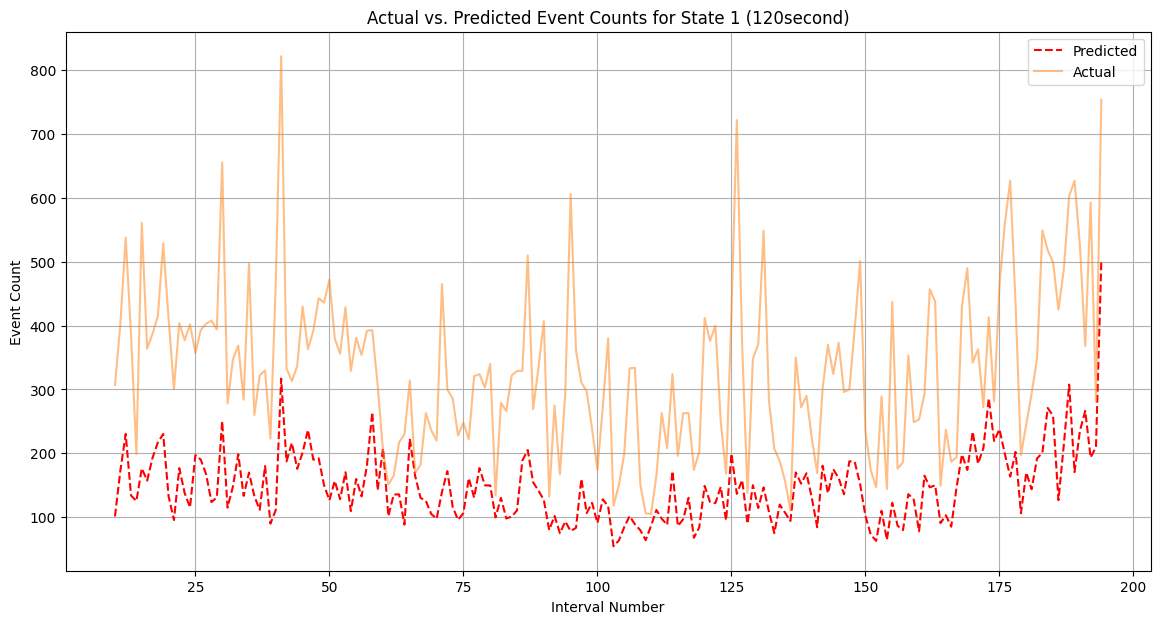

In [524]:
# Visualization
def get_actual_counts(event_times, start_time, end_time, interval_length):
    counts = []
    for t in np.arange(start_time, end_time, interval_length):
        count = np.sum((event_times >= t) & (event_times < t + interval_length))
        counts.append(count)
    return counts

actual_counts_state1_120 = get_actual_counts(state1_times, Observation_window[0] + interval_length_120 * 10, Observation_window[1], interval_length_120)

min_length_120 = min(len(actual_counts_state1_120), len(predicted_counts_120))

plt.figure(figsize=(14, 7))
plt.plot(np.arange(recall_window, recall_window + min_length_120), predicted_counts_120[:min_length_120], label="Predicted", color="red", linestyle="--")
plt.plot(np.arange(recall_window, recall_window + min_length_120), actual_counts_state1_120[:min_length_120], label="Actual", color="tab:orange", alpha =0.5)
plt.xlabel("Interval Number")
plt.ylabel("Event Count")
plt.legend()
plt.title("Actual vs. Predicted Event Counts for State 1 (120second)")
plt.grid(True)
plt.show()

# Prediction Evaluation

# 1S

In [548]:
from sklearn.metrics import mean_squared_error

# Use only the matched lengths for the two arrays
rmse = np.sqrt(mean_squared_error(actual_counts_state1_1[:min_length_1], predicted_counts_1[:min_length_1]))
print(f"Root Mean Square Error (RMSE) for State 1 predictions: {rmse:.2f}")
from statsmodels.tsa.arima.model import ARIMA
# Fit AR(4) model
model_ar = ARIMA(actual_counts_state1_1, order=(4,0,0))
model_ar_fit = model_ar.fit()
# Generate predictions
predictions_ar = model_ar_fit.forecast(steps=min_length_1)

# Compute RMSE for AR(4)
rmse_ar = np.sqrt(mean_squared_error(actual_counts_state1_1[:min_length_1], predictions_ar[:min_length_1]))
print(f"Root Mean Square Error (RMSE) for AR(4) predictions: {rmse_ar:.2f}")
# Fit MA(4) model
model_ma = ARIMA(actual_counts_state1_1, order=(0,0,4))
model_ma_fit = model_ma.fit()

# Generate predictions
predictions_ma = model_ma_fit.forecast(steps=min_length_1)

# Compute RMSE for MA(4)
rmse_ma = np.sqrt(mean_squared_error(actual_counts_state1_1[:min_length_1], predictions_ma[:min_length_1]))
print(f"Root Mean Square Error (RMSE) for MA(4) predictions: {rmse_ma:.2f}")

# Fit ARIMA(4,0,4) model
model_arima = ARIMA(actual_counts_state1_1, order=(4,0,4))
model_arima_fit = model_arima.fit()

# Generate predictions
predictions_arima = model_arima_fit.forecast(steps=min_length_1)

# Compute RMSE for ARIMA(4,0,4)
rmse_arima = np.sqrt(mean_squared_error(actual_counts_state1_1[:min_length_1], predictions_arima[:min_length_1]))
print(f"Root Mean Square Error (RMSE) for ARIMA(4,0,4) predictions: {rmse_arima:.2f}")



Root Mean Square Error (RMSE) for State 1 predictions: 4.50
Root Mean Square Error (RMSE) for AR(4) predictions: 4.82
Root Mean Square Error (RMSE) for MA(4) predictions: 4.81


d:\Anaconda3\envs\dl\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Root Mean Square Error (RMSE) for ARIMA(4,0,4) predictions: 5.41


# 10S

In [447]:
from sklearn.metrics import mean_squared_error

# Use only the matched lengths for the two arrays
rmse = np.sqrt(mean_squared_error(actual_counts_state1_10[:min_length_10], predicted_counts_10[:min_length_10]))
print(f"Root Mean Square Error (RMSE) for State 1 predictions: {rmse:.2f}")
from statsmodels.tsa.arima.model import ARIMA
# Fit AR(4) model
model_ar = ARIMA(actual_counts_state1_10, order=(4,0,0))
model_ar_fit = model_ar.fit()
# Generate predictions
predictions_ar = model_ar_fit.forecast(steps=min_length_10)

# Compute RMSE for AR(4)
rmse_ar = np.sqrt(mean_squared_error(actual_counts_state1_10[:min_length_10], predictions_ar[:min_length_10]))
print(f"Root Mean Square Error (RMSE) for AR(4) predictions: {rmse_ar:.2f}")
# Fit MA(4) model
model_ma = ARIMA(actual_counts_state1_10, order=(0,0,4))
model_ma_fit = model_ma.fit()

# Generate predictions
predictions_ma = model_ma_fit.forecast(steps=min_length_10)

# Compute RMSE for MA(4)
rmse_ma = np.sqrt(mean_squared_error(actual_counts_state1_10[:min_length_10], predictions_ma[:min_length_10]))
print(f"Root Mean Square Error (RMSE) for MA(4) predictions: {rmse_ma:.2f}")

# Fit ARIMA(4,0,4) model
model_arima = ARIMA(actual_counts_state1_10, order=(4,0,4))
model_arima_fit = model_arima.fit()

# Generate predictions
predictions_arima = model_arima_fit.forecast(steps=min_length_10)

# Compute RMSE for ARIMA(4,0,4)
rmse_arima = np.sqrt(mean_squared_error(actual_counts_state1_10[:min_length_10], predictions_arima[:min_length_10]))
print(f"Root Mean Square Error (RMSE) for ARIMA(4,0,4) predictions: {rmse_arima:.2f}")



Root Mean Square Error (RMSE) for State 1 predictions: 19.24
Root Mean Square Error (RMSE) for AR(4) predictions: 20.76
Root Mean Square Error (RMSE) for MA(4) predictions: 20.28
Root Mean Square Error (RMSE) for ARIMA(4,0,4) predictions: 22.68


# 60S

In [448]:
from sklearn.metrics import mean_squared_error

# Use only the matched lengths for the two arrays
rmse = np.sqrt(mean_squared_error(actual_counts_state1_60[:min_length_60], predicted_counts_60[:min_length_60]))
print(f"Root Mean Square Error (RMSE) for State 1 predictions: {rmse:.2f}")
from statsmodels.tsa.arima.model import ARIMA
# Fit AR(4) model
model_ar = ARIMA(actual_counts_state1_60, order=(4,0,0))
model_ar_fit = model_ar.fit()
# Generate predictions
predictions_ar = model_ar_fit.forecast(steps=min_length_60)

# Compute RMSE for AR(4)
rmse_ar = np.sqrt(mean_squared_error(actual_counts_state1_60[:min_length_60], predictions_ar[:min_length_60]))
print(f"Root Mean Square Error (RMSE) for AR(4) predictions: {rmse_ar:.2f}")
# Fit MA(4) model
model_ma = ARIMA(actual_counts_state1_60, order=(0,0,4))
model_ma_fit = model_ma.fit()

# Generate predictions
predictions_ma = model_ma_fit.forecast(steps=min_length_60)

# Compute RMSE for MA(4)
rmse_ma = np.sqrt(mean_squared_error(actual_counts_state1_60[:min_length_60], predictions_ma[:min_length_60]))
print(f"Root Mean Square Error (RMSE) for MA(4) predictions: {rmse_ma:.2f}")

# Fit ARIMA(4,0,4) model
model_arima = ARIMA(actual_counts_state1_60, order=(4,0,4))
model_arima_fit = model_arima.fit()

# Generate predictions
predictions_arima = model_arima_fit.forecast(steps=min_length_60)

# Compute RMSE for ARIMA(4,0,4)
rmse_arima = np.sqrt(mean_squared_error(actual_counts_state1_60[:min_length_60], predictions_arima[:min_length_60]))
print(f"Root Mean Square Error (RMSE) for ARIMA(4,0,4) predictions: {rmse_arima:.2f}")



Root Mean Square Error (RMSE) for State 1 predictions: 111.80
Root Mean Square Error (RMSE) for AR(4) predictions: 72.88
Root Mean Square Error (RMSE) for MA(4) predictions: 73.18


d:\Anaconda3\envs\dl\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\Anaconda3\envs\dl\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Root Mean Square Error (RMSE) for ARIMA(4,0,4) predictions: 74.21


d:\Anaconda3\envs\dl\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# 120S

In [449]:
from sklearn.metrics import mean_squared_error

# Use only the matched lengths for the two arrays
rmse = np.sqrt(mean_squared_error(actual_counts_state1_120[:min_length_120], predicted_counts_120[:min_length_120]))
print(f"Root Mean Square Error (RMSE) for State 1 predictions: {rmse:.2f}")
from statsmodels.tsa.arima.model import ARIMA
# Fit AR(4) model
model_ar = ARIMA(actual_counts_state1_120, order=(4,0,0))
model_ar_fit = model_ar.fit()
# Generate predictions
predictions_ar = model_ar_fit.forecast(steps=min_length_120)

# Compute RMSE for AR(4)
rmse_ar = np.sqrt(mean_squared_error(actual_counts_state1_120[:min_length_120], predictions_ar[:min_length_120]))
print(f"Root Mean Square Error (RMSE) for AR(4) predictions: {rmse_ar:.2f}")
# Fit MA(4) model
model_ma = ARIMA(actual_counts_state1_120, order=(0,0,4))
model_ma_fit = model_ma.fit()

# Generate predictions
predictions_ma = model_ma_fit.forecast(steps=min_length_120)

# Compute RMSE for MA(4)
rmse_ma = np.sqrt(mean_squared_error(actual_counts_state1_120[:min_length_120], predictions_ma[:min_length_120]))
print(f"Root Mean Square Error (RMSE) for MA(4) predictions: {rmse_ma:.2f}")

# Fit ARIMA(4,0,4) model
model_arima = ARIMA(actual_counts_state1_120, order=(4,0,4))
model_arima_fit = model_arima.fit()

# Generate predictions
predictions_arima = model_arima_fit.forecast(steps=min_length_120)

# Compute RMSE for ARIMA(4,0,4)
rmse_arima = np.sqrt(mean_squared_error(actual_counts_state1_120[:min_length_120], predictions_arima[:min_length_120]))
print(f"Root Mean Square Error (RMSE) for ARIMA(4,0,4) predictions: {rmse_arima:.2f}")



Root Mean Square Error (RMSE) for State 1 predictions: 94.83
Root Mean Square Error (RMSE) for AR(4) predictions: 72.88
Root Mean Square Error (RMSE) for MA(4) predictions: 73.18


d:\Anaconda3\envs\dl\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\Anaconda3\envs\dl\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Root Mean Square Error (RMSE) for ARIMA(4,0,4) predictions: 74.21


d:\Anaconda3\envs\dl\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Prediction Market Trend

### 10 seconds State 3, 4, 6 in proceed

State 3

In [454]:

def predict_event_count_in_next_interval(t, dim_m, all_event_times, mu, alpha, beta):
    """
    Predict the number of events in the next interval using the current model parameters.

    Args:
    - t: The start of the current interval.
    - dim_m: The current state dimension.
    - all_event_times: All past event times for all states.
    - mu, alpha, beta: Current model parameters.

    Returns:
    - Predicted number of events in the next interval.
    """
    # Predict intensity over the interval [t, t+10] (assuming 10s intervals)
    time_points = np.linspace(t, t+10, 100)
    intensities = [intensity(time, dim_m, all_event_times, mu, alpha, beta) for time in time_points]
    
    # Integrate intensity over the interval to predict the expected number of events
    predicted_event_count = np.trapz(intensities, time_points)
    return predicted_event_count

# Rolling window prediction for state 1
interval_length_10 = 10  # Set the interval length to 10 seconds
predicted_counts_10_state3 = []

# Use the already estimated parameters
mu_estimated = mus[1]
alpha_estimated = alphas_matrix[1]
beta_estimated = averaged_betas[1] 

# Iterate over intervals
for t in np.arange(Observation_window_10[0], Observation_window_10[1] - interval_length_10 * recall_window, interval_length_10):
    # Training data: past 20 intervals (200 seconds)
    training_times = state3_times[(state3_times >= t) & (state3_times < t + interval_length_10 * recall_window)]
    
    # Collect all past event times for prediction
    all_event_times = [state1_times, training_times, state4_times, state6_times]  # Assuming you also want to use other states' times
    
    # Predict for the next interval
    prediction_10_state3 = predict_event_count_in_next_interval(t + interval_length_10 * recall_window, 1, all_event_times, mu_estimated, alpha_estimated, beta_estimated)
    predicted_counts_10_state3.append(prediction_10_state3)


state 4

In [455]:
Observation_window = [34200,57600]
T = Observation_window[1] - Observation_window[0]
recall_window = 10

def predict_event_count_in_next_interval(t, dim_m, all_event_times, mu, alpha, beta):
    """
    Predict the number of events in the next interval using the current model parameters.

    Args:
    - t: The start of the current interval.
    - dim_m: The current state dimension.
    - all_event_times: All past event times for all states.
    - mu, alpha, beta: Current model parameters.

    Returns:
    - Predicted number of events in the next interval.
    """
    # Predict intensity over the interval [t, t+10] (assuming 10s intervals)
    time_points = np.linspace(t, t+10, 100)
    intensities = [intensity(time, dim_m, all_event_times, mu, alpha, beta) for time in time_points]
    
    # Integrate intensity over the interval to predict the expected number of events
    predicted_event_count = np.trapz(intensities, time_points)
    return predicted_event_count

# Rolling window prediction for state 1
interval_length_10 = 10  # Set the interval length to 10 seconds
predicted_counts_10_state4 = []

# Use the already estimated parameters
mu_estimated = mus[2]
alpha_estimated = alphas_matrix[2]
beta_estimated = averaged_betas[2] 

# Iterate over intervals
for t in np.arange(Observation_window_10[0], Observation_window_10[1] - interval_length_10 * recall_window, interval_length_10):
    # Training data: past 20 intervals (200 seconds)
    training_times = state4_times[(state4_times >= t) & (state4_times < t + interval_length_10 * recall_window)]
    
    # Collect all past event times for prediction
    all_event_times = [state1_times, state3_times, training_times, state6_times]  # Assuming you also want to use other states' times
    
    # Predict for the next interval
    prediction_10_state4 = predict_event_count_in_next_interval(t + interval_length_10 * recall_window, 2, all_event_times, mu_estimated, alpha_estimated, beta_estimated)
    predicted_counts_10_state4.append(prediction_10_state4)


State 6

In [456]:
Observation_window = [34200,57600]
T = Observation_window[1] - Observation_window[0]
recall_window = 10

def predict_event_count_in_next_interval(t, dim_m, all_event_times, mu, alpha, beta):
    """
    Predict the number of events in the next interval using the current model parameters.

    Args:
    - t: The start of the current interval.
    - dim_m: The current state dimension.
    - all_event_times: All past event times for all states.
    - mu, alpha, beta: Current model parameters.

    Returns:
    - Predicted number of events in the next interval.
    """
    # Predict intensity over the interval [t, t+10] (assuming 10s intervals)
    time_points = np.linspace(t, t+10, 100)
    intensities = [intensity(time, dim_m, all_event_times, mu, alpha, beta) for time in time_points]
    
    # Integrate intensity over the interval to predict the expected number of events
    predicted_event_count = np.trapz(intensities, time_points)
    return predicted_event_count

# Rolling window prediction for state 1
interval_length_10 = 10  # Set the interval length to 10 seconds
predicted_counts_10_state6 = []

# Use the already estimated parameters
mu_estimated = mus[3]
alpha_estimated = alphas_matrix[3]
beta_estimated = averaged_betas[3] 

# Iterate over intervals
for t in np.arange(Observation_window_10[0], Observation_window_10[1] - interval_length_10 * recall_window, interval_length_10):
    # Training data: past 20 intervals (200 seconds)
    training_times = state6_times[(state6_times >= t) & (state6_times < t + interval_length_10 * recall_window)]
    
    # Collect all past event times for prediction
    all_event_times = [state1_times, state3_times, state4_times, training_times]  # Assuming you also want to use other states' times
    
    # Predict for the next interval
    prediction_10_state6 = predict_event_count_in_next_interval(t + interval_length_10 * recall_window, 3, all_event_times, mu_estimated, alpha_estimated, beta_estimated)
    predicted_counts_10_state6.append(prediction_10_state6)


### 60 seconds State 3, 4, 6 in proceed

In [457]:
Observation_window = [34200,57600]
T = Observation_window[1] - Observation_window[0]

def predict_event_count_in_next_interval(t, dim_m, all_event_times, mu, alpha, beta):
    """
    Predict the number of events in the next interval using the current model parameters.

    Args:
    - t: The start of the current interval.
    - dim_m: The current state dimension.
    - all_event_times: All past event times for all states.
    - mu, alpha, beta: Current model parameters.

    Returns:
    - Predicted number of events in the next interval.
    """
    # Predict intensity over the interval [t, t+60] (assuming 60s intervals)
    time_points = np.linspace(t, t+60, 100)
    intensities = [intensity(time, dim_m, all_event_times, mu, alpha, beta) for time in time_points]
    
    # Integrate intensity over the interval to predict the expected number of events
    predicted_event_count = np.trapz(intensities, time_points)
    return predicted_event_count

# Rolling window prediction for state 1
interval_length_60 = 60
predicted_counts_60_state3 = []

# Use the already estimated parameters
mu_estimated = mus[1]
alpha_estimated = alphas_matrix[1]
beta_estimated = averaged_betas[1]  # I'm assuming you still want to use the averaged beta

# Iterate over intervals
for t in np.arange(Observation_window_60[0], Observation_window_60[1] - interval_length_60 * recall_window, interval_length_60):
    # Training data: past 20 intervals
    training_times = state3_times[(state3_times >= t) & (state3_times < t + interval_length_60 * recall_window)]
    
    # Collect all past event times for prediction
    all_event_times = [state1_times, training_times, state4_times, state6_times]  # Assuming you also want to use other states' times
    
    # Predict for the next interval
    prediction_60_state3 = predict_event_count_in_next_interval(t + interval_length_60 * recall_window, 1, all_event_times, mu_estimated, alpha_estimated, beta_estimated)
    predicted_counts_60_state3.append(prediction_60_state3)


In [458]:
Observation_window = [34200,57600]
T = Observation_window[1] - Observation_window[0]

def predict_event_count_in_next_interval(t, dim_m, all_event_times, mu, alpha, beta):
    """
    Predict the number of events in the next interval using the current model parameters.

    Args:
    - t: The start of the current interval.
    - dim_m: The current state dimension.
    - all_event_times: All past event times for all states.
    - mu, alpha, beta: Current model parameters.

    Returns:
    - Predicted number of events in the next interval.
    """
    # Predict intensity over the interval [t, t+60] (assuming 60s intervals)
    time_points = np.linspace(t, t+60, 100)
    intensities = [intensity(time, dim_m, all_event_times, mu, alpha, beta) for time in time_points]
    
    # Integrate intensity over the interval to predict the expected number of events
    predicted_event_count = np.trapz(intensities, time_points)
    return predicted_event_count

# Rolling window prediction for state 1
interval_length_60 = 60
predicted_counts_60_state4 = []

# Use the already estimated parameters
mu_estimated = mus[2]
alpha_estimated = alphas_matrix[2]
beta_estimated = averaged_betas[2]  # I'm assuming you still want to use the averaged beta

# Iterate over intervals
for t in np.arange(Observation_window_60[0], Observation_window_60[1] - interval_length_60 * recall_window, interval_length_60):
    # Training data: past 20 intervals
    training_times = state4_times[(state4_times >= t) & (state4_times < t + interval_length_60 * recall_window)]
    
    # Collect all past event times for prediction
    all_event_times = [state1_times, state3_times, training_times, state6_times]  # Assuming you also want to use other states' times
    
    # Predict for the next interval
    prediction_60_state4 = predict_event_count_in_next_interval(t + interval_length_60 * recall_window, 2, all_event_times, mu_estimated, alpha_estimated, beta_estimated)
    predicted_counts_60_state4.append(prediction_60_state4)


In [459]:
Observation_window = [34200,57600]
T = Observation_window[1] - Observation_window[0]

def predict_event_count_in_next_interval(t, dim_m, all_event_times, mu, alpha, beta):
    """
    Predict the number of events in the next interval using the current model parameters.

    Args:
    - t: The start of the current interval.
    - dim_m: The current state dimension.
    - all_event_times: All past event times for all states.
    - mu, alpha, beta: Current model parameters.

    Returns:
    - Predicted number of events in the next interval.
    """
    # Predict intensity over the interval [t, t+60] (assuming 60s intervals)
    time_points = np.linspace(t, t+60, 100)
    intensities = [intensity(time, dim_m, all_event_times, mu, alpha, beta) for time in time_points]
    
    # Integrate intensity over the interval to predict the expected number of events
    predicted_event_count = np.trapz(intensities, time_points)
    return predicted_event_count

# Rolling window prediction for state 1
interval_length_60 = 60
predicted_counts_60_state6 = []

# Use the already estimated parameters
mu_estimated = mus[3]
alpha_estimated = alphas_matrix[3]
beta_estimated = averaged_betas[3]  # I'm assuming you still want to use the averaged beta

# Iterate over intervals
for t in np.arange(Observation_window_60[0], Observation_window_60[1] - interval_length_60 * recall_window, interval_length_60):
    # Training data: past 20 intervals
    training_times = state6_times[(state6_times >= t) & (state6_times < t + interval_length_60 * recall_window)]
    
    # Collect all past event times for prediction
    all_event_times = [state1_times, state3_times, state4_times, training_times]  # Assuming you also want to use other states' times
    
    # Predict for the next interval
    prediction_60_state6 = predict_event_count_in_next_interval(t + interval_length_60 * recall_window, 3, all_event_times, mu_estimated, alpha_estimated, beta_estimated)
    predicted_counts_60_state6.append(prediction_60_state6)


### 120 seconds State 3, 4, 6 in proceed

In [461]:
Observation_window = [34200,57600]
T = Observation_window[1] - Observation_window[0]

def predict_event_count_in_next_interval(t, dim_m, all_event_times, mu, alpha, beta):
    """
    Predict the number of events in the next interval using the current model parameters.

    Args:
    - t: The start of the current interval.
    - dim_m: The current state dimension.
    - all_event_times: All past event times for all states.
    - mu, alpha, beta: Current model parameters.

    Returns:
    - Predicted number of events in the next interval.
    """
    # Predict intensity over the interval [t, t+60] (assuming 60s intervals)
    time_points = np.linspace(t, t+120, 100)
    intensities = [intensity(time, dim_m, all_event_times, mu, alpha, beta) for time in time_points]
    
    # Integrate intensity over the interval to predict the expected number of events
    predicted_event_count = np.trapz(intensities, time_points)
    return predicted_event_count

# Rolling window prediction for state 1
interval_length_120 = 120
predicted_counts_120_state3 = []

# Use the already estimated parameters
mu_estimated = mus[1]
alpha_estimated = alphas_matrix[1]
beta_estimated = averaged_betas[1]  # I'm assuming you still want to use the averaged beta

# Iterate over intervals
for t in np.arange(Observation_window[0], Observation_window[1] - interval_length_120 * recall_window, interval_length_120):
    # Training data: past 20 intervals
    training_times = state3_times[(state3_times >= t) & (state3_times < t + interval_length_120 * recall_window)]
    
    # Collect all past event times for prediction
    all_event_times = [state1_times, training_times, state4_times, state6_times]  # Assuming you also want to use other states' times
    
    # Predict for the next interval
    prediction_state3 = predict_event_count_in_next_interval(t + interval_length_120 * recall_window, 1, all_event_times, mu_estimated, alpha_estimated, beta_estimated)
    predicted_counts_120_state3.append(prediction_state3)


In [462]:
Observation_window = [34200,57600]
T = Observation_window[1] - Observation_window[0]

def predict_event_count_in_next_interval(t, dim_m, all_event_times, mu, alpha, beta):
    """
    Predict the number of events in the next interval using the current model parameters.

    Args:
    - t: The start of the current interval.
    - dim_m: The current state dimension.
    - all_event_times: All past event times for all states.
    - mu, alpha, beta: Current model parameters.

    Returns:
    - Predicted number of events in the next interval.
    """
    # Predict intensity over the interval [t, t+60] (assuming 60s intervals)
    time_points = np.linspace(t, t+120, 100)
    intensities = [intensity(time, dim_m, all_event_times, mu, alpha, beta) for time in time_points]
    
    # Integrate intensity over the interval to predict the expected number of events
    predicted_event_count = np.trapz(intensities, time_points)
    return predicted_event_count

# Rolling window prediction for state 1
interval_length_120 = 120
predicted_counts_120_state4 = []

# Use the already estimated parameters
mu_estimated = mus[2]
alpha_estimated = alphas_matrix[2]
beta_estimated = averaged_betas[2]  # I'm assuming you still want to use the averaged beta

# Iterate over intervals
for t in np.arange(Observation_window[0], Observation_window[1] - interval_length_120 * recall_window, interval_length_120):
    # Training data: past 20 intervals
    training_times = state4_times[(state4_times >= t) & (state4_times < t + interval_length_120 * recall_window)]
    
    # Collect all past event times for prediction
    all_event_times = [state1_times, state3_times, training_times, state6_times]  # Assuming you also want to use other states' times
    
    # Predict for the next interval
    prediction_state4 = predict_event_count_in_next_interval(t + interval_length_120 * recall_window, 2, all_event_times, mu_estimated, alpha_estimated, beta_estimated)
    predicted_counts_120_state4.append(prediction_state4)


In [463]:
Observation_window = [34200,57600]
T = Observation_window[1] - Observation_window[0]

def predict_event_count_in_next_interval(t, dim_m, all_event_times, mu, alpha, beta):
    """
    Predict the number of events in the next interval using the current model parameters.

    Args:
    - t: The start of the current interval.
    - dim_m: The current state dimension.
    - all_event_times: All past event times for all states.
    - mu, alpha, beta: Current model parameters.

    Returns:
    - Predicted number of events in the next interval.
    """
    # Predict intensity over the interval [t, t+60] (assuming 60s intervals)
    time_points = np.linspace(t, t+120, 100)
    intensities = [intensity(time, dim_m, all_event_times, mu, alpha, beta) for time in time_points]
    
    # Integrate intensity over the interval to predict the expected number of events
    predicted_event_count = np.trapz(intensities, time_points)
    return predicted_event_count

# Rolling window prediction for state 1
interval_length_120 = 120
predicted_counts_120_state6 = []

# Use the already estimated parameters
mu_estimated = mus[3]
alpha_estimated = alphas_matrix[3]
beta_estimated = averaged_betas[3]  # I'm assuming you still want to use the averaged beta

# Iterate over intervals
for t in np.arange(Observation_window[0], Observation_window[1] - interval_length_120 * recall_window, interval_length_120):
    # Training data: past 20 intervals
    training_times = state6_times[(state6_times >= t) & (state6_times < t + interval_length_120 * recall_window)]
    
    # Collect all past event times for prediction
    all_event_times = [state1_times, state3_times, state4_times, training_times]  # Assuming you also want to use other states' times
    
    # Predict for the next interval
    prediction_state6 = predict_event_count_in_next_interval(t + interval_length_120 * recall_window, 3, all_event_times, mu_estimated, alpha_estimated, beta_estimated)
    predicted_counts_120_state6.append(prediction_state6)


# Plotting market trend against the raw data

# 10s

In [513]:
# Compute the weighted sum for each side
predicted_counts_10 = np.array(predicted_counts_10)
predicted_counts_10_state4 = np.array(predicted_counts_10_state4)
predicted_counts_10_state3 = np.array(predicted_counts_10_state3)
predicted_counts_10_state6 = np.array(predicted_counts_10_state6)
weighted_buyside_counts_10_pre = (weights_buy_10[0] * predicted_counts_10 + 
                          weights_buy_10[1] * predicted_counts_10_state4 + 
                          weights_buy_10[2] * predicted_counts_10_state3)

weighted_sellside_counts_10_pre = (weights_sell_10[0] * predicted_counts_10_state4 + 
                           weights_sell_10[1] * predicted_counts_10 + 
                           weights_sell_10[2] * predicted_counts_10_state6)

# Calculate the Buying Power Metric
buying_power_weighted_10_pre = weighted_buyside_counts_10_pre / (weighted_buyside_counts_10_pre + weighted_sellside_counts_10_pre)


# 60s

In [514]:
# Compute the weighted sum for each side
predicted_counts_60 = np.array(predicted_counts_60)
predicted_counts_60_state4 = np.array(predicted_counts_60_state4)
predicted_counts_60_state3 = np.array(predicted_counts_60_state3)
predicted_counts_60_state6 = np.array(predicted_counts_60_state6)
weighted_buyside_counts_60_pre = (weights_buy_60[0] * predicted_counts_60 + 
                          weights_buy_60[1] * predicted_counts_60_state4 + 
                          weights_buy_60[2] * predicted_counts_60_state3)

weighted_sellside_counts_60_pre = (weights_sell_60[0] * predicted_counts_60_state4 + 
                           weights_sell_60[1] * predicted_counts_60 + 
                           weights_sell_60[2] * predicted_counts_60_state6)

# Calculate the Buying Power Metric
buying_power_weighted_60_pre = weighted_buyside_counts_60_pre / (weighted_buyside_counts_60_pre + weighted_sellside_counts_60_pre)


# 120s

In [515]:
# Compute the weighted sum for each side
predicted_counts_120 = np.array(predicted_counts_120)
predicted_counts_120_state4 = np.array(predicted_counts_120_state4)
predicted_counts_120_state3 = np.array(predicted_counts_120_state3)
predicted_counts_120_state6 = np.array(predicted_counts_120_state6)
weighted_buyside_counts_120_pre = (weights_buy_120[0] * predicted_counts_120 + 
                          weights_buy_120[1] * predicted_counts_120_state4 + 
                          weights_buy_120[2] * predicted_counts_120_state3)

weighted_sellside_counts_120_pre = (weights_sell_120[0] * predicted_counts_120_state4 + 
                           weights_sell_120[1] * predicted_counts_120 + 
                           weights_sell_120[2] * predicted_counts_120_state6)

# Calculate the Buying Power Metric
buying_power_weighted_120_pre = weighted_buyside_counts_120_pre / (weighted_buyside_counts_120_pre + weighted_sellside_counts_120_pre)


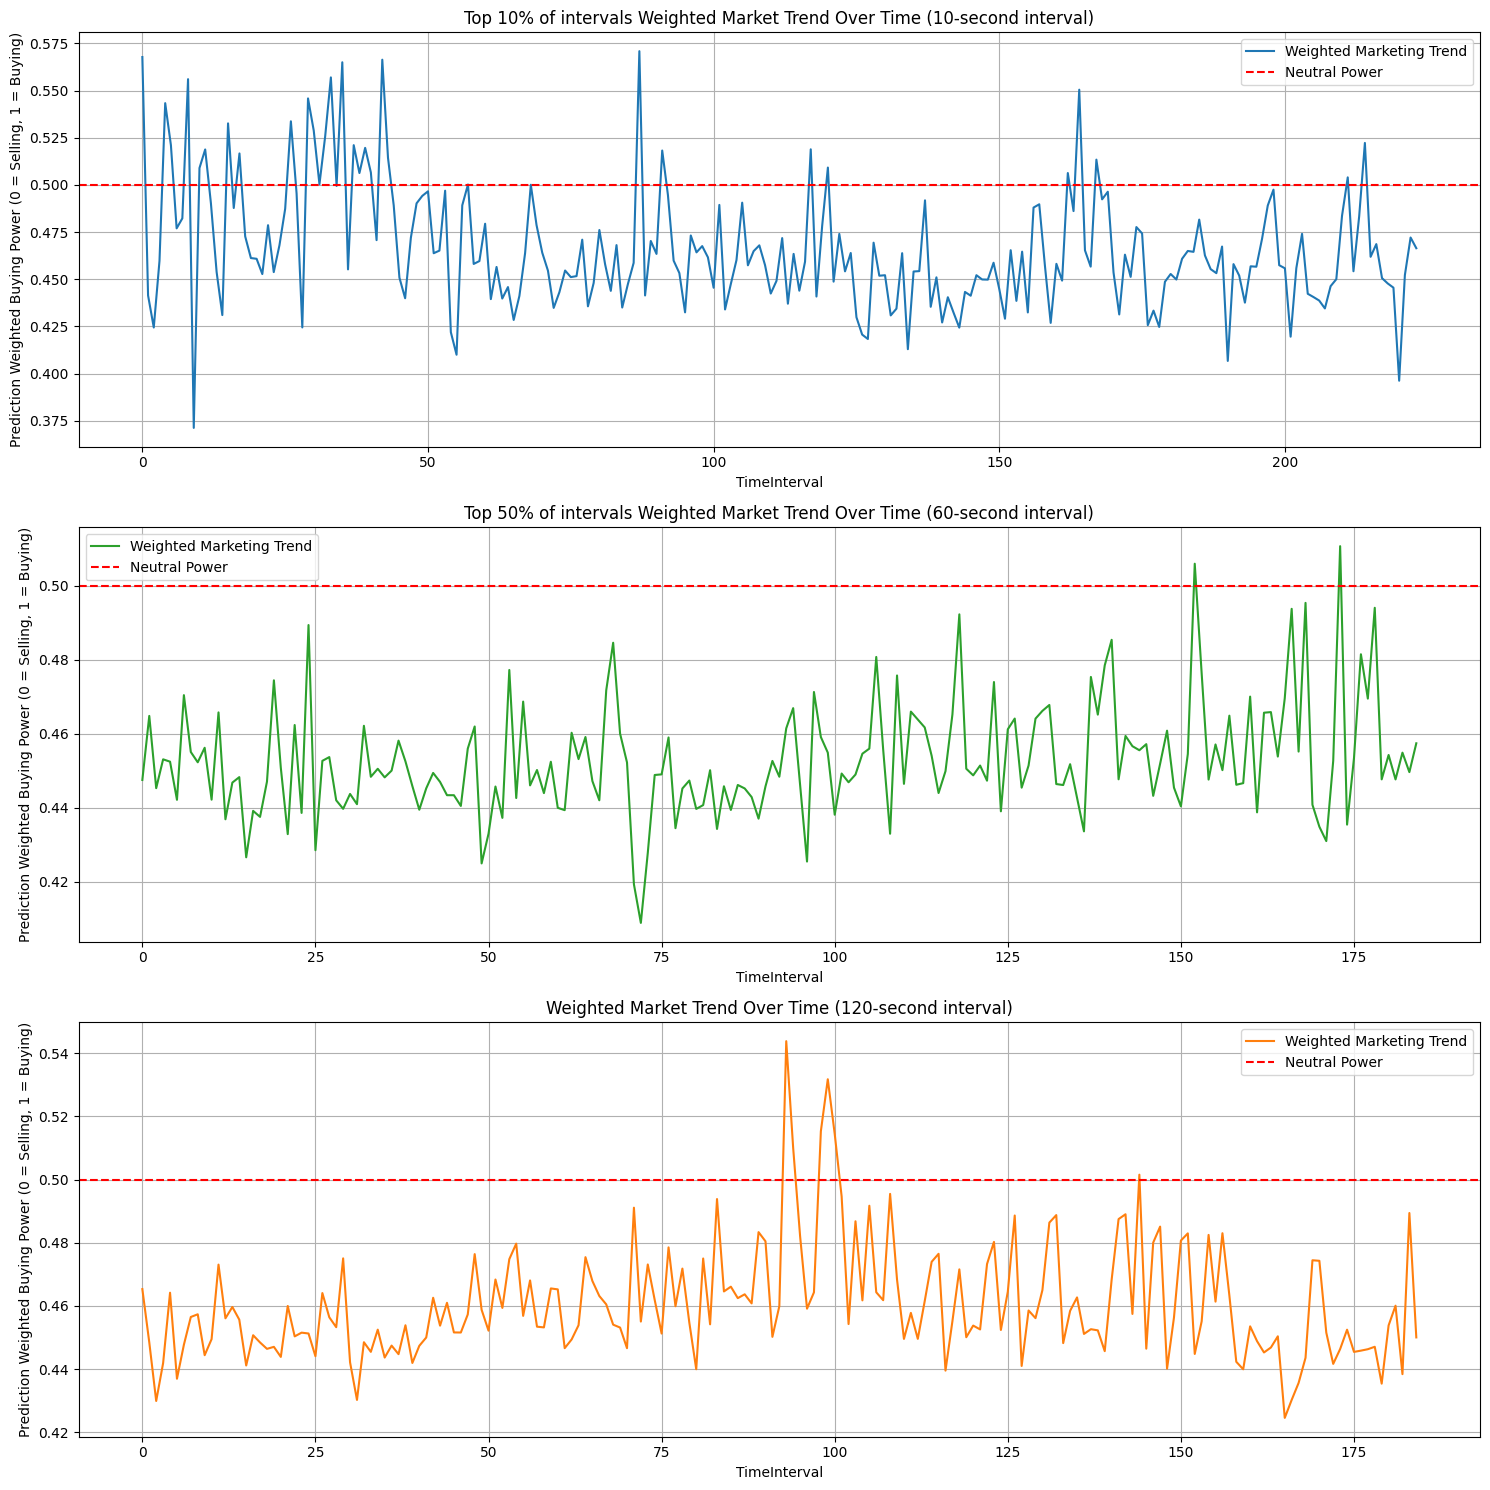

In [519]:
# Create a single figure
plt.figure(figsize=(15, 15))

# First subplot for 10-second interval
plt.subplot(3, 1, 1)
plt.plot(buying_power_weighted_10_pre, label="Weighted Marketing Trend", color='tab:blue')
plt.axhline(0.5, color='red', linestyle='--', label='Neutral Power')
plt.xlabel('TimeInterval')
plt.ylabel('Prediction Weighted Buying Power (0 = Selling, 1 = Buying)')
plt.title('Top 10% of intervals Weighted Market Trend Over Time (10-second interval)')
plt.legend()
plt.grid(True)

# Second subplot for 60-second interval
plt.subplot(3, 1, 2)
plt.plot(buying_power_weighted_60_pre, label="Weighted Marketing Trend", color='tab:green')
plt.axhline(0.5, color='red', linestyle='--', label='Neutral Power')
plt.xlabel('TimeInterval')
plt.ylabel('Prediction Weighted Buying Power (0 = Selling, 1 = Buying)')
plt.title('Top 50% of intervals Weighted Market Trend Over Time (60-second interval)')
plt.legend()
plt.grid(True)

# Third subplot for 120-second interval
plt.subplot(3, 1, 3)
plt.plot(buying_power_weighted_120_pre, label="Weighted Marketing Trend", color='tab:orange')
plt.axhline(0.5, color='red', linestyle='--', label='Neutral Power')
plt.xlabel('TimeInterval')
plt.ylabel('Prediction Weighted Buying Power (0 = Selling, 1 = Buying)')
plt.title('Weighted Market Trend Over Time (120-second interval)')
plt.legend()
plt.grid(True)

# Adjust the layout to ensure the plots don't overlap
plt.tight_layout()

# Display the combined plot
plt.show()


# Evaluation

In [531]:
import numpy as np
from scipy.stats import pearsonr
from scipy.spatial.distance import euclidean

def compute_similarities(seq1, seq2):
    # Truncate sequences to be of the same length
    min_len = min(len(seq1), len(seq2))
    seq1, seq2 = seq1[:min_len], seq2[:min_len]
    
    # Euclidean Distance
    euclidean_dist = np.linalg.norm(seq1 - seq2)
    
    # Mean Squared Error
    mse = np.mean((seq1 - seq2)**2)
    
    # Pearson Correlation Coefficient
    corr_coefficient = pearsonr(seq1, seq2)[0]
    

    return euclidean_dist, mse, corr_coefficient
# Example
euclidean_dist, mse, corr_coefficient = compute_similarities(buying_power_weighted_60, buying_power_weighted_60_pre)

print(f"Euclidean Distance: {euclidean_dist}")
print(f"Mean Squared Error: {mse}")
print(f"Pearson Correlation Coefficient: {corr_coefficient}")


Euclidean Distance: 2.7690650994256565
Mean Squared Error: 0.0414471433776066
Pearson Correlation Coefficient: -0.03877744417195634


The values you've obtained are measures of similarity (or dissimilarity) between the two sequences `buying_power_weighted_60_pre` and `buying_power_weighted_60`. Let's interpret them:

1. **Euclidean Distance (2.769)**:
    - This value represents the "straight-line" distance between the two sequences in the multi-dimensional space. 
    - A smaller value indicates that the sequences are more similar. 
    - In this case, a value of 2.769 isn't particularly high, but without a point of reference (e.g., distances to other sequences), it's hard to determine how similar the sequences are in an absolute sense.

2. **Mean Squared Error (MSE) (0.0414)**:
    - MSE measures the average squared differences between corresponding elements of the two sequences. 
    - A smaller value indicates that the sequences are more similar.
    - A value of 0.0414 suggests that, on average, the squared difference between corresponding elements is 0.0414. This is a relatively small value, indicating that the sequences are fairly close to each other.

3. **Pearson Correlation Coefficient (-0.0387)**:
    - The Pearson correlation coefficient measures the linear relationship between two datasets.
    - It ranges from -1 to 1. A value of 1 implies a perfect positive linear relationship, a value of -1 implies a perfect negative linear relationship, and a value of 0 implies no linear relationship.
    - In this case, the value is -0.0387, which is very close to 0. This indicates that there is a very weak negative linear correlation between the two sequences. Essentially, they are almost uncorrelated.

**Overall Implication**:
The sequences appear to be fairly similar in terms of their Euclidean distance and mean squared error. However, there's no clear linear relationship between them, as indicated by the Pearson correlation coefficient. If you're trying to determine whether one sequence can be used to predict the other, the correlation coefficient suggests that there might not be a straightforward linear predictive relationship. However, other methods or non-linear models might still find patterns or relationships between the sequences.

In [532]:
import numpy as np
from scipy.stats import pearsonr
from scipy.spatial.distance import euclidean

def compute_similarities(seq1, seq2):
    # Truncate sequences to be of the same length
    min_len = min(len(seq1), len(seq2))
    seq1, seq2 = seq1[:min_len], seq2[:min_len]
    
    # Euclidean Distance
    euclidean_dist = np.linalg.norm(seq1 - seq2)
    
    # Mean Squared Error
    mse = np.mean((seq1 - seq2)**2)
    
    # Pearson Correlation Coefficient
    corr_coefficient = pearsonr(seq1, seq2)[0]
    

    return euclidean_dist, mse, corr_coefficient
# Example
euclidean_dist, mse, corr_coefficient = compute_similarities(buying_power_weighted_10, buying_power_weighted_10_pre)

print(f"Euclidean Distance: {euclidean_dist}")
print(f"Mean Squared Error: {mse}")
print(f"Pearson Correlation Coefficient: {corr_coefficient}")


Euclidean Distance: 2.99452844622332
Mean Squared Error: 0.0400321456037529
Pearson Correlation Coefficient: -0.148080482724683


In [533]:
import numpy as np
from scipy.stats import pearsonr
from scipy.spatial.distance import euclidean

def compute_similarities(seq1, seq2):
    # Truncate sequences to be of the same length
    min_len = min(len(seq1), len(seq2))
    seq1, seq2 = seq1[:min_len], seq2[:min_len]
    
    # Euclidean Distance
    euclidean_dist = np.linalg.norm(seq1 - seq2)
    
    # Mean Squared Error
    mse = np.mean((seq1 - seq2)**2)
    
    # Pearson Correlation Coefficient
    corr_coefficient = pearsonr(seq1, seq2)[0]
    

    return euclidean_dist, mse, corr_coefficient
# Example
euclidean_dist, mse, corr_coefficient = compute_similarities(buying_power_weighted_120, buying_power_weighted_120_pre)

print(f"Euclidean Distance: {euclidean_dist}")
print(f"Mean Squared Error: {mse}")
print(f"Pearson Correlation Coefficient: {corr_coefficient}")


Euclidean Distance: 2.485163527661842
Mean Squared Error: 0.03338398788767919
Pearson Correlation Coefficient: -0.11749190886524259
